In [ ]:
pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 168kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!wget --header="Host: doc-0k-5c-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_cqpt9v813bhhrptl6omakr7jes65ir21_nonce=m82ojat0gbmom" --header="Connection: keep-alive" "https://doc-0k-5c-docs.googleusercontent.com/docs/securesc/d8mhp4jp9mj0hkbiocj3p22tau1jmb5b/8pod1q21ehjvip8ubkddej0leiac5ir6/1602818625000/05508547555063821219/05508547555063821219/1pIjkAgIdhaNenCjbBQ1XFGFmZEFYZkxR?e=download&authuser=3&nonce=m82ojat0gbmom&user=05508547555063821219&hash=aaivt78obi9c0delvqol65n5g6qlo6dt" -c -O 'classification_data_set.csv'

--2020-10-16 03:26:31--  https://doc-0k-5c-docs.googleusercontent.com/docs/securesc/d8mhp4jp9mj0hkbiocj3p22tau1jmb5b/8pod1q21ehjvip8ubkddej0leiac5ir6/1602818625000/05508547555063821219/05508547555063821219/1pIjkAgIdhaNenCjbBQ1XFGFmZEFYZkxR?e=download&authuser=3&nonce=m82ojat0gbmom&user=05508547555063821219&hash=aaivt78obi9c0delvqol65n5g6qlo6dt
Resolving doc-0k-5c-docs.googleusercontent.com (doc-0k-5c-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-0k-5c-docs.googleusercontent.com (doc-0k-5c-docs.googleusercontent.com)|74.125.20.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘classification_data_set.csv’

classification_data     [ <=>                ]   5.17M  --.-KB/s    in 0.1s    

2020-10-16 03:26:32 (43.9 MB/s) - ‘classification_data_set.csv’ saved [5426143]



In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("classification_data_set.csv", encoding='utf8')
df.head()

,naics_code,report_ID,narrative,keywords,end_use,project_type,project_cost,stories,building_height,is_fatality,employee_count,inspection_number,severity,injury_type,trade,additional_info
0,236,751910,"On April 7, 2014, Employee #1, a carpenter, an...","construction, carpenter, unsecured, extension ...",Commercial building,Alteration or rehabilitation,"$500,000 to $1,000,000",3.0,NaN,X,1,317687143,Fatality,Fracture,Carpenters,FallDist: 12FallHt:12Cause: Installing equipme...
1,236,453730,"On April 3, 2014, Employee #1, an industrial e...","construction, installing, decking, cardiac arr...",Single family or duplex dwelling,New project or new addition,"$50,000 to $250,000",2.0,20.0,X,1,317721835,Fatality,Other,Industrial engineering technicians,FallDist:FallHt:Cause: Other Activities-Post D...
2,236,950624,"On April 2, 2014, Employee #1 was working with...","construction, installing, saw, circular saw, b...",Single family or duplex dwelling,Alteration or rehabilitation,"Under $50,000",1.0,NaN,NaN,1,316704378,Hospitalized injury,Amputation,Construction laborers,FallDist:FallHt:Cause: Interior tile work (cer...
3,236,950644,"On March 28, 2014, Employee #1, employed by a ...","construction, installing, wall, concrete, brac...",Commercial building,New project or new addition,"$500,000 to $1,000,000",1.0,25.0,NaN,1,316349711,Hospitalized injury,Amputation,Occupation not reported,FallDist:FallHt:Cause: Pouring concrete founda...
4,236,1054114,"On March 24, 2014, Employee #1 and Coworker #1...","construction, roofer, roof, concrete, fall, fa...",Other building,Alteration or rehabilitation,"Under $50,000",1.0,12.0,NaN,1,317624583,Hospitalized injury,Fracture,Occupation not reported,FallDist: 12FallHt:12Cause: RoofingFatCause: F...


In [ ]:
import nltk
nltk.download('punkt')
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings   
warnings.filterwarnings(action = 'ignore')   
import gensim 
from gensim.models import Word2Vec 
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##Model Developement

In [ ]:
df.fillna(value='na', inplace=True)

In [ ]:
df.head()

,naics_code,report_ID,narrative,keywords,end_use,project_type,project_cost,stories,building_height,is_fatality,employee_count,inspection_number,severity,injury_type,trade,additional_info
0,236,751910,"On April 7, 2014, Employee #1, a carpenter, an...","construction, carpenter, unsecured, extension ...",Commercial building,Alteration or rehabilitation,"$500,000 to $1,000,000",3,na,X,1,317687143,Fatality,Fracture,Carpenters,FallDist: 12FallHt:12Cause: Installing equipme...
1,236,453730,"On April 3, 2014, Employee #1, an industrial e...","construction, installing, decking, cardiac arr...",Single family or duplex dwelling,New project or new addition,"$50,000 to $250,000",2,20,X,1,317721835,Fatality,Other,Industrial engineering technicians,FallDist:FallHt:Cause: Other Activities-Post D...
2,236,950624,"On April 2, 2014, Employee #1 was working with...","construction, installing, saw, circular saw, b...",Single family or duplex dwelling,Alteration or rehabilitation,"Under $50,000",1,na,na,1,316704378,Hospitalized injury,Amputation,Construction laborers,FallDist:FallHt:Cause: Interior tile work (cer...
3,236,950644,"On March 28, 2014, Employee #1, employed by a ...","construction, installing, wall, concrete, brac...",Commercial building,New project or new addition,"$500,000 to $1,000,000",1,25,na,1,316349711,Hospitalized injury,Amputation,Occupation not reported,FallDist:FallHt:Cause: Pouring concrete founda...
4,236,1054114,"On March 24, 2014, Employee #1 and Coworker #1...","construction, roofer, roof, concrete, fall, fa...",Other building,Alteration or rehabilitation,"Under $50,000",1,12,na,1,317624583,Hospitalized injury,Fracture,Occupation not reported,FallDist: 12FallHt:12Cause: RoofingFatCause: F...


In [ ]:
report_lines=list()
lines=df['narrative'].values.tolist()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
for line in lines:
  tokens=word_tokenize(line)
  tokens= [w.lower() for  w in tokens]
  table=str.maketrans('','',string.punctuation)
  stripped=[w.translate(table) for w in tokens]
  words=[word for word in stripped if word.isalpha()]
  stop_words=set(stopwords.words('english'))
  words=[w for w in words if w not in stop_words]
  report_lines.append(words)

In [ ]:
len( report_lines)

5845

In [ ]:
model = gensim.models.Word2Vec(sentences=report_lines, min_count = 1, size =300, window = 5, sg = 1) 

In [ ]:
print("Cosine similarity between 'acid' " +
            "and 'sulfuric' - Skip Gram : ", 
      model.similarity('acid', 'sulfuric'))

Cosine similarity between 'acid' and 'sulfuric' - Skip Gram :  0.99161994


In [ ]:
model.wv.most_similar("foreman")

[('supervisor', 0.8464646339416504),
 ('laborers', 0.8278250694274902),
 ('worksite', 0.8257783651351929),
 ('superintendent', 0.8235671520233154),
 ('told', 0.8226885795593262),
 ('men', 0.8174619674682617),
 ('brother', 0.8105594515800476),
 ('bricklayer', 0.8075110912322998),
 ('begun', 0.799813985824585),
 ('coworkers', 0.7976220846176147)]

In [ ]:
print(model.wv.doesnt_match("hernia building injury fracture burn sprain".split()))

building


In [ ]:
filename='construction_safety.txt'
model.wv.save_word2vec_format(filename,binary=False)

## Reading the Data

In [ ]:
df.columns
df.shape

(5845, 16)

In [ ]:
df.head(5)

,naics_code,report_ID,narrative,keywords,end_use,project_type,project_cost,stories,building_height,is_fatality,employee_count,inspection_number,severity,injury_type,trade,additional_info
0,236,751910,"On April 7, 2014, Employee #1, a carpenter, an...","construction, carpenter, unsecured, extension ...",Commercial building,Alteration or rehabilitation,"$500,000 to $1,000,000",3,na,X,1,317687143,Fatality,Fracture,Carpenters,FallDist: 12FallHt:12Cause: Installing equipme...
1,236,453730,"On April 3, 2014, Employee #1, an industrial e...","construction, installing, decking, cardiac arr...",Single family or duplex dwelling,New project or new addition,"$50,000 to $250,000",2,20,X,1,317721835,Fatality,Other,Industrial engineering technicians,FallDist:FallHt:Cause: Other Activities-Post D...
2,236,950624,"On April 2, 2014, Employee #1 was working with...","construction, installing, saw, circular saw, b...",Single family or duplex dwelling,Alteration or rehabilitation,"Under $50,000",1,na,na,1,316704378,Hospitalized injury,Amputation,Construction laborers,FallDist:FallHt:Cause: Interior tile work (cer...
3,236,950644,"On March 28, 2014, Employee #1, employed by a ...","construction, installing, wall, concrete, brac...",Commercial building,New project or new addition,"$500,000 to $1,000,000",1,25,na,1,316349711,Hospitalized injury,Amputation,Occupation not reported,FallDist:FallHt:Cause: Pouring concrete founda...
4,236,1054114,"On March 24, 2014, Employee #1 and Coworker #1...","construction, roofer, roof, concrete, fall, fa...",Other building,Alteration or rehabilitation,"Under $50,000",1,12,na,1,317624583,Hospitalized injury,Fracture,Occupation not reported,FallDist: 12FallHt:12Cause: RoofingFatCause: F...


Droping Features With Missing Datapoints

In [ ]:
df['injury_type'].value_counts()

Fracture               2055
Other                  1384
Amputation              400
Concussion              392
Bruise/Contus/Abras     349
Cut/Laceration          306
Electric Shock          276
Asphyxia                168
Burn/Scald(Heat)        140
Puncture                114
na                       62
Heat Exhaustion          61
Strain/Sprain            47
Dislocation              39
Burn(Chemical)           19
Foreign Body Ineye       11
Freezing/Frost Bite       8
Poisoning(Systemic)       8
Hernia                    3
Cancer                    2
Hearing Loss              1
Name: injury_type, dtype: int64

In [ ]:
df = df[df.injury_type != 'na']

In [ ]:
df.shape

(5783, 16)

##Preprocessing & Feature Engineering 


###inspection_number

In [ ]:
df["inspection_number"].value_counts()

312509441    2
312760655    2
310606033    2
311604482    2
310603949    2
            ..
315950386    1
308265958    1
120198452    1
308387125    1
307183616    1
Name: inspection_number, Length: 5615, dtype: int64

In [ ]:
df[df["inspection_number"]==312541170]

,naics_code,report_ID,narrative,keywords,end_use,project_type,project_cost,stories,building_height,is_fatality,employee_count,inspection_number,severity,injury_type,trade,additional_info
607,236,1055330,"On September 26, 2008, Employee #1 was crushed...","excavation, excavator, boom, crushed, pinned, ...",Other building,Other,"Under $50,000",1,na,X,1,312541170,Fatality,Other,Occupation not reported,FallDist:FallHt:Cause: Exterior carpentryFatCa...
816,236,1055330,"On September 26, 2008, Employee #1 was crushed...","excavation, excavator, boom, crushed, pinned, ...",Other building,Other,"Under $50,000",1,na,X,1,312541170,Fatality,Other,Occupation not reported,FallDist:FallHt:Cause: Exterior carpentryFatCa...


### Conclusion
* By checking the count of inspection number and the number of rows in the dataset we can say that 172 datapoints are repeating

In [ ]:
df.drop_duplicates(subset ="inspection_number", inplace = True) 

In [ ]:
df.shape

(5615, 16)

project_type

In [ ]:
import seaborn as sns

In [ ]:
df['project_type'].value_counts()

New project or new addition     2837
Alteration or rehabilitation    1142
Maintenance or repair           1021
Other                            465
Demolition                       150
Name: project_type, dtype: int64

In [ ]:
df['project_type'] = df['project_type'].str.replace(' or ',' ')
df['project_type'] = df['project_type'].str.replace(' ','_')
df['project_type']= df['project_type'].str.replace('-','_')
df['project_type']= df['project_type'].str.lower() 
df['project_type'].value_counts()

new_project_new_addition     2837
alteration_rehabilitation    1142
maintenance_repair           1021
other                         465
demolition                    150
Name: project_type, dtype: int64

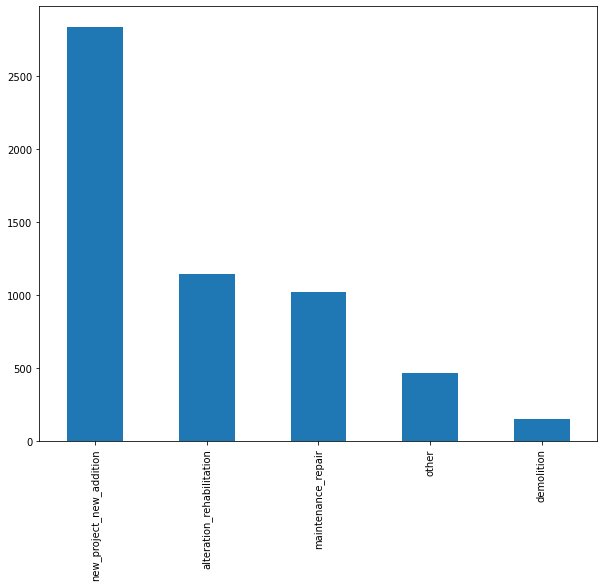

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
df['project_type'].value_counts().plot(kind='bar')

* Majority of reported cases are from new project/addition (nearly 2800 cases)

end_use

In [ ]:
df['end_use'].value_counts()

Single family or duplex dwelling         1395
Commercial building                      1056
Highway, road, street                     802
Other building                            654
Multi-family dwelling                     400
Bridge                                    206
Pipeline                                  190
Sewer/water treatment plant               178
Other heavy construction                  146
Powerline, transmission line              123
Manufacturing plant                       103
Excavation, landfill                       88
Powerplant                                 70
Tower, tank, storage elevator              67
Contractor's yard/facility                 60
Refinery                                   43
Shoreline development, dam, reservoir      31
&nbsp;                                      3
Name: end_use, dtype: int64

In [ ]:
df['end_use'] = df['end_use'].str.replace(' The ','')
df['end_use'] = df['end_use'].str.replace(' or ','_')
df['end_use'] = df['end_use'].str.replace('&','')
df['end_use'] = df['end_use'].str.replace(',','_')
df['end_use'] = df['end_use'].str.replace(';','_')
df['end_use'] = df['end_use'].str.replace('/','_')
df['end_use'] = df['end_use'].str.replace('-','_')
df['end_use'] = df['end_use'].str.replace(' ','')
df['end_use'] = df['end_use'].str.lower()

df['end_use'].value_counts()

singlefamily_duplexdwelling           1395
commercialbuilding                    1056
highway_road_street                    802
otherbuilding                          654
multi_familydwelling                   400
bridge                                 206
pipeline                               190
sewer_watertreatmentplant              178
otherheavyconstruction                 146
powerline_transmissionline             123
manufacturingplant                     103
excavation_landfill                     88
powerplant                              70
tower_tank_storageelevator              67
contractor'syard_facility               60
refinery                                43
shorelinedevelopment_dam_reservoir      31
nbsp_                                    3
Name: end_use, dtype: int64

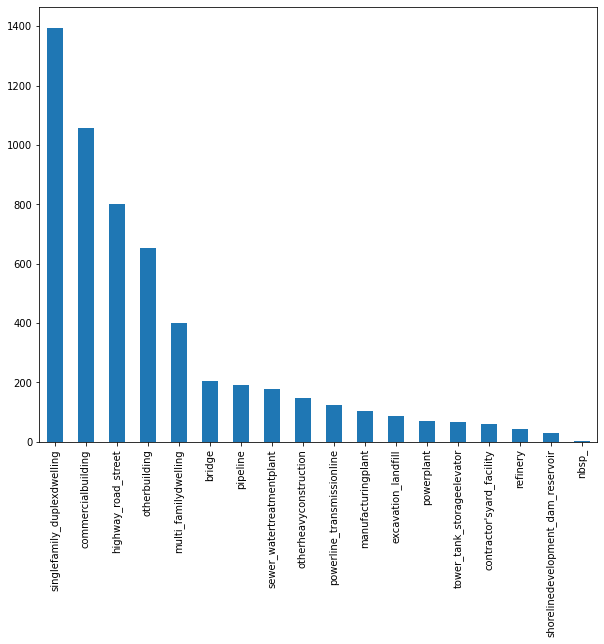

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
df['end_use'].value_counts().plot(kind='bar')

* There are 1400 cases reported during single family / duplex construction

Severity

In [ ]:
df["severity"].value_counts()

Hospitalized injury        2796
Fatality                   2424
Non Hospitalized injury     395
Name: severity, dtype: int64

In [ ]:
df["severity"] = df["severity"].str.replace(' ','_')
df["severity"] = df["severity"].str.lower()
df["severity"].value_counts()

hospitalized_injury        2796
fatality                   2424
non_hospitalized_injury     395
Name: severity, dtype: int64

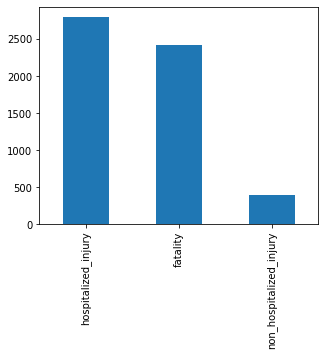

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
df['severity'].value_counts().plot(kind='bar')

* Most cases reported are hospitalised injury

injury_type

In [ ]:
df["injury_type"].value_counts()

Fracture               1983
Other                  1353
Amputation              388
Concussion              380
Bruise/Contus/Abras     342
Cut/Laceration          297
Electric Shock          272
Asphyxia                164
Burn/Scald(Heat)        136
Puncture                110
Heat Exhaustion          57
Strain/Sprain            46
Dislocation              39
Burn(Chemical)           18
Foreign Body Ineye        9
Poisoning(Systemic)       8
Freezing/Frost Bite       7
Hernia                    3
Cancer                    2
Hearing Loss              1
Name: injury_type, dtype: int64

In [ ]:
df["injury_type"] = df["injury_type"].str.replace('/',' ')
df["injury_type"] = df["injury_type"].str.replace('(',' ')
df["injury_type"] = df["injury_type"].str.replace(')','')
df["injury_type"] = df["injury_type"].str.replace(' ','_')
df["injury_type"] = df["injury_type"].str.lower()

In [ ]:
df["injury_type"].value_counts()

fracture               1983
other                  1353
amputation              388
concussion              380
bruise_contus_abras     342
cut_laceration          297
electric_shock          272
asphyxia                164
burn_scald_heat         136
puncture                110
heat_exhaustion          57
strain_sprain            46
dislocation              39
burn_chemical            18
foreign_body_ineye        9
poisoning_systemic        8
freezing_frost_bite       7
hernia                    3
cancer                    2
hearing_loss              1
Name: injury_type, dtype: int64

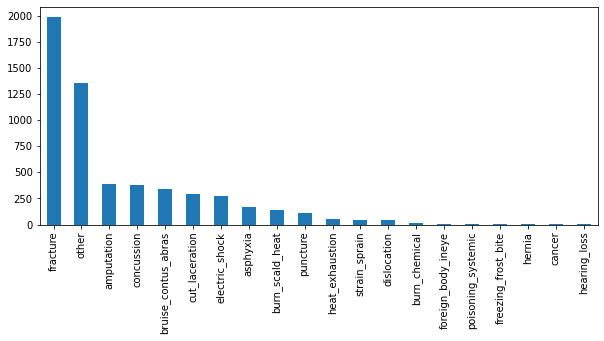

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
df['injury_type'].value_counts().plot(kind='bar')

* Most reported cases of injury is fracture(2000) only few cases of burn, cancer, hearing loss etc..

trade

In [ ]:
df["trade"].value_counts()

Occupation not reported                         1780
Construction laborers                           1151
Carpenters                                       645
Construction trades, n.e.c.                      216
Roofers                                          178
                                                ... 
Freight, stock and material handlers, n.e.c.       1
Miscellaneous plant and system operators           1
Rail vehicle operators, n.e.c.                     1
Mechanical engineers                               1
Sales occupations, other business services         1
Name: trade, Length: 139, dtype: int64

In [ ]:
df['trade'] = df['trade'].str.replace(' The ','')
df['trade'] = df['trade'].str.replace(' or ','')
df['trade'] = df['trade'].str.replace('&','')
df['trade'] = df['trade'].str.replace(',','')
df['trade'] = df['trade'].str.replace(';','')
df['trade'] = df['trade'].str.replace('/','_')
df['trade'] = df['trade'].str.replace('.','')
df["trade"] = df["trade"].str.replace('(','_')
df["trade"] = df["trade"].str.replace(')','')
df['trade'] = df['trade'].str.replace('-','_')
df['trade'] = df['trade'].str.replace(' ','_')
df["trade"] = df["trade"].str.lower()

In [ ]:
df["trade"].value_counts()

occupation_not_reported                          1780
construction_laborers                            1151
carpenters                                        645
construction_trades_nec                           216
roofers                                           178
                                                 ... 
precision_assemblers_metal                          1
farm_workers                                        1
short_order_cooks                                   1
sales_support_occupations_nec                       1
painters_sculptors_craft_artists__printmakers       1
Name: trade, Length: 139, dtype: int64

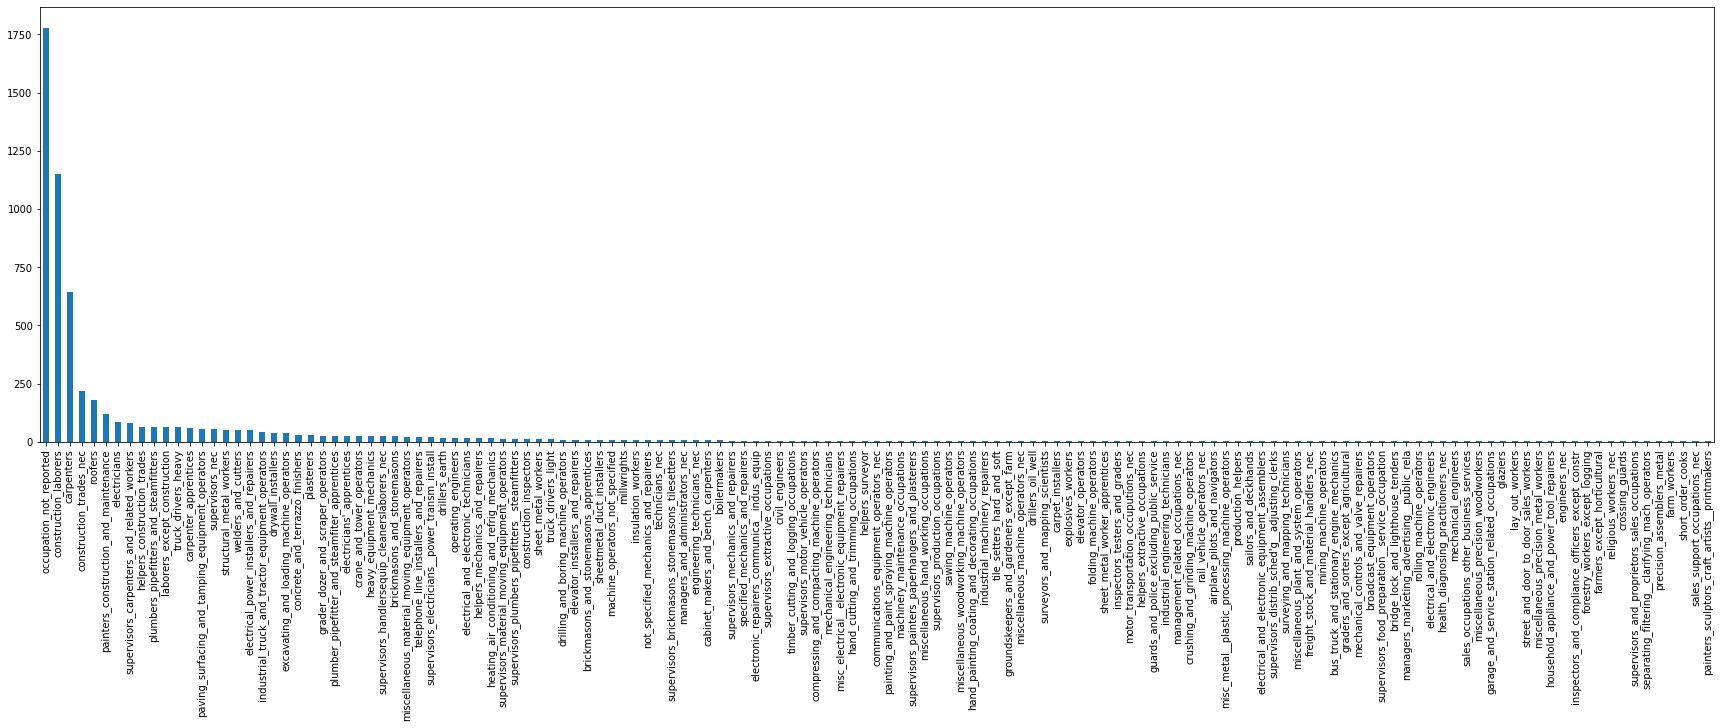

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
df['trade'].value_counts().plot(kind='bar')

* In many cases the occupation of the injured is not reported

project_cost

In [ ]:
df["project_cost"].value_counts()

Under $50,000                1801
$50,000 to $250,000          1016
$1,000,000 to $5,000,000      815
$500,000 to $1,000,000        581
$250,000 to $500,000          545
$5,000,000 to $20,000,000     466
$20,000,000 and over          391
Name: project_cost, dtype: int64

In [ ]:
df['project_cost'] = df['project_cost'].str.replace('$','')
df['project_cost'] = df['project_cost'].str.replace(',','')
df['project_cost'] = df['project_cost'].str.replace('to ','_')
df['project_cost'] = df['project_cost'].str.replace(' ','')
df["project_cost"] = df["project_cost"].str.lower()

In [ ]:
df["project_cost"].value_counts()

under50000          1801
50000_250000        1016
1000000_5000000      815
500000_1000000       581
250000_500000        545
5000000_20000000     466
20000000andover      391
Name: project_cost, dtype: int64

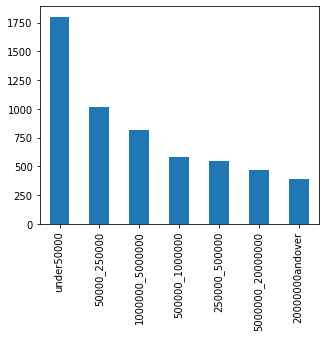

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
df['project_cost'].value_counts().plot(kind='bar')

* Most cases occured in project size where price is less than $ 50000


Naics_code

In [ ]:
df["naics_code"].describe()


count    5615.000000
mean      236.871594
std         0.801941
min       236.000000
25%       236.000000
50%       237.000000
75%       238.000000
max       238.000000
Name: naics_code, dtype: float64

In [ ]:
df["naics_code"].value_counts()

236    2212
237    1912
238    1491
Name: naics_code, dtype: int64

In [ ]:
df["naics_code"] = df["naics_code"].map({236: 'report_A', 237: 'report_B',238: 'report_C'})

In [ ]:
df["naics_code"].value_counts()

report_A    2212
report_B    1912
report_C    1491
Name: naics_code, dtype: int64

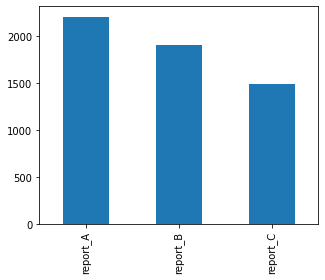

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
df['naics_code'].value_counts().plot(kind='bar')

In [ ]:
df["report_ID"].value_counts()

950621    306
950632    234
950643    218
950633    217
950641    217
         ... 
418500      1
728100      1
454721      1
522900      1
627500      1
Name: report_ID, Length: 190, dtype: int64

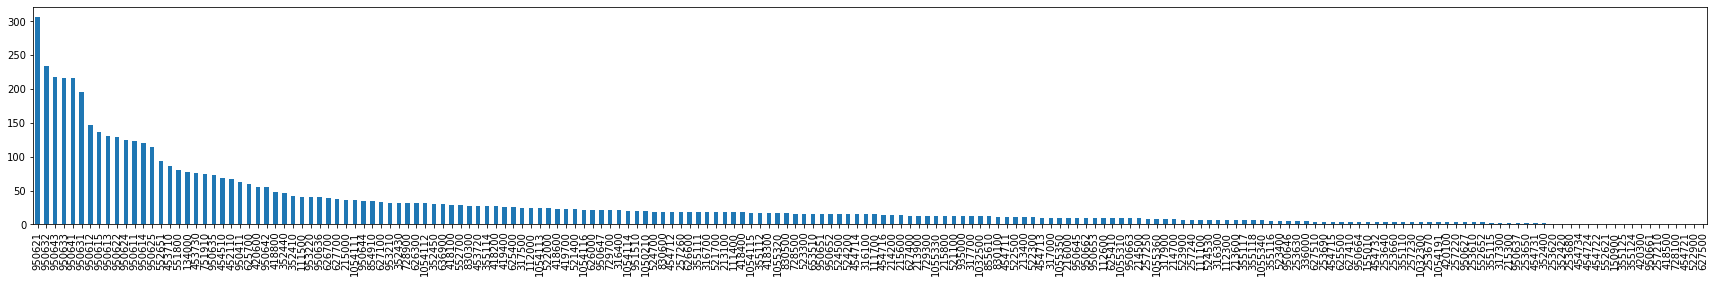

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,4))
df['report_ID'].value_counts().plot(kind='bar')

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

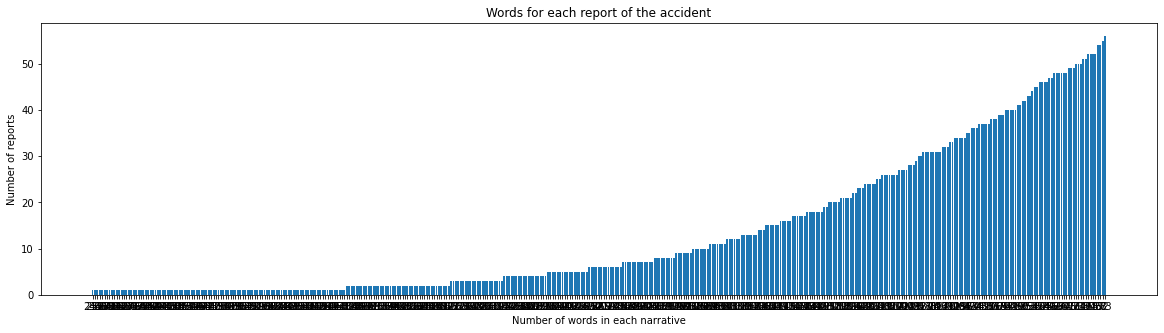

In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count =df['narrative'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of reports')
plt.xlabel('Number of words in each narrative')
plt.title('Words for each report of the accident')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

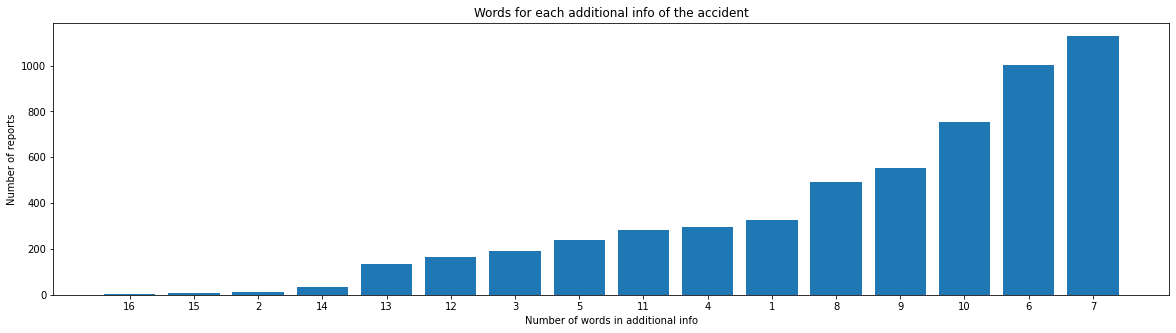

In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count =df['additional_info'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of reports')
plt.xlabel('Number of words in additional info')
plt.title('Words for each additional info of the accident')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

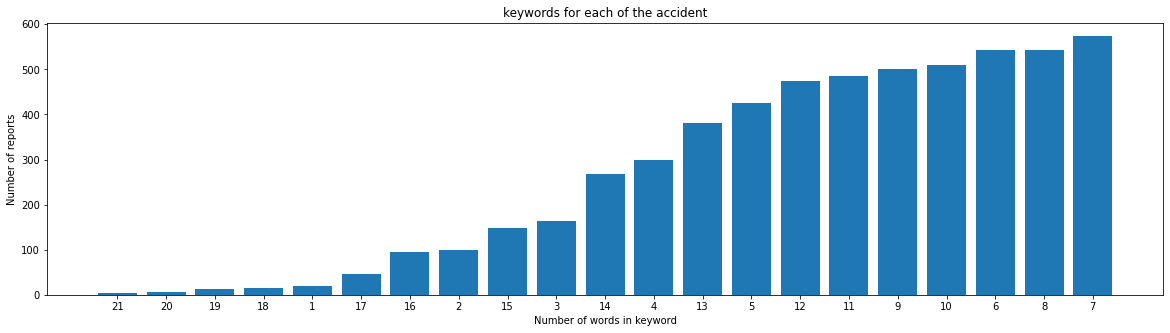

In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count =df['keywords'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of reports')
plt.xlabel('Number of words in keyword')
plt.title('keywords for each of the accident')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [ ]:
df.columns

Index(['naics_code', 'report_ID', 'narrative', 'keywords', 'end_use',
       'project_type', 'project_cost', 'stories', 'building_height',
       'is_fatality', 'employee_count', 'inspection_number', 'severity',
       'injury_type', 'trade', 'additional_info'],
      dtype='object')

In [ ]:
df['stories'].describe()

count     5615
unique      47
top         na
freq      2142
Name: stories, dtype: object

In [ ]:
df["stories"].replace({"na": 0}, inplace=True)

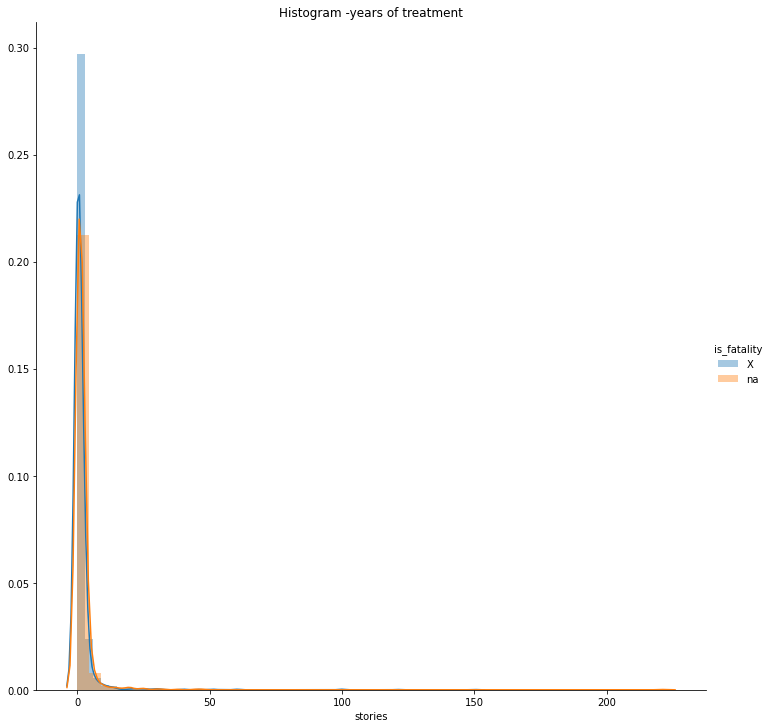

In [ ]:
sns.FacetGrid(df,hue="is_fatality",size=10)\
.map(sns.distplot,"stories")\
.add_legend()
plt.title(label="Histogram -years of treatment", fontdict=None, loc='center')
plt.show()

In [ ]:
df["stories"].replace({0:np.mean(df["stories"])}, inplace=True)

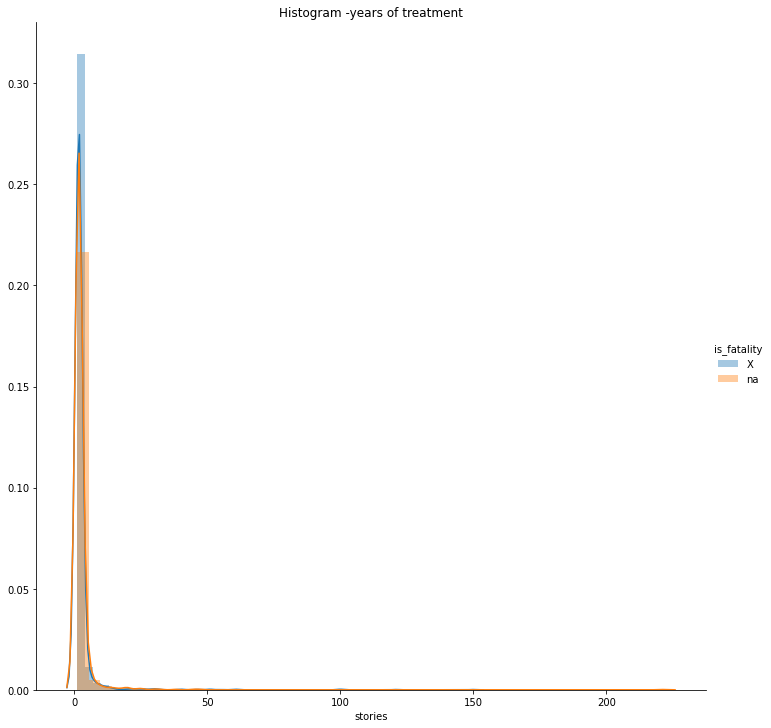

In [ ]:
sns.FacetGrid(df,hue="is_fatality",size=10)\
.map(sns.distplot,"stories")\
.add_legend()
plt.title(label="Histogram -years of treatment", fontdict=None, loc='center')
plt.show()


STORIES OF BOTH FATAL AND NON FATAL ARE OVERLAPPING

In [ ]:
df['building_height'].describe()

count     5615
unique     132
top         na
freq      3048
Name: building_height, dtype: object

In [ ]:
df["building_height"].replace({"na": 0}, inplace=True)

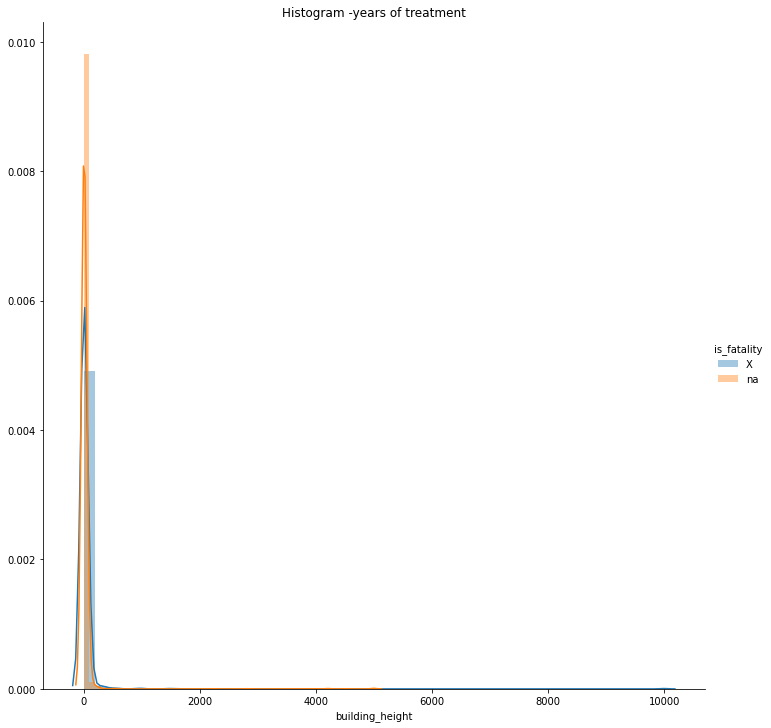

In [ ]:
sns.FacetGrid(df,hue="is_fatality",size=10)\
.map(sns.distplot,"building_height")\
.add_legend()
plt.title(label="Histogram -years of treatment", fontdict=None, loc='center')
plt.show()

In [ ]:
grp = df.groupby('injury_type')

In [ ]:
df['injury_type'].value_counts()

fracture               1983
other                  1353
amputation              388
concussion              380
bruise_contus_abras     342
cut_laceration          297
electric_shock          272
asphyxia                164
burn_scald_heat         136
puncture                110
heat_exhaustion          57
strain_sprain            46
dislocation              39
burn_chemical            18
foreign_body_ineye        9
poisoning_systemic        8
freezing_frost_bite       7
hernia                    3
cancer                    2
hearing_loss              1
Name: injury_type, dtype: int64

In [ ]:
fracture=grp.get_group('fracture') 
other=grp.get_group('other')
amputation=grp.get_group('amputation')
concussion =grp.get_group('concussion')
bruise_contus_abras =grp.get_group('bruise_contus_abras')
cut_laceration  =grp.get_group('cut_laceration')
electric_shock =grp.get_group('electric_shock')
asphyxia   =grp.get_group('asphyxia')
burn_scald_heat  =grp.get_group('burn_scald_heat')
puncture =grp.get_group('puncture')
heat_exhaustion =grp.get_group('heat_exhaustion')
strain_sprain =grp.get_group('strain_sprain')
dislocation  =grp.get_group('dislocation')
burn_chemical =grp.get_group('burn_chemical')
foreign_body_ineye  =grp.get_group('foreign_body_ineye')
poisoning_systemic  =grp.get_group('poisoning_systemic')
freezing_frost_bite  =grp.get_group('freezing_frost_bite')
hernia =grp.get_group('hernia')
cancer   =grp.get_group('cancer')
hearing_loss   =grp.get_group('hearing_loss')

##Distribution of Trade in each Injury type

In [ ]:
fracture["trade"].value_counts()

occupation_not_reported                            519
construction_laborers                              420
carpenters                                         286
roofers                                             91
construction_trades_nec                             71
                                                  ... 
forestry_workers_except_logging                      1
separating_filtering__clarifying_mach_operators      1
communications_equipment_operators_nec               1
supervisors_and_proprietors_sales_occupations        1
compressing_and_compacting_machine_operators         1
Name: trade, Length: 87, dtype: int64

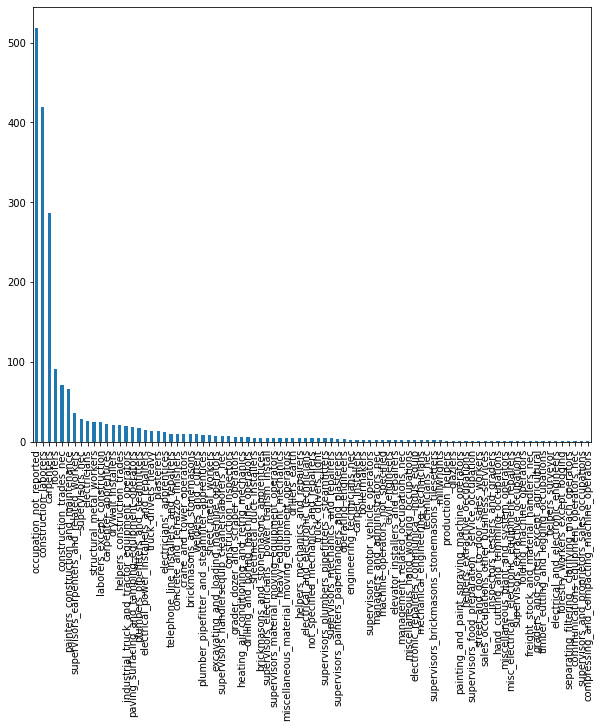

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
fracture["trade"].value_counts().plot(kind='bar')

In [ ]:
other["trade"].value_counts()

occupation_not_reported                547
construction_laborers                  265
carpenters                              81
construction_trades_nec                 68
roofers                                 41
                                      ... 
sales_support_occupations_nec            1
elevator_operators                       1
short_order_cooks                        1
electricians'_apprentices                1
supervisors_mechanics_and_repairers      1
Name: trade, Length: 79, dtype: int64

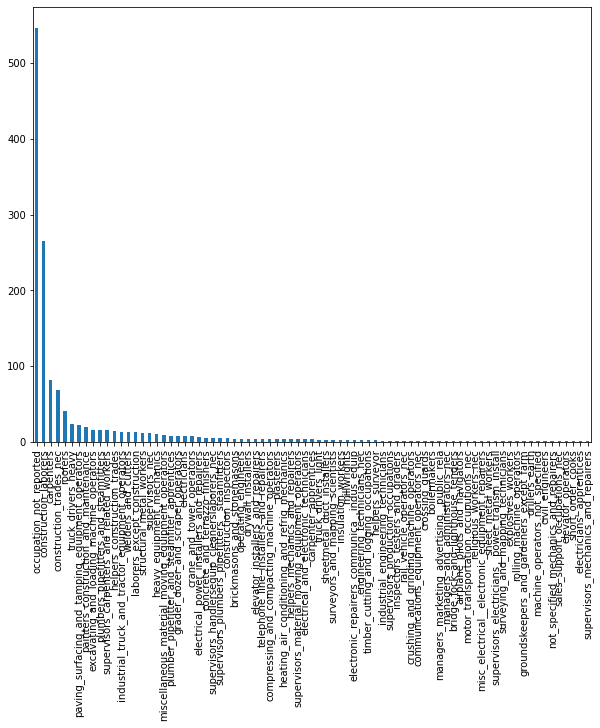

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
other["trade"].value_counts().plot(kind='bar')

carpenters                                          82
construction_laborers                               78
occupation_not_reported                             74
construction_trades_nec                             14
carpenter_apprentices                               13
plumbers_pipefitters_and_steamfitters               11
laborers_except_construction                         8
truck_drivers_heavy                                  7
painters_construction_and_maintenance                6
cabinet_makers_and_bench_carpenters                  5
concrete_and_terrazzo_finishers                      5
drillers_earth                                       5
welders_and_cutters                                  5
grader_dozer_and_scraper_operators                   4
helpers_construction_trades                          4
helpers_mechanics_and_repairers                      4
heavy_equipment_mechanics                            4
supervisors_carpenters_and_related_workers           4
plasterers

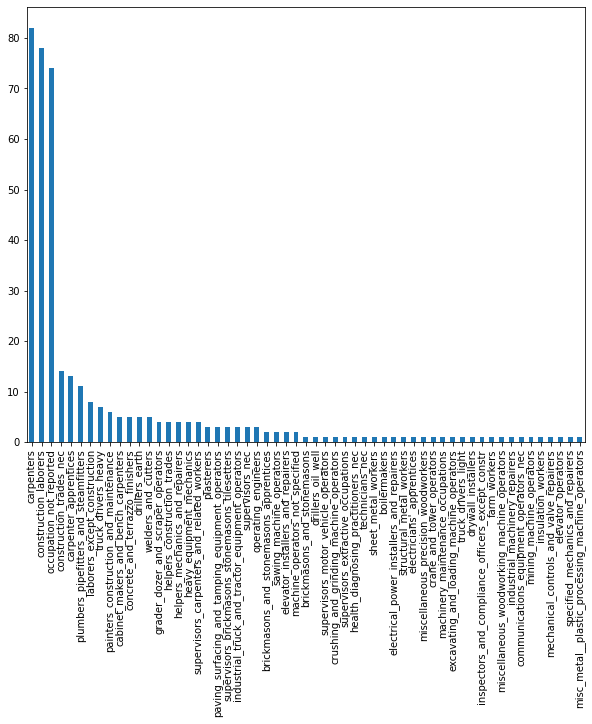

In [ ]:
print(amputation["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
amputation["trade"].value_counts().plot(kind='bar')

occupation_not_reported                             135
construction_laborers                                80
carpenters                                           40
construction_trades_nec                              16
roofers                                              14
painters_construction_and_maintenance                 9
electricians                                          8
supervisors_carpenters_and_related_workers            6
structural_metal_workers                              5
drywall_installers                                    4
carpenter_apprentices                                 3
plumbers_pipefitters_and_steamfitters                 3
laborers_except_construction                          3
electrical_and_electronic_technicians                 3
helpers_construction_trades                           3
supervisors_handlersequip_cleanerslaborers_nec        3
truck_drivers_heavy                                   3
brickmasons_and_stonemasons                     

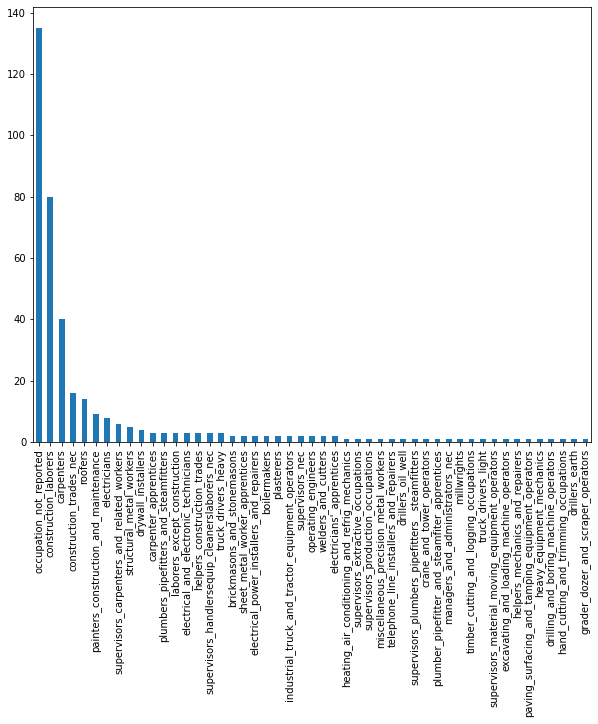

In [ ]:
print(concussion["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
concussion["trade"].value_counts().plot(kind='bar')

occupation_not_reported                             138
construction_laborers                                75
carpenters                                           25
construction_trades_nec                              10
supervisors_carpenters_and_related_workers            6
truck_drivers_heavy                                   6
painters_construction_and_maintenance                 5
excavating_and_loading_machine_operators              5
roofers                                               5
crane_and_tower_operators                             3
supervisors_handlersequip_cleanerslaborers_nec        3
drywall_installers                                    3
structural_metal_workers                              3
supervisors_nec                                       3
industrial_truck_and_tractor_equipment_operators      2
operating_engineers                                   2
brickmasons_and_stonemasons                           2
machinery_maintenance_occupations               

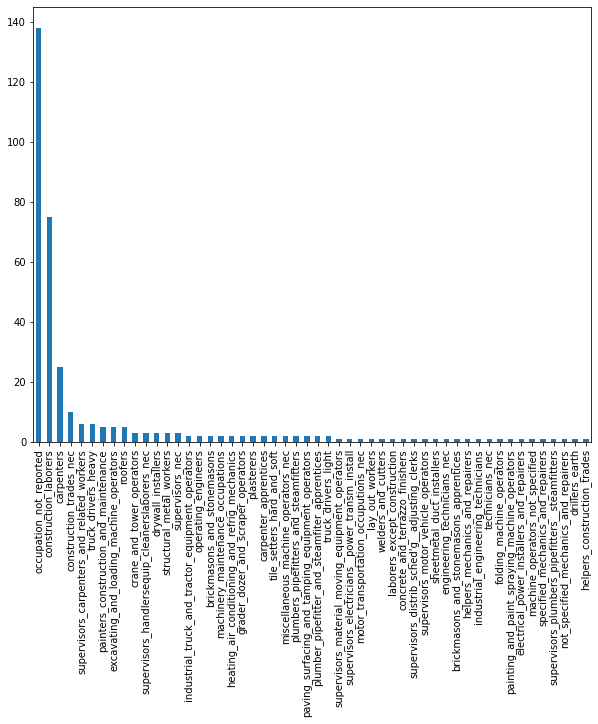

In [ ]:
print(bruise_contus_abras["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
bruise_contus_abras["trade"].value_counts().plot(kind='bar')

occupation_not_reported                              72
construction_laborers                                69
carpenters                                           62
construction_trades_nec                               9
carpenter_apprentices                                 8
supervisors_carpenters_and_related_workers            6
electricians                                          5
plumbers_pipefitters_and_steamfitters                 4
drywall_installers                                    4
structural_metal_workers                              4
roofers                                               4
helpers_construction_trades                           4
drillers_earth                                        3
electrical_power_installers_and_repairers             3
insulation_workers                                    3
concrete_and_terrazzo_finishers                       3
millwrights                                           2
telephone_line_installers_and_repairers         

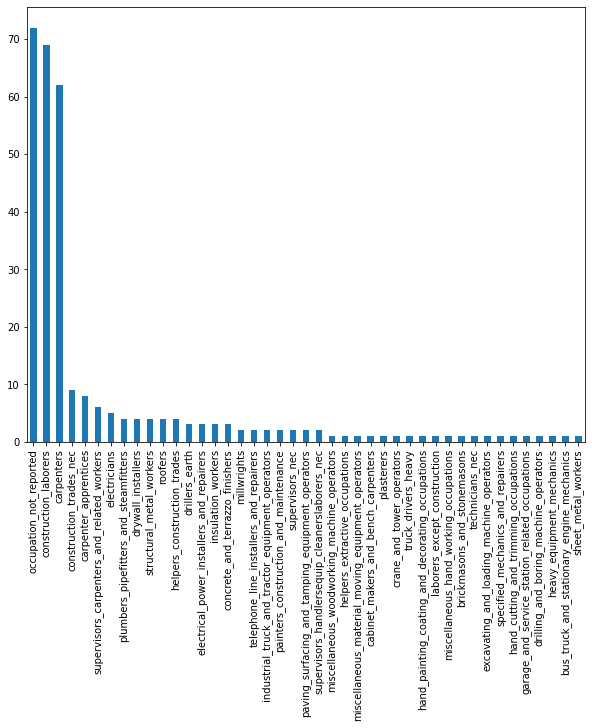

In [ ]:
print(cut_laceration ["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cut_laceration ["trade"].value_counts().plot(kind='bar')

occupation_not_reported                              106
construction_laborers                                 39
electricians                                          28
electrical_power_installers_and_repairers             19
supervisors_electricians__power_transm_install        10
electricians'_apprentices                              7
helpers_construction_trades                            7
construction_trades_nec                                6
carpenters                                             6
roofers                                                4
truck_drivers_heavy                                    4
electrical_and_electronic_technicians                  3
supervisors_carpenters_and_related_workers             2
supervisors_material_moving_equipment_operators        2
misc_electrical__electronic_equipment_repairers        2
plumbers_pipefitters_and_steamfitters                  2
supervisors_nec                                        2
laborers_except_construction   

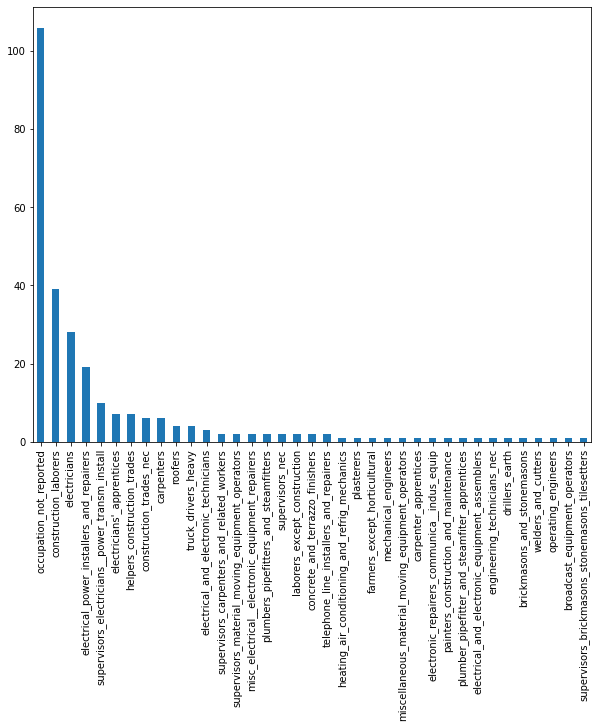

In [ ]:
print(electric_shock["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
electric_shock["trade"].value_counts().plot(kind='bar')

occupation_not_reported                              79
construction_laborers                                37
construction_trades_nec                               8
excavating_and_loading_machine_operators              5
laborers_except_construction                          3
paving_surfacing_and_tamping_equipment_operators      3
miscellaneous_material_moving_equipment_operators     3
carpenters                                            2
painters_construction_and_maintenance                 2
guards_and_police_excluding_public_service            2
supervisors_handlersequip_cleanerslaborers_nec        2
plumbers_pipefitters_and_steamfitters                 2
heating_air_conditioning_and_refrig_mechanics         1
civil_engineers                                       1
plumber_pipefitter_and_steamfiter_apprentices         1
sailors_and_deckhands                                 1
supervisors_plumbers_pipefitters__steamfitters        1
supervisors_brickmasons_stonemasons_tilesetters 

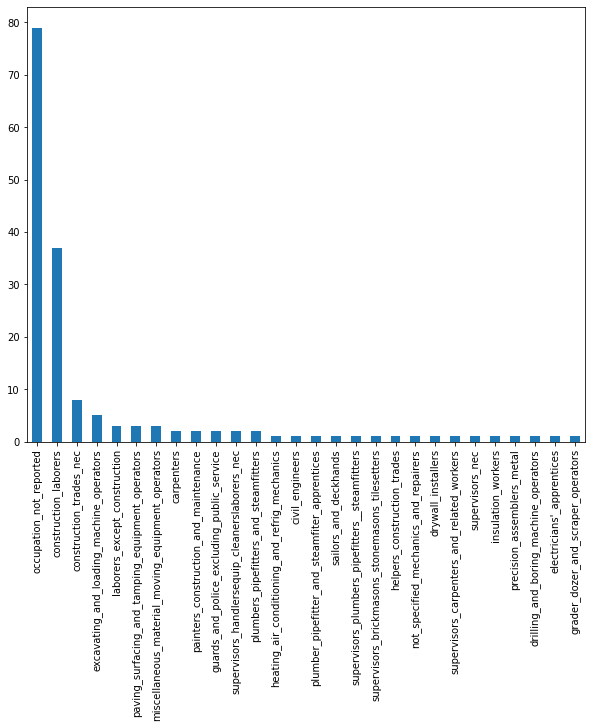

In [ ]:
print(asphyxia["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
asphyxia["trade"].value_counts().plot(kind='bar')

occupation_not_reported                             36
construction_laborers                               17
welders_and_cutters                                 16
roofers                                              8
electricians                                         8
construction_trades_nec                              7
helpers_construction_trades                          5
laborers_except_construction                         4
electrical_and_electronic_technicians                2
mechanical_engineering_technicians                   2
technicians_nec                                      2
supervisors_carpenters_and_related_workers           2
excavating_and_loading_machine_operators             2
truck_drivers_heavy                                  2
electrical_power_installers_and_repairers            2
plumbers_pipefitters_and_steamfitters                2
grader_dozer_and_scraper_operators                   2
plumber_pipefitter_and_steamfiter_apprentices        1
painting_a

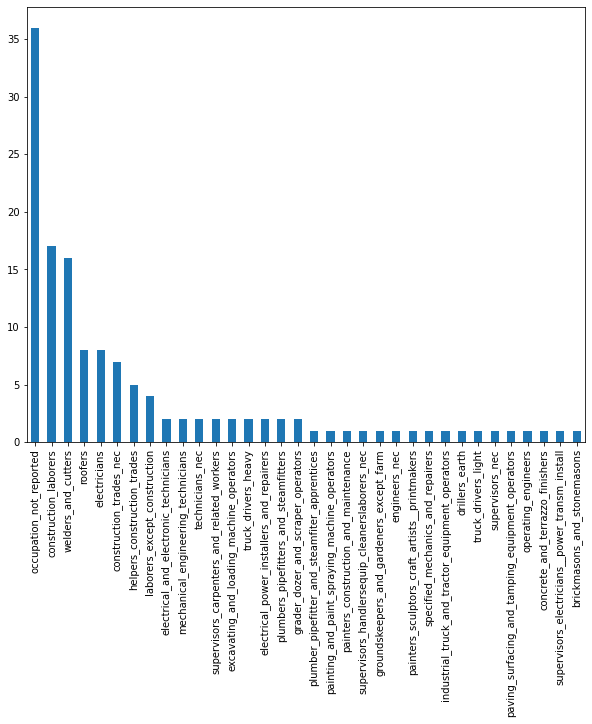

In [ ]:
print(burn_scald_heat["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_scald_heat["trade"].value_counts().plot(kind='bar')

carpenters                                         38
occupation_not_reported                            28
construction_laborers                              22
roofers                                             4
carpenter_apprentices                               4
concrete_and_terrazzo_finishers                     2
painters_construction_and_maintenance               2
supervisors_carpenters_and_related_workers          2
construction_trades_nec                             2
helpers_construction_trades                         1
welders_and_cutters                                 1
crane_and_tower_operators                           1
brickmasons_and_stonemasons                         1
supervisors_material_moving_equipment_operators     1
plumbers_pipefitters_and_steamfitters               1
Name: trade, dtype: int64


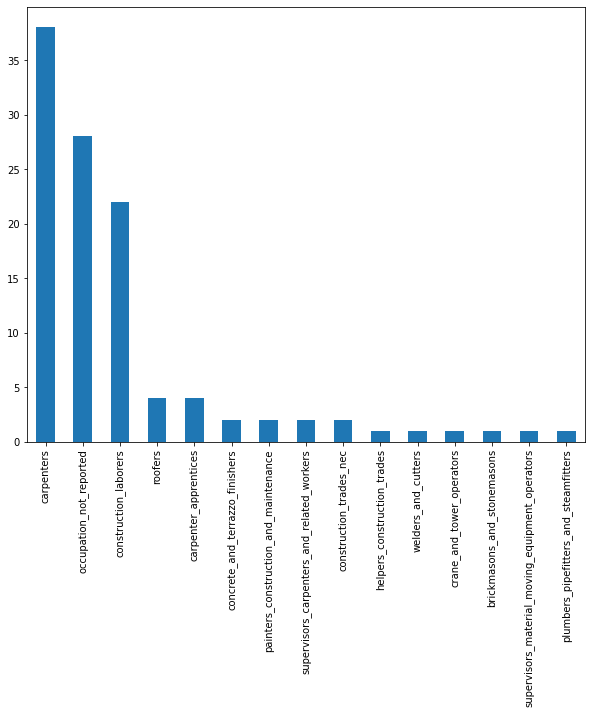

In [ ]:
print(puncture["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
puncture["trade"].value_counts().plot(kind='bar')

construction_laborers                               23
occupation_not_reported                             12
carpenters                                           6
roofers                                              4
welders_and_cutters                                  2
construction_trades_nec                              2
plasterers                                           2
helpers_construction_trades                          1
painters_construction_and_maintenance                1
electricians                                         1
crane_and_tower_operators                            1
paving_surfacing_and_tamping_equipment_operators     1
helpers_mechanics_and_repairers                      1
Name: trade, dtype: int64


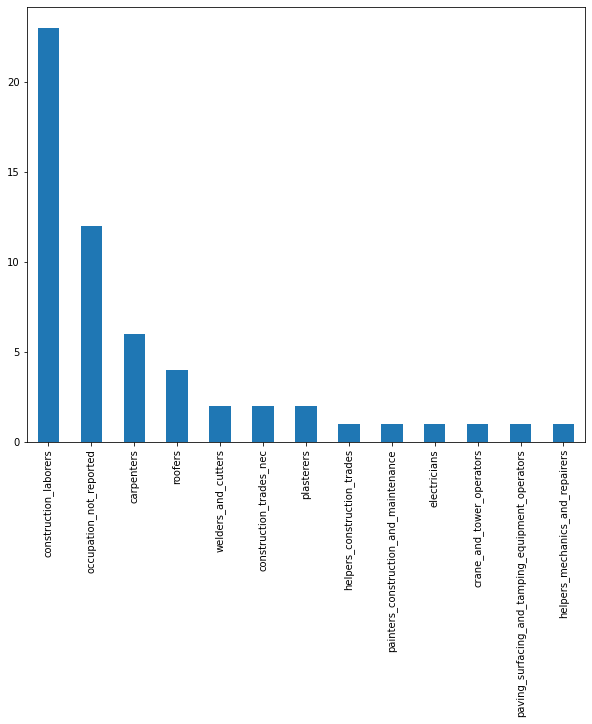

In [ ]:
print(heat_exhaustion["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
heat_exhaustion["trade"].value_counts().plot(kind='bar')

construction_laborers                               23
occupation_not_reported                             12
carpenters                                           6
roofers                                              4
welders_and_cutters                                  2
construction_trades_nec                              2
plasterers                                           2
helpers_construction_trades                          1
painters_construction_and_maintenance                1
electricians                                         1
crane_and_tower_operators                            1
paving_surfacing_and_tamping_equipment_operators     1
helpers_mechanics_and_repairers                      1
Name: trade, dtype: int64


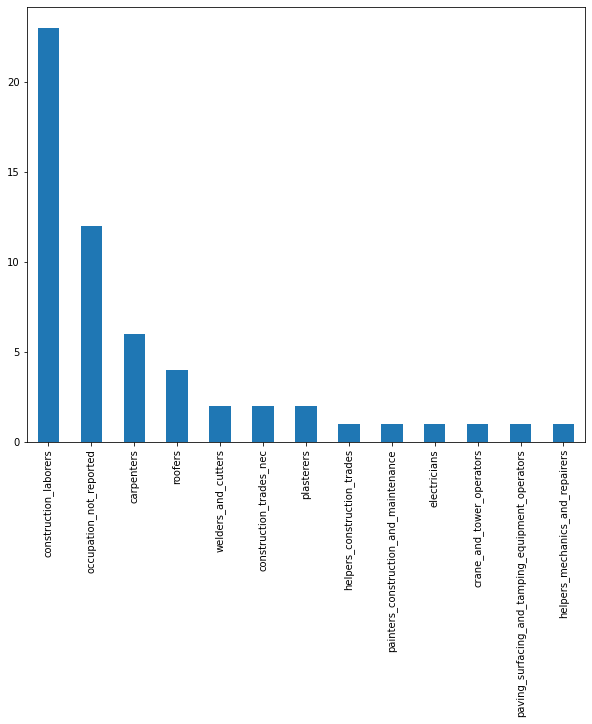

In [ ]:
print(heat_exhaustion["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
heat_exhaustion["trade"].value_counts().plot(kind='bar')

occupation_not_reported                             11
construction_laborers                               10
carpenters                                           6
plumbers_pipefitters_and_steamfitters                2
painters_construction_and_maintenance                2
helpers_construction_trades                          2
supervisors_carpenters_and_related_workers           1
construction_trades_nec                              1
carpenter_apprentices                                1
excavating_and_loading_machine_operators             1
hand_painting_coating_and_decorating_occupations     1
supervisors_extractive_occupations                   1
industrial_machinery_repairers                       1
welders_and_cutters                                  1
managers_and_administrators_nec                      1
heavy_equipment_mechanics                            1
machine_operators_not_specified                      1
specified_mechanics_and_repairers                    1
roofers   

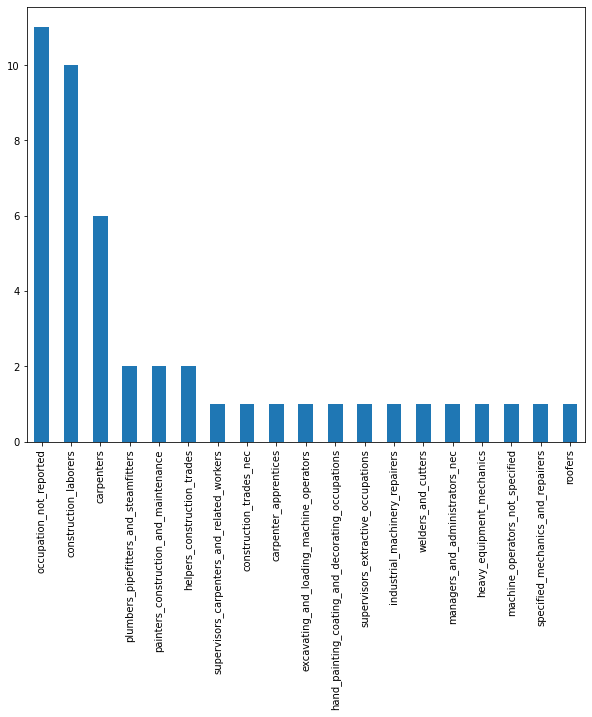

In [ ]:
print(strain_sprain ["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
strain_sprain ["trade"].value_counts().plot(kind='bar')

occupation_not_reported                              9
carpenters                                           6
construction_laborers                                5
painters_construction_and_maintenance                3
construction_trades_nec                              2
roofers                                              2
structural_metal_workers                             2
managers_and_administrators_nec                      1
paving_surfacing_and_tamping_equipment_operators     1
miscellaneous_material_moving_equipment_operators    1
construction_inspectors                              1
supervisors_carpenters_and_related_workers           1
concrete_and_terrazzo_finishers                      1
helpers_construction_trades                          1
drywall_installers                                   1
plumbers_pipefitters_and_steamfitters                1
supervisors_plumbers_pipefitters__steamfitters       1
Name: trade, dtype: int64


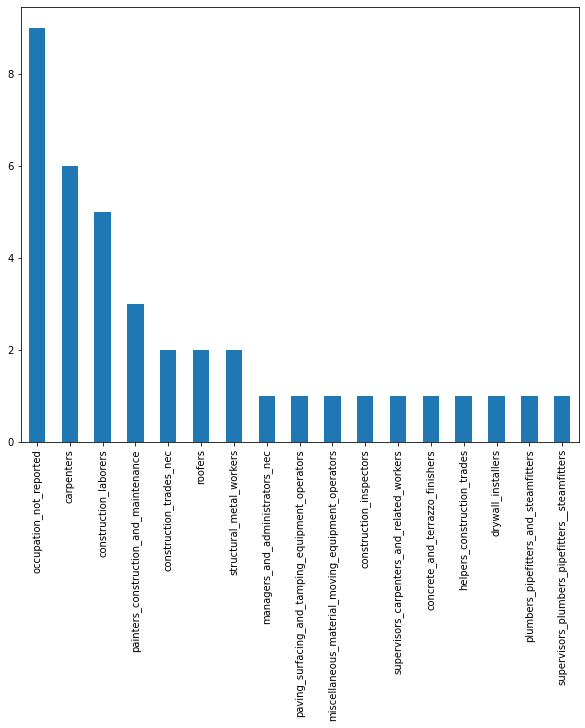

In [ ]:
print(dislocation["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
dislocation["trade"].value_counts().plot(kind='bar')

construction_laborers                               5
occupation_not_reported                             5
household_appliance_and_power_tool_repairers        1
brickmasons_and_stonemasons                         1
grader_dozer_and_scraper_operators                  1
heavy_equipment_mechanics                           1
carpenters                                          1
plumber_pipefitter_and_steamfiter_apprentices       1
paving_surfacing_and_tamping_equipment_operators    1
plumbers_pipefitters_and_steamfitters               1
Name: trade, dtype: int64


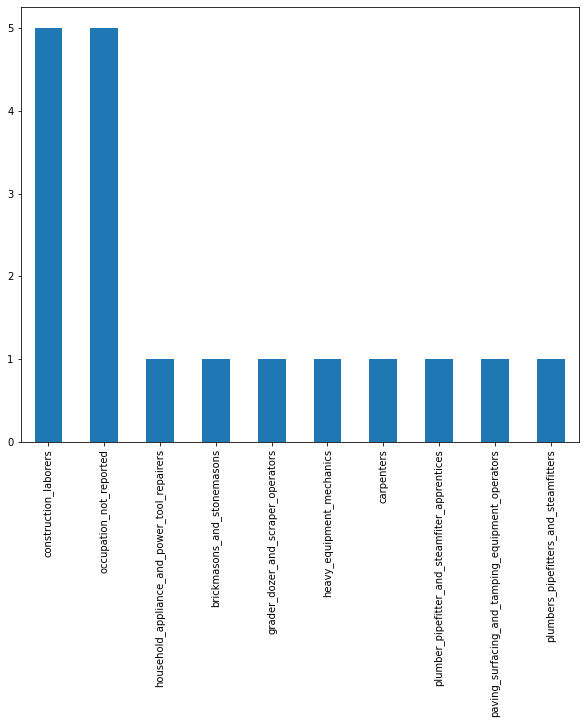

In [ ]:
print(burn_chemical["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_chemical["trade"].value_counts().plot(kind='bar')

carpenters                 3
construction_laborers      3
occupation_not_reported    2
explosives_workers         1
Name: trade, dtype: int64


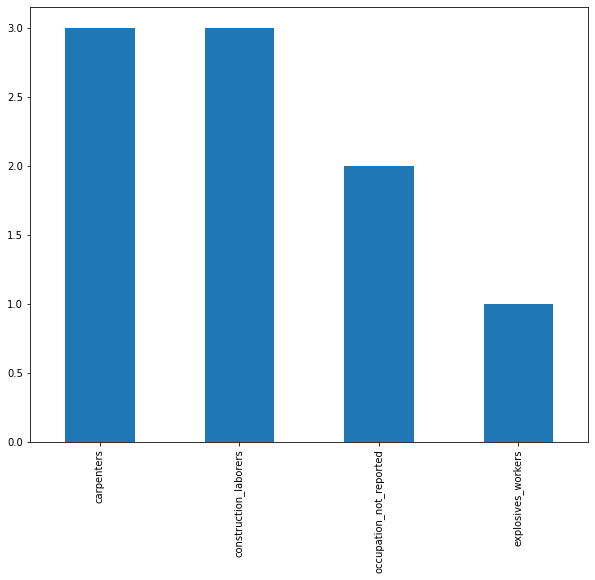

In [ ]:
print(foreign_body_ineye["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
foreign_body_ineye["trade"].value_counts().plot(kind='bar')

occupation_not_reported                          3
construction_laborers                            2
painters_construction_and_maintenance            1
plumber_pipefitter_and_steamfiter_apprentices    1
welders_and_cutters                              1
Name: trade, dtype: int64


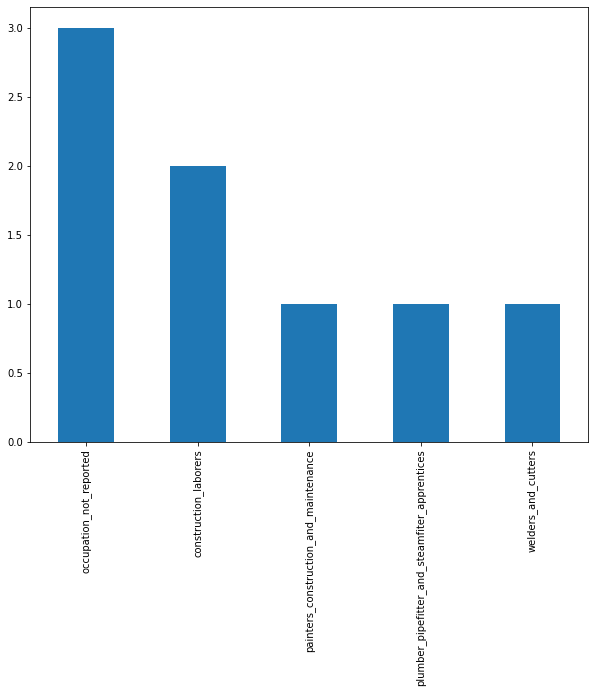

In [ ]:
print(poisoning_systemic["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
poisoning_systemic["trade"].value_counts().plot(kind='bar')

occupation_not_reported                              2
carpenters                                           1
miscellaneous_material_moving_equipment_operators    1
sheet_metal_workers                                  1
paving_surfacing_and_tamping_equipment_operators     1
laborers_except_construction                         1
Name: trade, dtype: int64


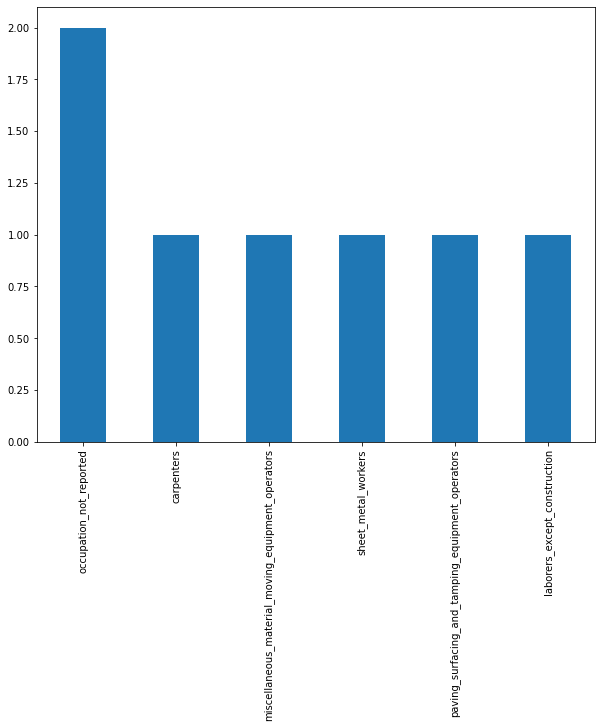

In [ ]:
print(freezing_frost_bite["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
freezing_frost_bite["trade"].value_counts().plot(kind='bar')

truck_drivers_heavy                   1
laborers_except_construction          1
grader_dozer_and_scraper_operators    1
Name: trade, dtype: int64


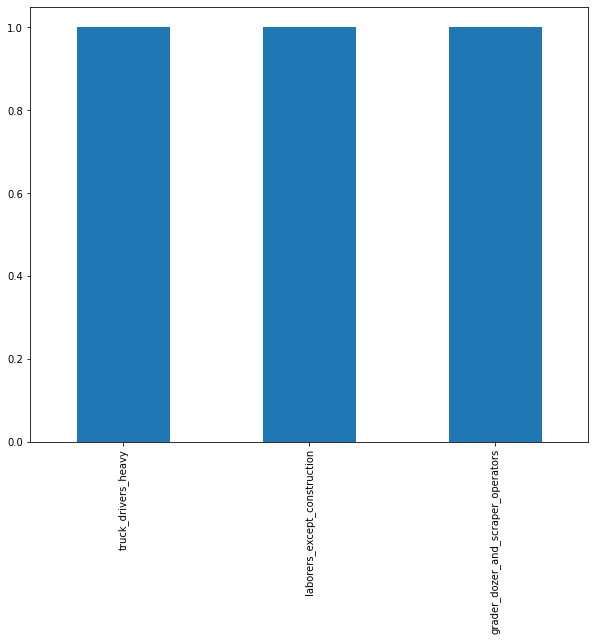

In [ ]:
print(hernia["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hernia["trade"].value_counts().plot(kind='bar')

construction_laborers      1
occupation_not_reported    1
Name: trade, dtype: int64


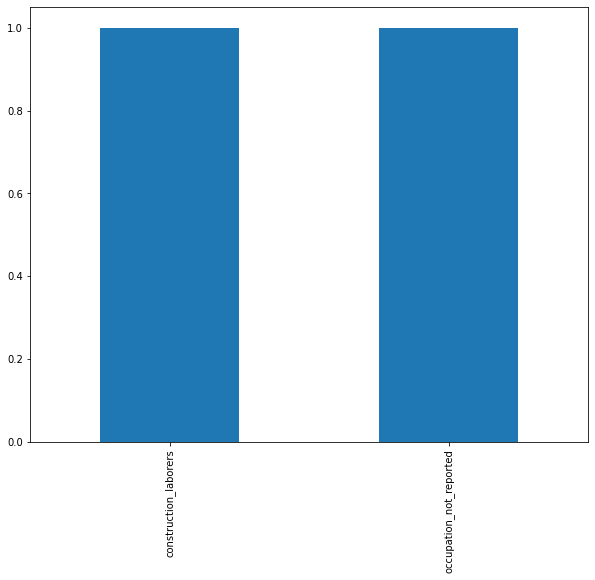

In [ ]:
print(cancer["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cancer["trade"].value_counts().plot(kind='bar')

occupation_not_reported    1
Name: trade, dtype: int64


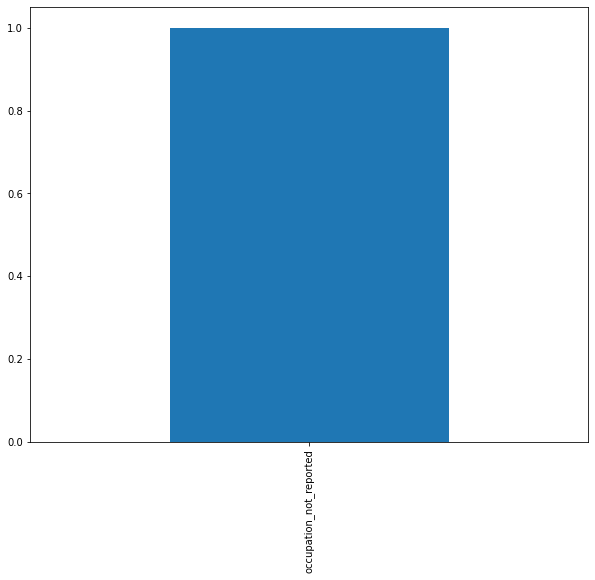

In [ ]:
print(hearing_loss["trade"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hearing_loss["trade"].value_counts().plot(kind='bar')

##Conclusion
* construction labours and carpenters are almost prone to all the injury type they dominate many fields interchangeably
* Hernia is related to vehicle drivers/ heavy vehicle drivers

##Distribution of end_use in each Injury type

singlefamily_duplexdwelling           546
commercialbuilding                    468
highway_road_street                   224
otherbuilding                         223
multi_familydwelling                  168
sewer_watertreatmentplant              61
bridge                                 61
pipeline                               58
otherheavyconstruction                 34
manufacturingplant                     24
tower_tank_storageelevator             22
powerline_transmissionline             21
excavation_landfill                    20
contractor'syard_facility              20
powerplant                             17
shorelinedevelopment_dam_reservoir      8
refinery                                8
Name: end_use, dtype: int64


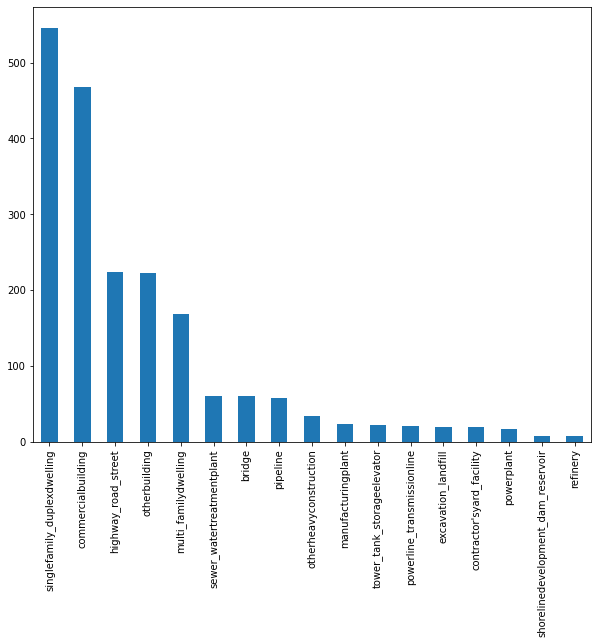

In [ ]:
print(fracture["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
fracture["end_use"].value_counts().plot(kind='bar')

highway_road_street                   297
singlefamily_duplexdwelling           250
commercialbuilding                    187
otherbuilding                         165
multi_familydwelling                   77
bridge                                 66
otherheavyconstruction                 51
pipeline                               50
sewer_watertreatmentplant              49
manufacturingplant                     28
tower_tank_storageelevator             28
powerplant                             26
excavation_landfill                    26
contractor'syard_facility              17
powerline_transmissionline             15
refinery                               10
shorelinedevelopment_dam_reservoir     10
nbsp_                                   1
Name: end_use, dtype: int64


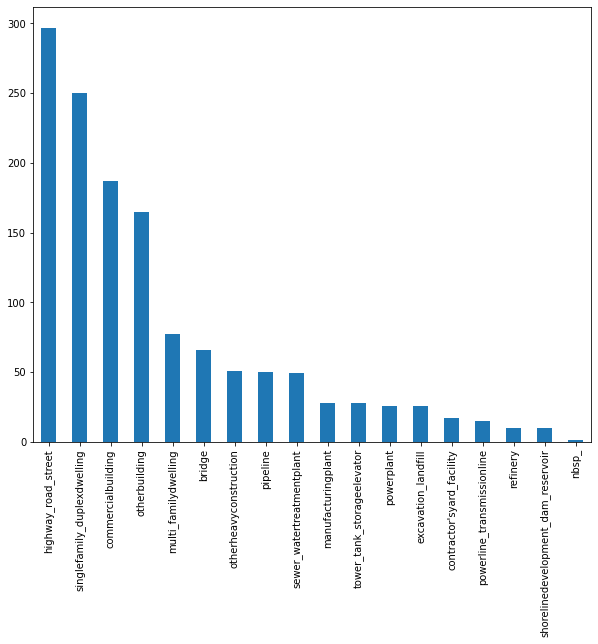

In [ ]:
print(other["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
other["end_use"].value_counts().plot(kind='bar')

singlefamily_duplexdwelling           126
commercialbuilding                     55
otherbuilding                          53
highway_road_street                    46
multi_familydwelling                   24
pipeline                               16
bridge                                 12
otherheavyconstruction                  9
manufacturingplant                      9
excavation_landfill                     8
powerline_transmissionline              6
sewer_watertreatmentplant               6
contractor'syard_facility               5
refinery                                5
shorelinedevelopment_dam_reservoir      4
powerplant                              3
tower_tank_storageelevator              1
Name: end_use, dtype: int64


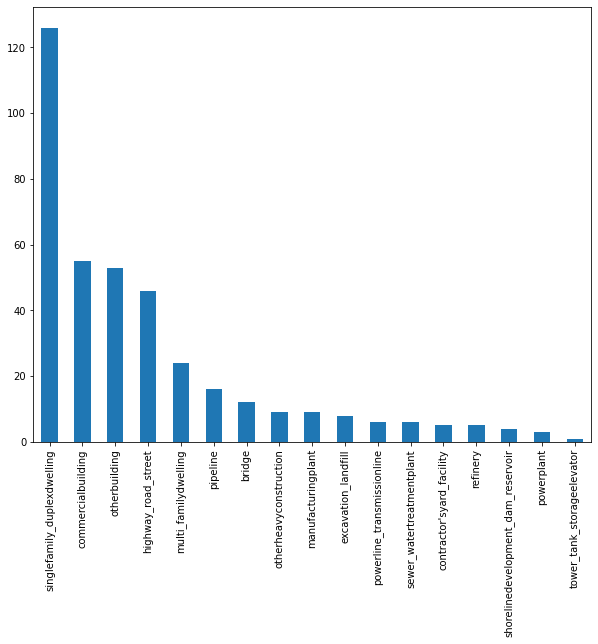

In [ ]:
print(amputation["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
amputation["end_use"].value_counts().plot(kind='bar')

singlefamily_duplexdwelling           95
commercialbuilding                    81
otherbuilding                         47
highway_road_street                   41
multi_familydwelling                  34
bridge                                19
sewer_watertreatmentplant              9
manufacturingplant                     9
otherheavyconstruction                 9
powerline_transmissionline             8
pipeline                               6
excavation_landfill                    6
powerplant                             6
refinery                               4
tower_tank_storageelevator             4
contractor'syard_facility              1
shorelinedevelopment_dam_reservoir     1
Name: end_use, dtype: int64


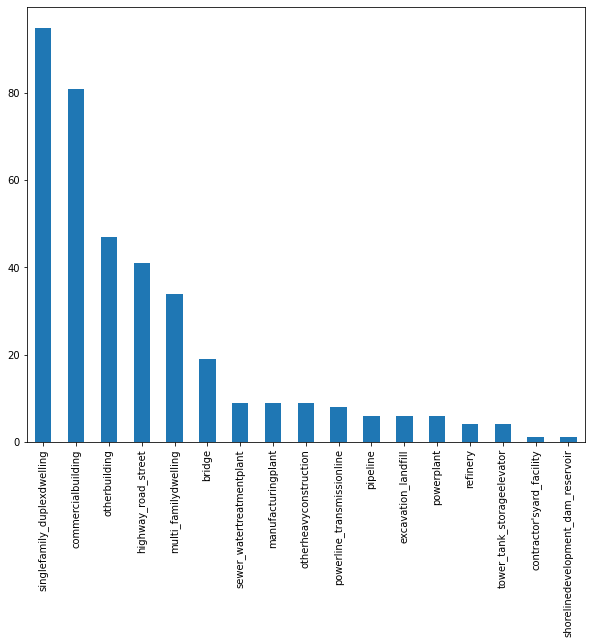

In [ ]:
print(concussion["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
concussion["end_use"].value_counts().plot(kind='bar')

highway_road_street            69
commercialbuilding             67
singlefamily_duplexdwelling    66
otherbuilding                  26
multi_familydwelling           25
bridge                         16
pipeline                       15
otherheavyconstruction         13
sewer_watertreatmentplant      12
manufacturingplant             10
powerplant                      8
contractor'syard_facility       4
excavation_landfill             4
powerline_transmissionline      4
refinery                        2
tower_tank_storageelevator      1
Name: end_use, dtype: int64


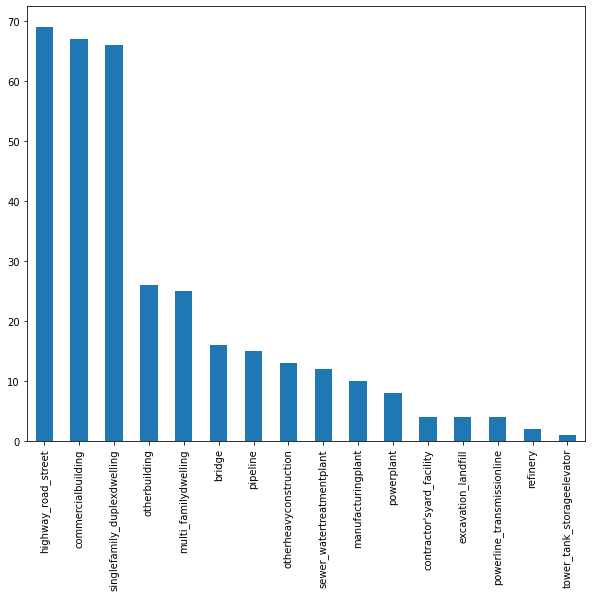

In [ ]:
print(bruise_contus_abras["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
bruise_contus_abras["end_use"].value_counts().plot(kind='bar')

* Bruise occurs in road accidents

singlefamily_duplexdwelling           105
commercialbuilding                     63
otherbuilding                          38
multi_familydwelling                   22
highway_road_street                    20
pipeline                               10
bridge                                 10
manufacturingplant                      6
sewer_watertreatmentplant               6
powerline_transmissionline              4
excavation_landfill                     3
contractor'syard_facility               3
tower_tank_storageelevator              2
otherheavyconstruction                  2
shorelinedevelopment_dam_reservoir      2
refinery                                1
Name: end_use, dtype: int64


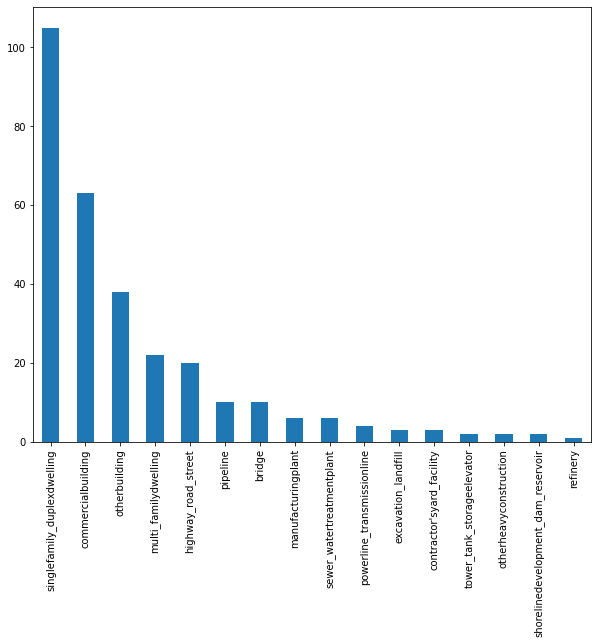

In [ ]:
print(cut_laceration["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cut_laceration["end_use"].value_counts().plot(kind='bar')

powerline_transmissionline            57
singlefamily_duplexdwelling           50
commercialbuilding                    48
otherbuilding                         34
highway_road_street                   29
multi_familydwelling                   9
sewer_watertreatmentplant              9
otherheavyconstruction                 7
powerplant                             6
pipeline                               6
manufacturingplant                     5
bridge                                 3
tower_tank_storageelevator             3
shorelinedevelopment_dam_reservoir     2
refinery                               2
nbsp_                                  1
excavation_landfill                    1
Name: end_use, dtype: int64


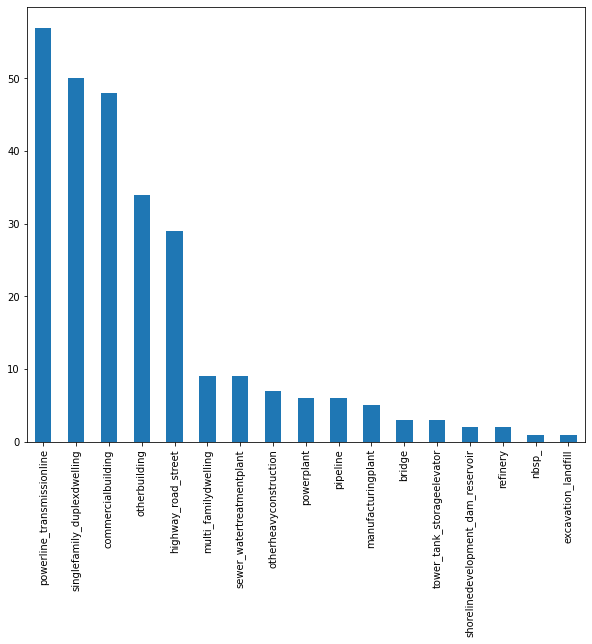

In [ ]:
print(electric_shock["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
electric_shock["end_use"].value_counts().plot(kind='bar')

* Occurs mostly in power line transmission

singlefamily_duplexdwelling           43
highway_road_street                   26
pipeline                              13
excavation_landfill                   13
otherbuilding                         13
commercialbuilding                    13
sewer_watertreatmentplant              9
multi_familydwelling                   9
otherheavyconstruction                 7
bridge                                 6
manufacturingplant                     4
shorelinedevelopment_dam_reservoir     3
tower_tank_storageelevator             2
contractor'syard_facility              2
refinery                               1
Name: end_use, dtype: int64


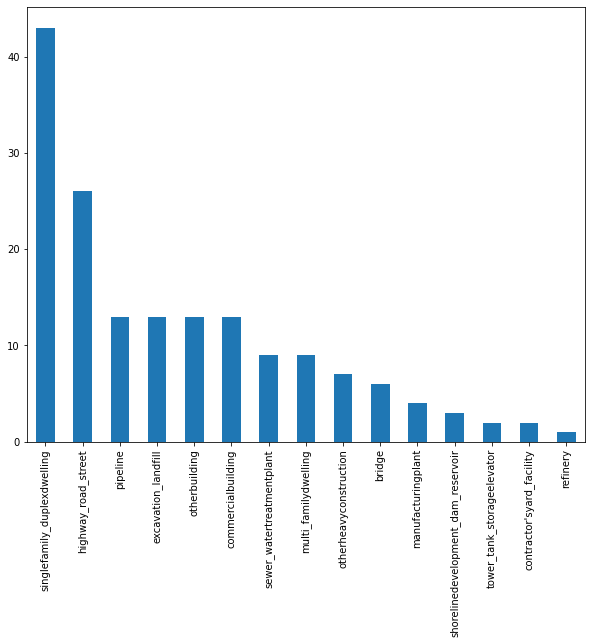

In [ ]:
print(asphyxia["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
asphyxia["end_use"].value_counts().plot(kind='bar')

commercialbuilding                    33
otherbuilding                         20
highway_road_street                   16
singlefamily_duplexdwelling           14
pipeline                              11
otherheavyconstruction                 7
powerline_transmissionline             7
contractor'syard_facility              6
refinery                               6
multi_familydwelling                   4
excavation_landfill                    4
sewer_watertreatmentplant              3
manufacturingplant                     2
powerplant                             1
bridge                                 1
shorelinedevelopment_dam_reservoir     1
Name: end_use, dtype: int64


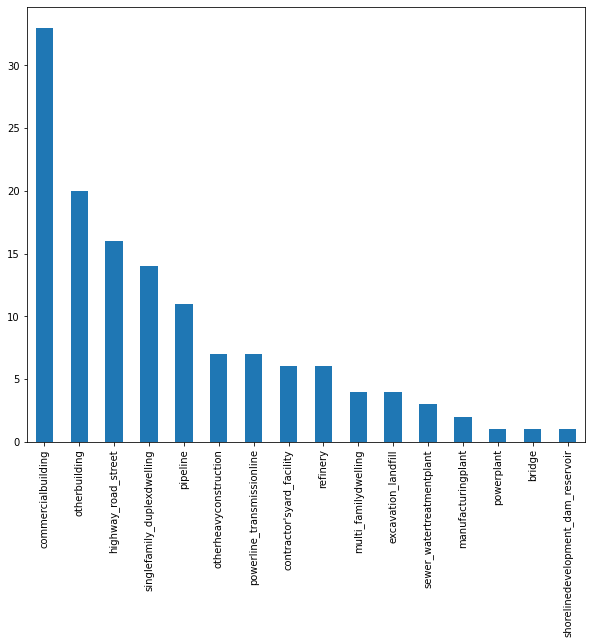

In [ ]:
print(burn_scald_heat["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_scald_heat["end_use"].value_counts().plot(kind='bar')

singlefamily_duplexdwelling    57
multi_familydwelling           14
otherbuilding                  12
highway_road_street            11
commercialbuilding              5
bridge                          4
sewer_watertreatmentplant       2
tower_tank_storageelevator      1
manufacturingplant              1
contractor'syard_facility       1
otherheavyconstruction          1
pipeline                        1
Name: end_use, dtype: int64


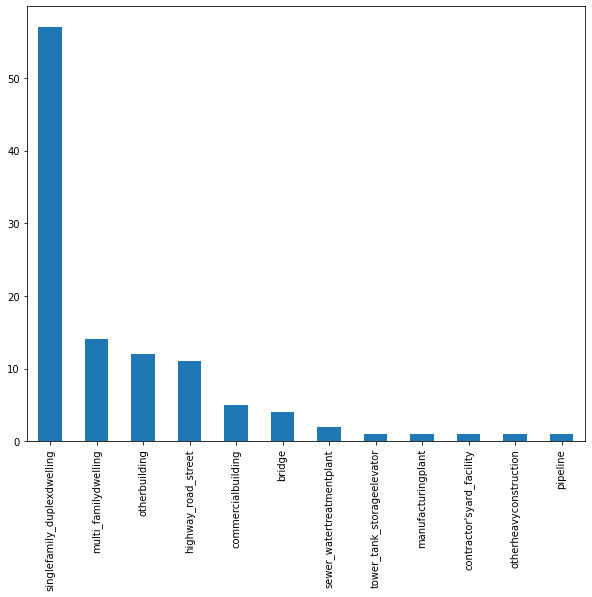

In [ ]:
print(puncture ["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
puncture ["end_use"].value_counts().plot(kind='bar')

commercialbuilding             11
singlefamily_duplexdwelling    10
otherbuilding                   9
highway_road_street             8
pipeline                        4
bridge                          3
multi_familydwelling            3
otherheavyconstruction          3
powerplant                      2
manufacturingplant              2
powerline_transmissionline      1
nbsp_                           1
Name: end_use, dtype: int64


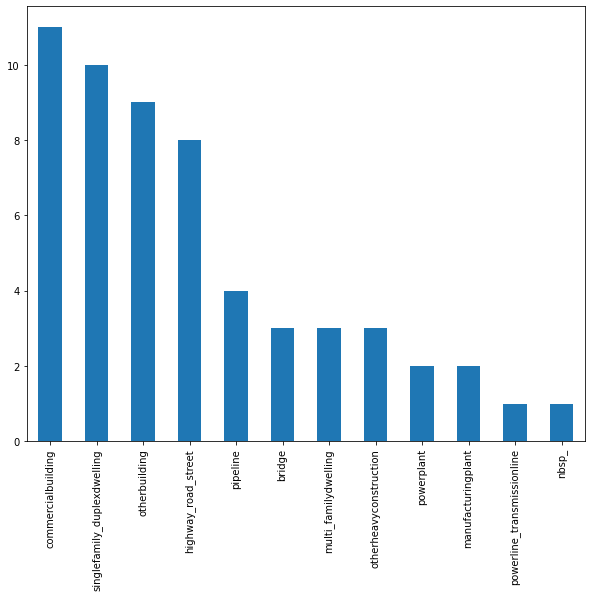

In [ ]:
print(heat_exhaustion["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
heat_exhaustion["end_use"].value_counts().plot(kind='bar')

* burn and heat related issues occur more in commercial construction

singlefamily_duplexdwelling    10
commercialbuilding              9
sewer_watertreatmentplant       6
otherbuilding                   6
multi_familydwelling            4
highway_road_street             4
otherheavyconstruction          2
tower_tank_storageelevator      1
refinery                        1
manufacturingplant              1
powerplant                      1
bridge                          1
Name: end_use, dtype: int64


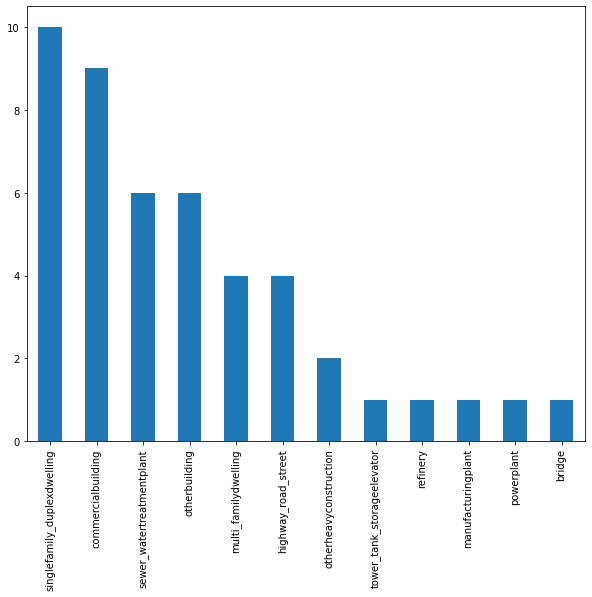

In [ ]:
print(strain_sprain["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
strain_sprain["end_use"].value_counts().plot(kind='bar')

singlefamily_duplexdwelling    15
commercialbuilding              6
highway_road_street             4
bridge                          3
otherbuilding                   3
sewer_watertreatmentplant       2
excavation_landfill             2
multi_familydwelling            2
refinery                        1
tower_tank_storageelevator      1
Name: end_use, dtype: int64


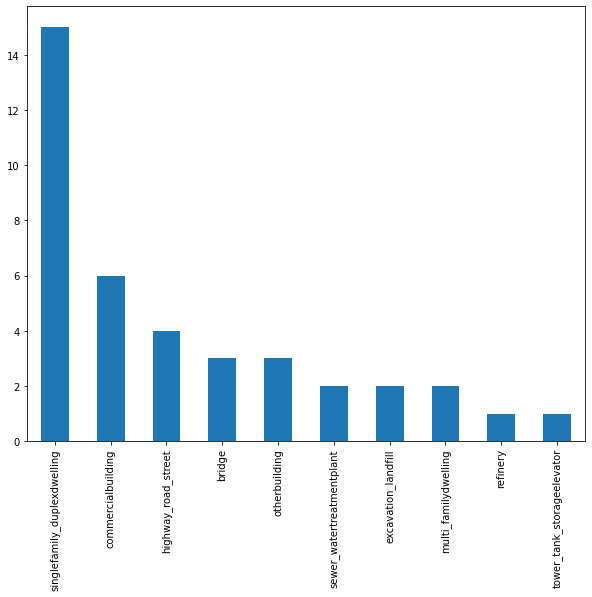

In [ ]:
print(dislocation["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
dislocation["end_use"].value_counts().plot(kind='bar')

otherbuilding                  4
sewer_watertreatmentplant      2
commercialbuilding             2
manufacturingplant             2
highway_road_street            2
singlefamily_duplexdwelling    2
multi_familydwelling           1
bridge                         1
refinery                       1
excavation_landfill            1
Name: end_use, dtype: int64


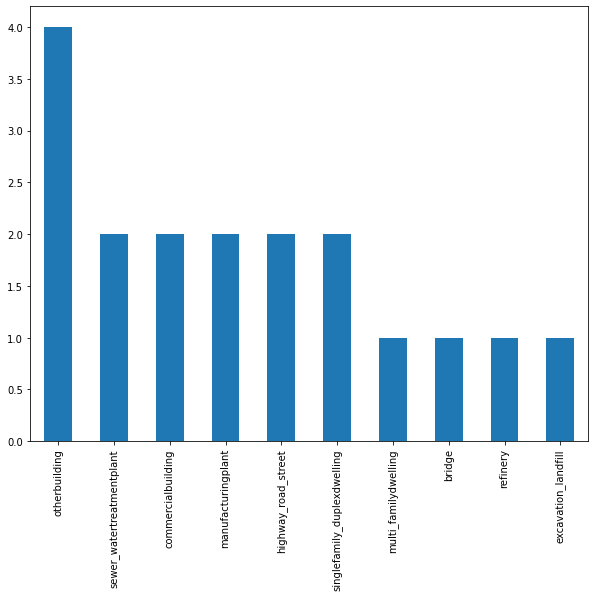

In [ ]:
print(burn_chemical["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_chemical["end_use"].value_counts().plot(kind='bar')

commercialbuilding             3
singlefamily_duplexdwelling    3
otherbuilding                  1
otherheavyconstruction         1
multi_familydwelling           1
Name: end_use, dtype: int64


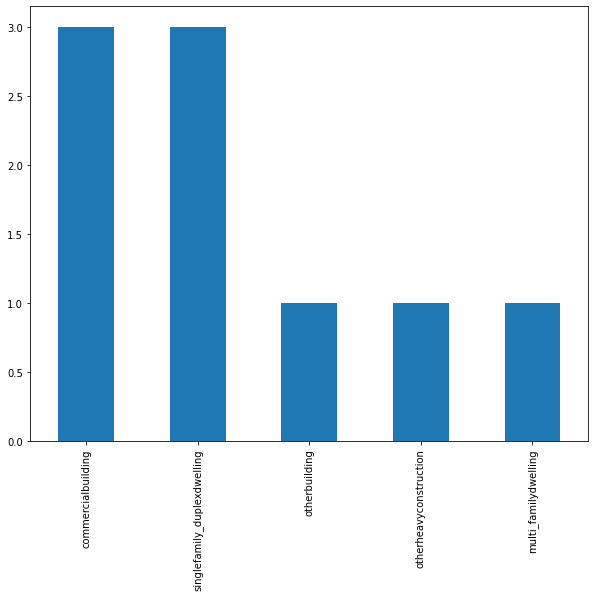

In [ ]:
print(foreign_body_ineye["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
foreign_body_ineye["end_use"].value_counts().plot(kind='bar')

commercialbuilding            3
multi_familydwelling          2
refinery                      1
sewer_watertreatmentplant     1
tower_tank_storageelevator    1
Name: end_use, dtype: int64


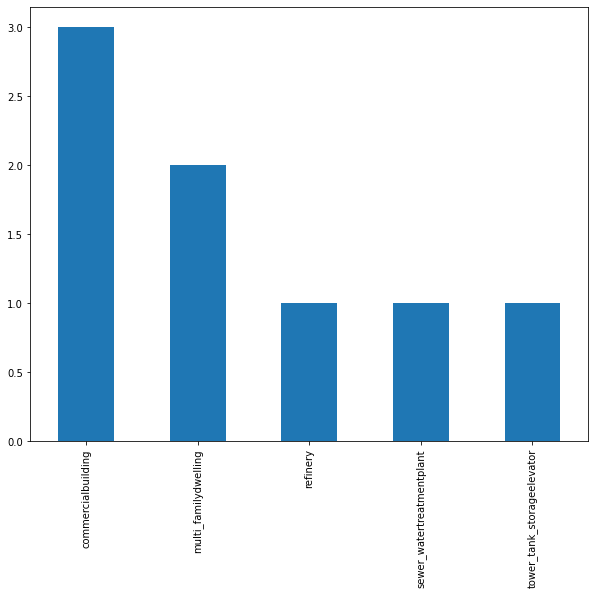

In [ ]:
print(poisoning_systemic["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
poisoning_systemic["end_use"].value_counts().plot(kind='bar')

highway_road_street            3
commercialbuilding             1
contractor'syard_facility      1
multi_familydwelling           1
singlefamily_duplexdwelling    1
Name: end_use, dtype: int64


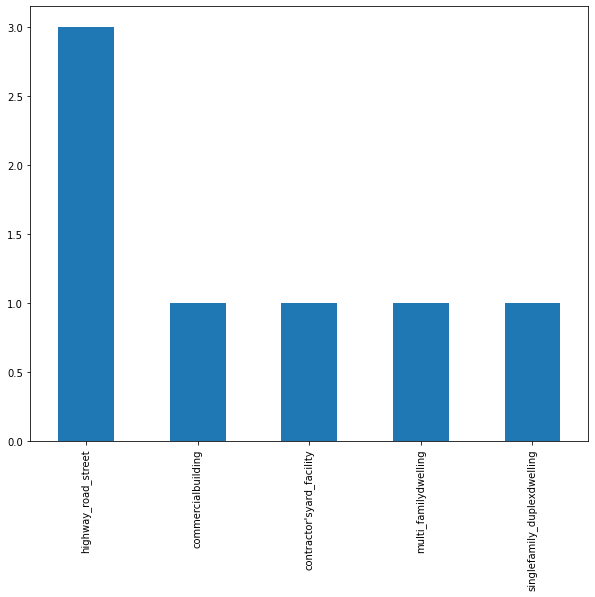

In [ ]:
print(freezing_frost_bite["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
freezing_frost_bite["end_use"].value_counts().plot(kind='bar')

*Frost bite happens more in open environment like road construction

highway_road_street            2
singlefamily_duplexdwelling    1
Name: end_use, dtype: int64


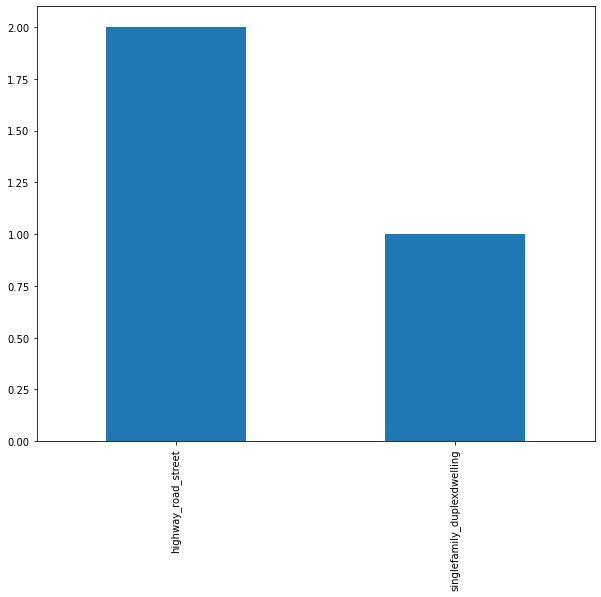

In [ ]:
print(hernia["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hernia["end_use"].value_counts().plot(kind='bar')

* It affirms the assumption we made that it occurs ore for drivers

sewer_watertreatmentplant    1
commercialbuilding           1
Name: end_use, dtype: int64


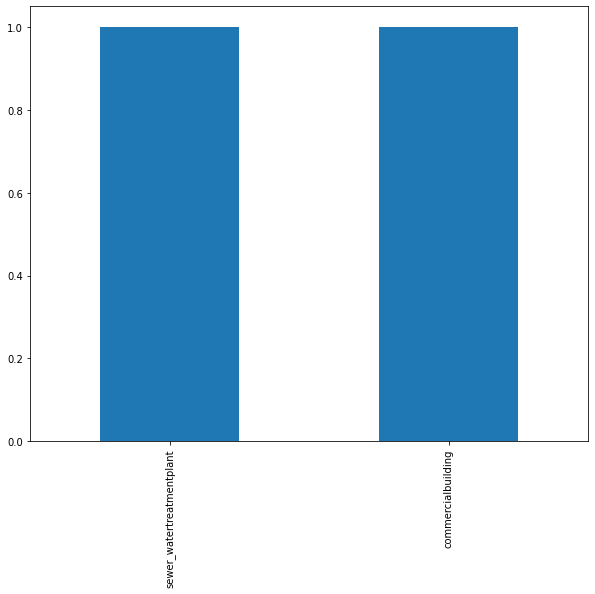

In [ ]:
print(cancer["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cancer["end_use"].value_counts().plot(kind='bar')

singlefamily_duplexdwelling    1
Name: end_use, dtype: int64


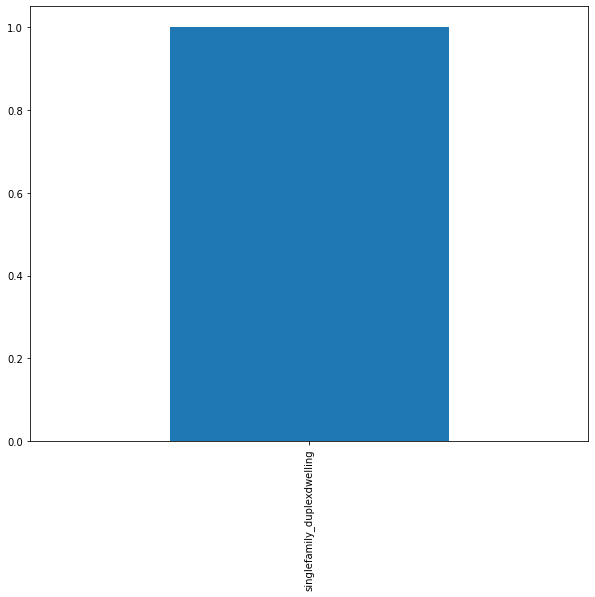

In [ ]:
print(hearing_loss["end_use"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hearing_loss["end_use"].value_counts().plot(kind='bar')

##Conclusion
* Most accidents occur in Single dwellings and commercial buildings

##Distribution of project_type in each injury type

new_project_new_addition     1036
alteration_rehabilitation     416
maintenance_repair            337
other                         137
demolition                     57
Name: project_type, dtype: int64


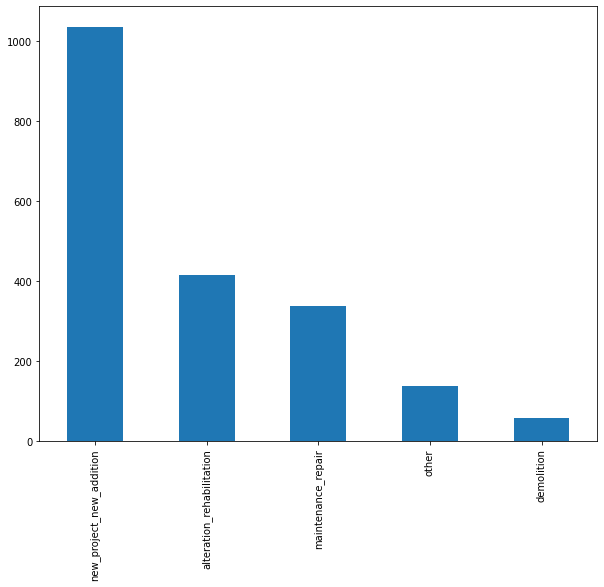

In [ ]:
print(fracture["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
fracture["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     666
maintenance_repair           256
alteration_rehabilitation    224
other                        165
demolition                    42
Name: project_type, dtype: int64


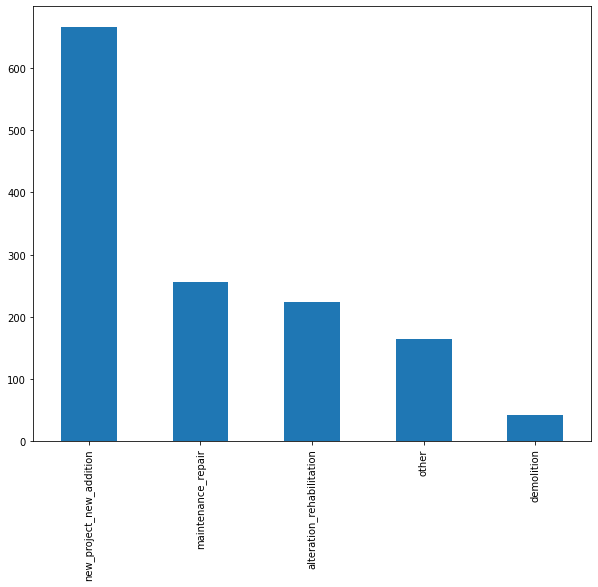

In [ ]:
print(other["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
other["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     189
alteration_rehabilitation     85
maintenance_repair            64
other                         43
demolition                     7
Name: project_type, dtype: int64


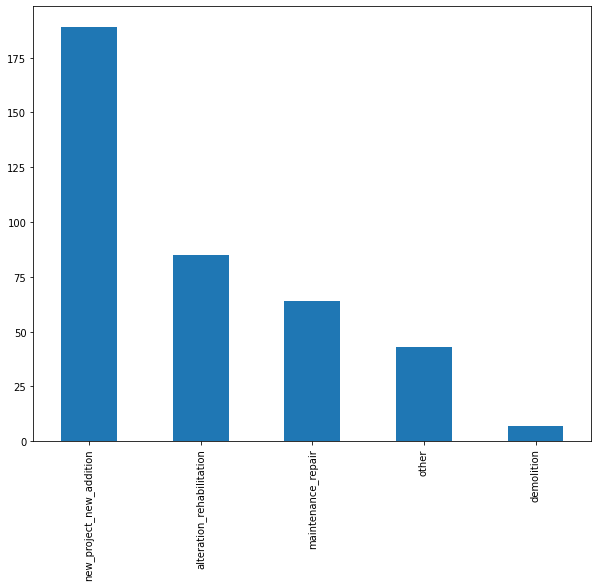

In [ ]:
print(amputation["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
amputation["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     209
alteration_rehabilitation     88
maintenance_repair            59
other                         13
demolition                    11
Name: project_type, dtype: int64


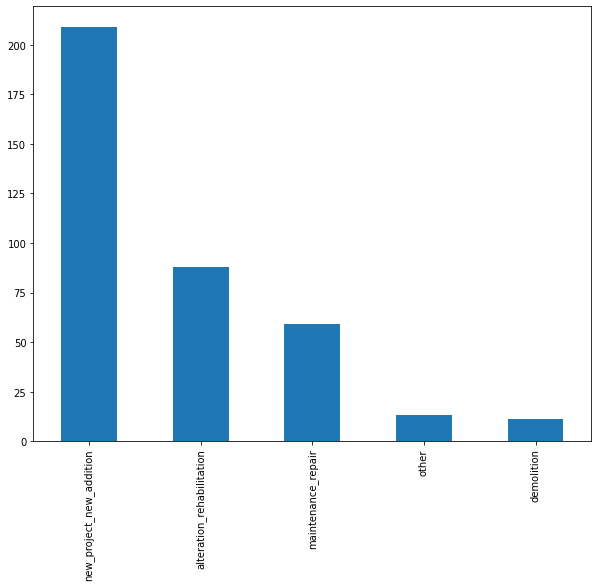

In [ ]:
print(concussion["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
concussion["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     191
maintenance_repair            64
alteration_rehabilitation     63
other                         16
demolition                     8
Name: project_type, dtype: int64


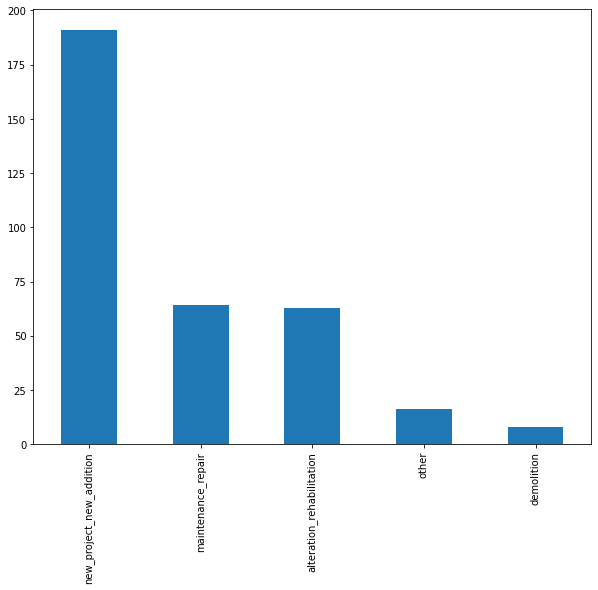

In [ ]:
print(bruise_contus_abras["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
bruise_contus_abras["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     137
alteration_rehabilitation     78
maintenance_repair            53
other                         23
demolition                     6
Name: project_type, dtype: int64


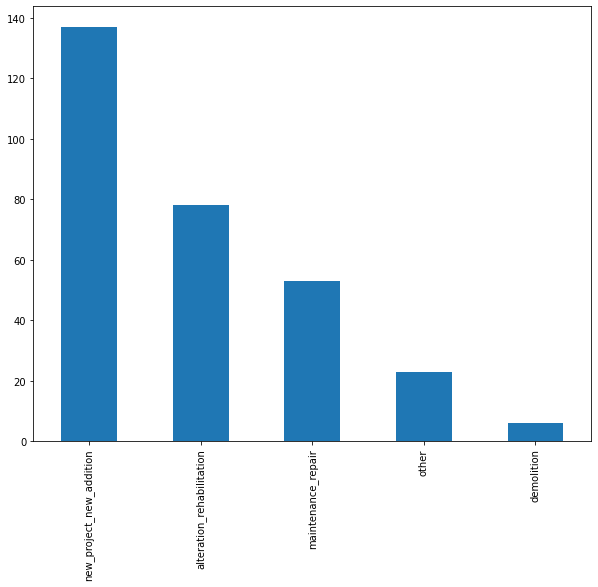

In [ ]:
print(cut_laceration["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cut_laceration["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     114
alteration_rehabilitation     72
maintenance_repair            70
other                         11
demolition                     5
Name: project_type, dtype: int64


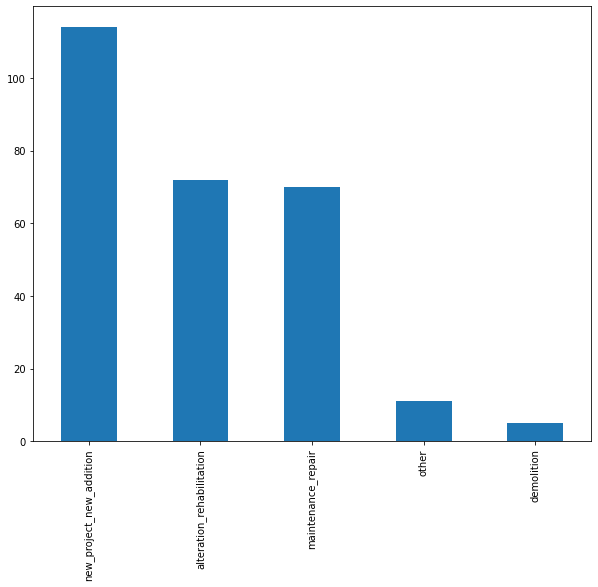

In [ ]:
print(electric_shock["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

electric_shock["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     82
maintenance_repair           33
alteration_rehabilitation    29
other                        14
demolition                    6
Name: project_type, dtype: int64


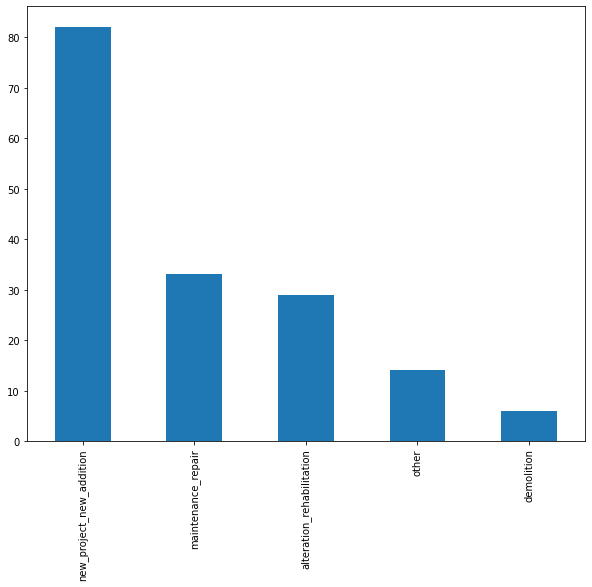

In [ ]:
print(asphyxia ["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
asphyxia ["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     43
maintenance_repair           35
alteration_rehabilitation    34
other                        21
demolition                    3
Name: project_type, dtype: int64


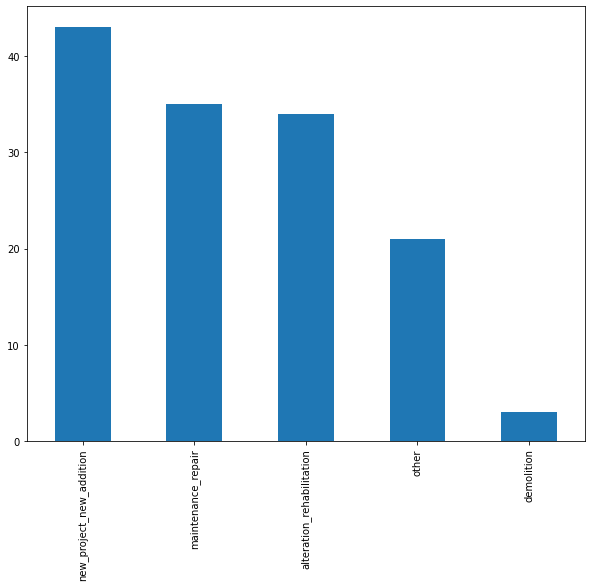

In [ ]:
print(burn_scald_heat["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_scald_heat["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     69
alteration_rehabilitation    19
maintenance_repair           13
other                         7
demolition                    2
Name: project_type, dtype: int64


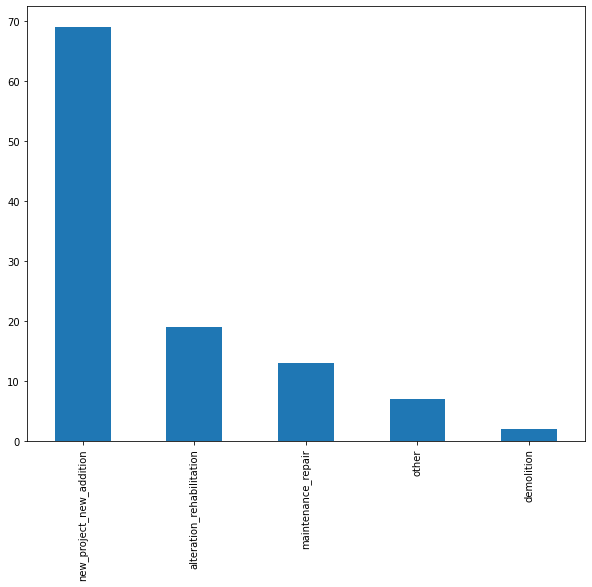

In [ ]:
print(puncture["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
puncture["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     35
maintenance_repair           12
alteration_rehabilitation     5
other                         5
Name: project_type, dtype: int64


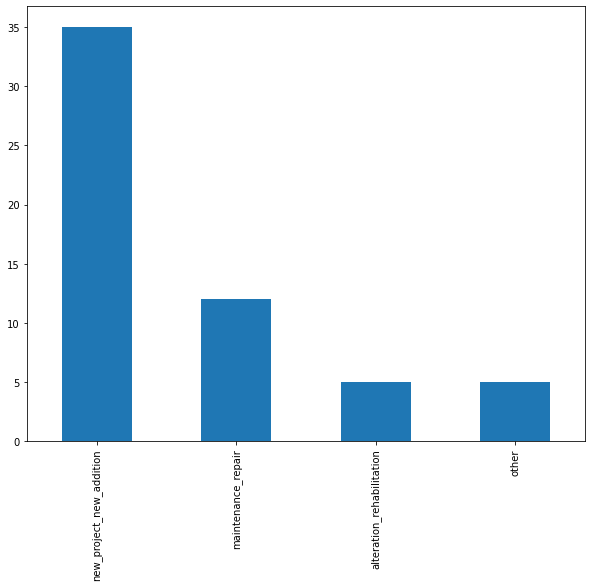

In [ ]:
print(heat_exhaustion["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
heat_exhaustion["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     26
alteration_rehabilitation     9
maintenance_repair            6
other                         4
demolition                    1
Name: project_type, dtype: int64


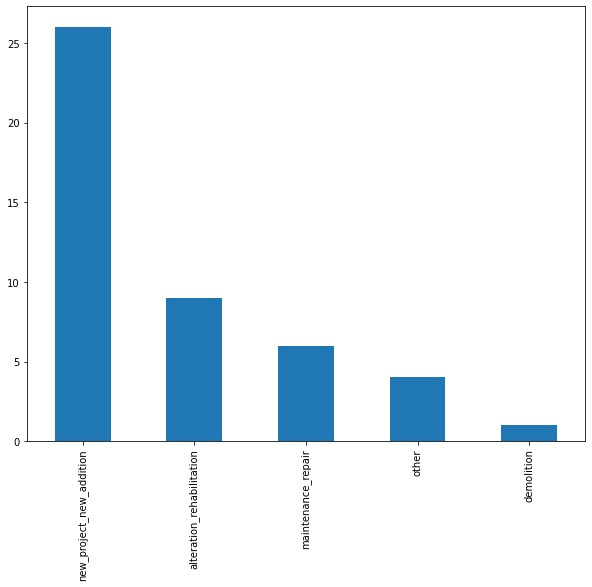

In [ ]:
print(strain_sprain["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
strain_sprain["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     19
alteration_rehabilitation     9
maintenance_repair            8
other                         3
Name: project_type, dtype: int64


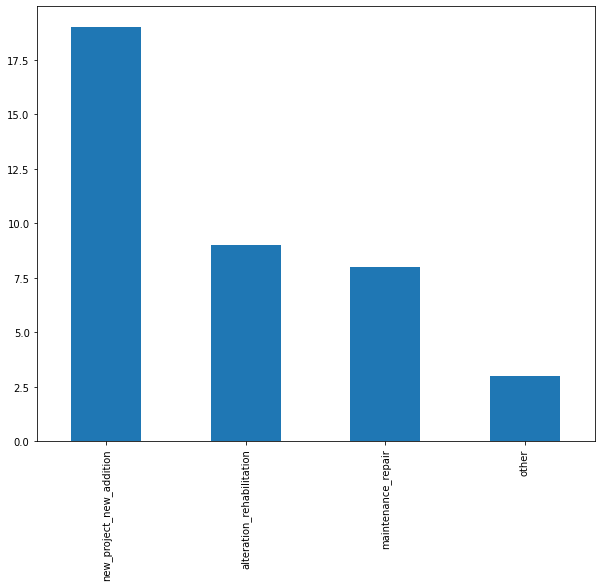

In [ ]:
print(dislocation["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
dislocation["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     8
alteration_rehabilitation    5
other                        2
maintenance_repair           2
demolition                   1
Name: project_type, dtype: int64


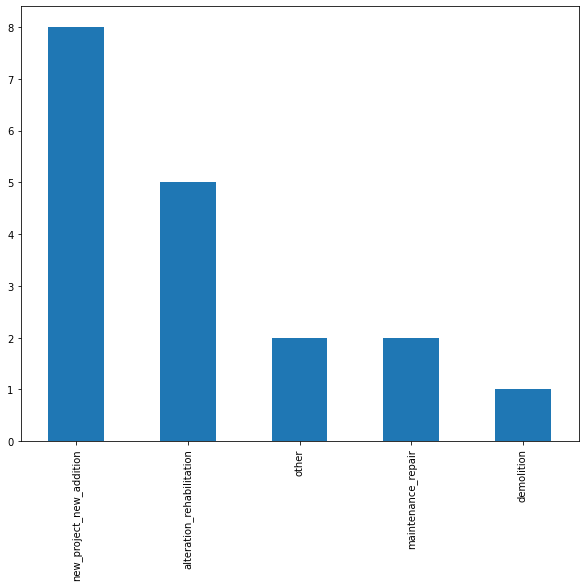

In [ ]:
print(burn_chemical["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_chemical["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     4
maintenance_repair           3
alteration_rehabilitation    1
demolition                   1
Name: project_type, dtype: int64


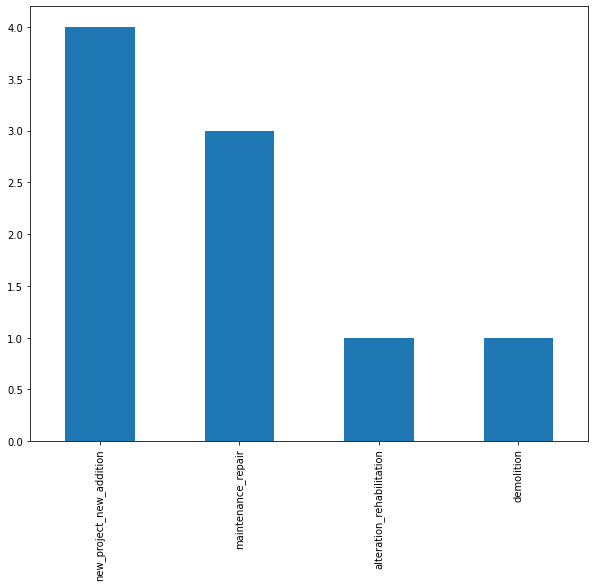

In [ ]:
print(foreign_body_ineye["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
foreign_body_ineye["project_type"].value_counts().plot(kind='bar')

maintenance_repair           3
new_project_new_addition     3
alteration_rehabilitation    2
Name: project_type, dtype: int64


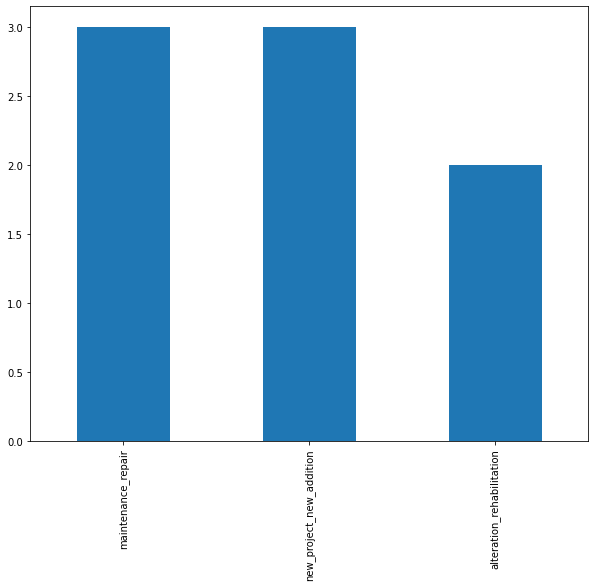

In [ ]:
print(poisoning_systemic["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
poisoning_systemic["project_type"].value_counts().plot(kind='bar')

new_project_new_addition     3
maintenance_repair           2
alteration_rehabilitation    1
other                        1
Name: project_type, dtype: int64


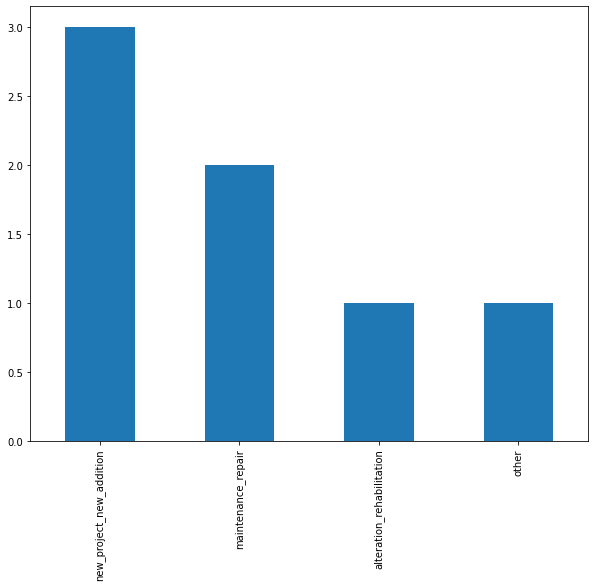

In [ ]:
print(freezing_frost_bite ["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
freezing_frost_bite ["project_type"].value_counts().plot(kind='bar')

new_project_new_addition    2
maintenance_repair          1
Name: project_type, dtype: int64


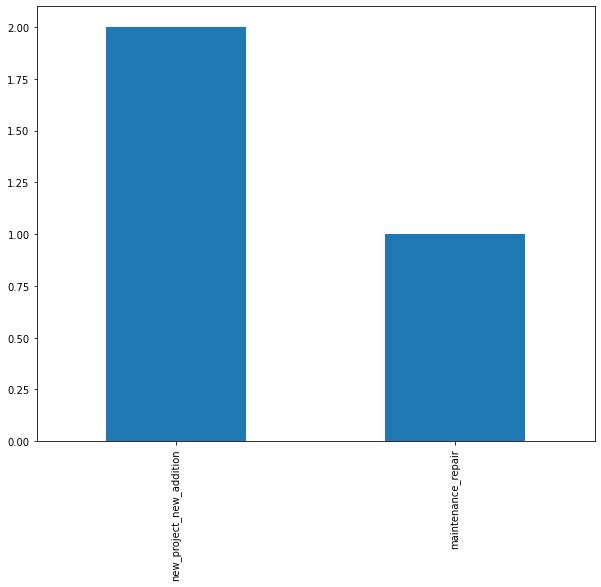

In [ ]:
print(hernia["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hernia["project_type"].value_counts().plot(kind='bar')

alteration_rehabilitation    2
Name: project_type, dtype: int64


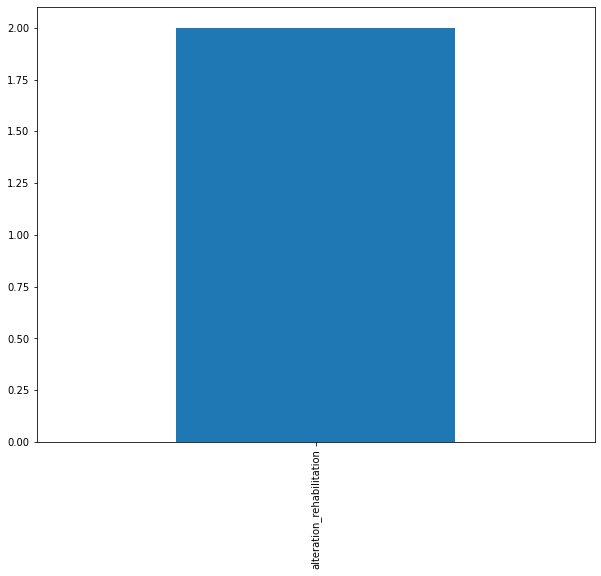

In [ ]:
print(cancer["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cancer["project_type"].value_counts().plot(kind='bar')

new_project_new_addition    1
Name: project_type, dtype: int64


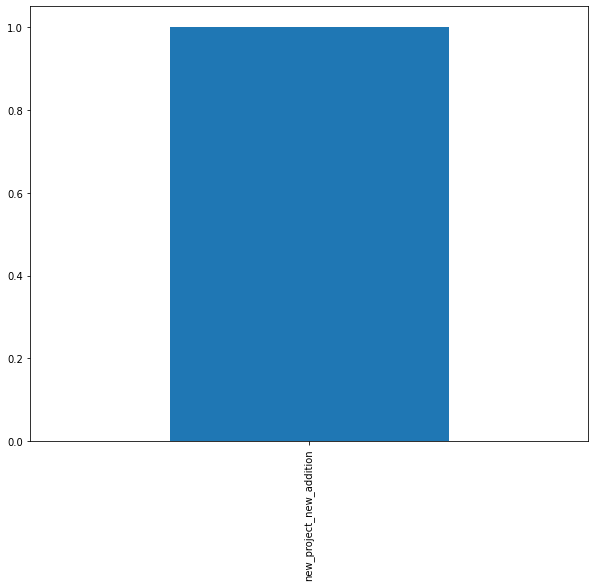

In [ ]:
print(hearing_loss["project_type"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hearing_loss["project_type"].value_counts().plot(kind='bar')

* Most and many cases occurs in  new project than in others

##Distribution of project_cost in each injury type

50000_250000    1
Name: project_cost, dtype: int64


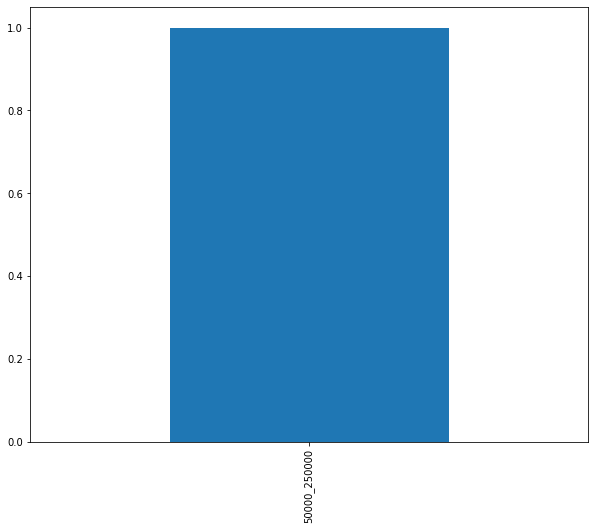

In [ ]:
print(hearing_loss["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hearing_loss["project_cost"].value_counts().plot(kind='bar')

under50000          593
50000_250000        360
1000000_5000000     301
500000_1000000      208
250000_500000       197
5000000_20000000    174
20000000andover     150
Name: project_cost, dtype: int64


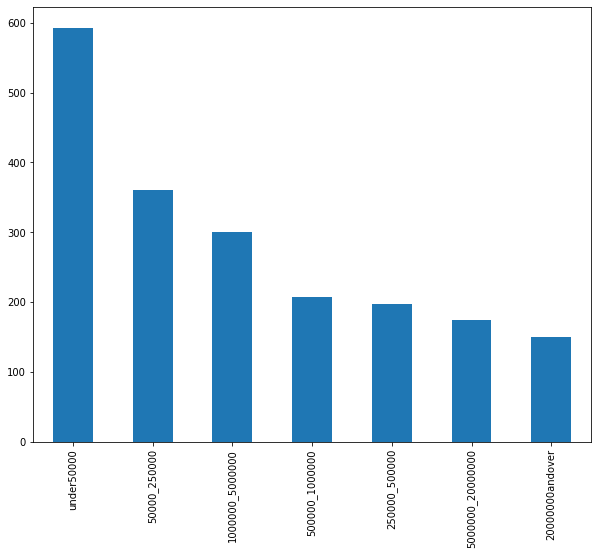

In [ ]:
print(fracture["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
fracture["project_cost"].value_counts().plot(kind='bar')

under50000          424
50000_250000        224
1000000_5000000     216
500000_1000000      147
250000_500000       126
5000000_20000000    125
20000000andover      91
Name: project_cost, dtype: int64


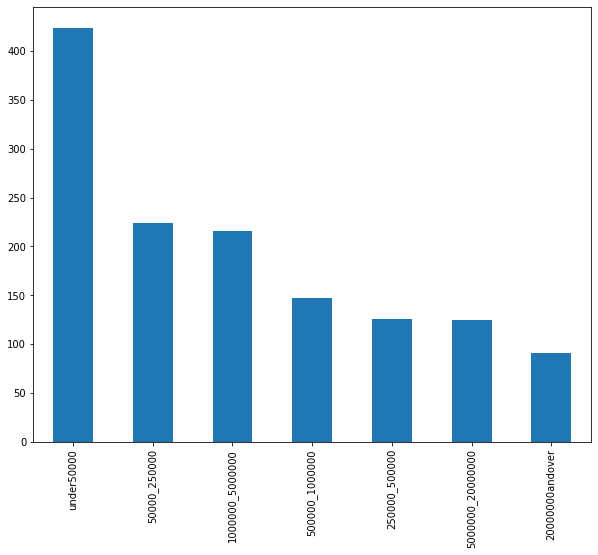

In [ ]:
print(other["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
other["project_cost"].value_counts().plot(kind='bar')

under50000          147
50000_250000         61
1000000_5000000      54
500000_1000000       35
250000_500000        33
5000000_20000000     29
20000000andover      29
Name: project_cost, dtype: int64


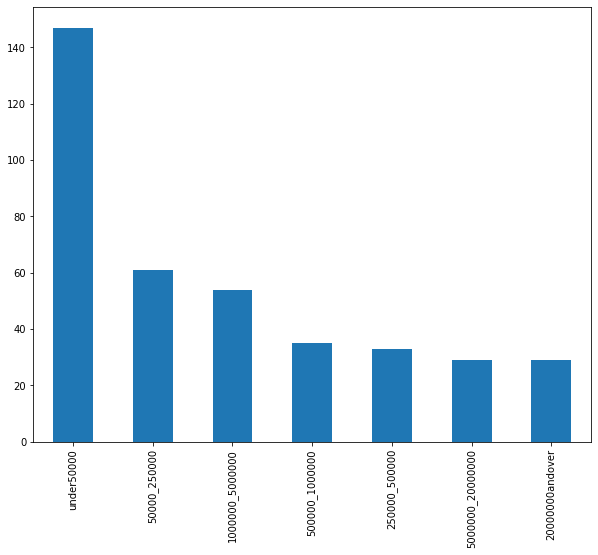

In [ ]:
print(amputation["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
amputation["project_cost"].value_counts().plot(kind='bar')

under50000          102
50000_250000         76
1000000_5000000      57
500000_1000000       41
250000_500000        39
20000000andover      33
5000000_20000000     32
Name: project_cost, dtype: int64


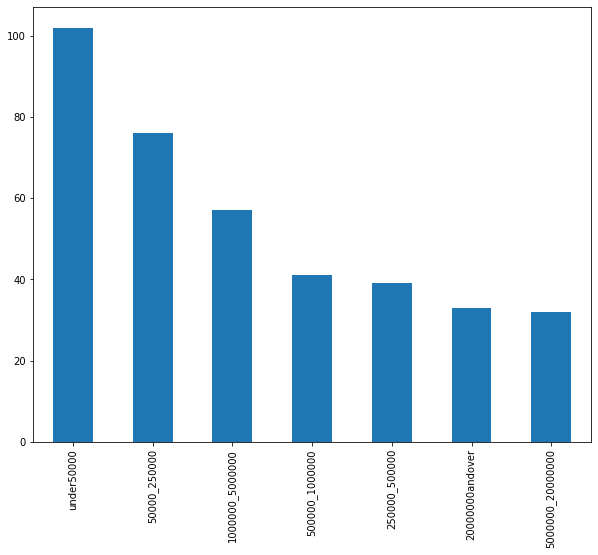

In [ ]:
print(concussion["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
concussion["project_cost"].value_counts().plot(kind='bar')

under50000          83
50000_250000        60
1000000_5000000     56
500000_1000000      40
250000_500000       39
5000000_20000000    38
20000000andover     26
Name: project_cost, dtype: int64


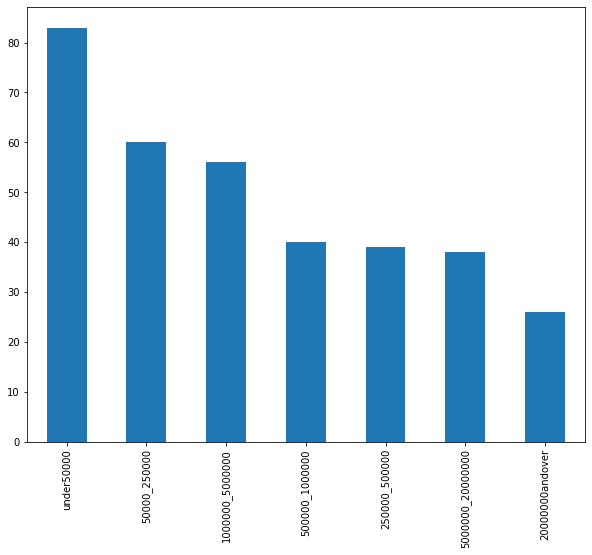

In [ ]:
print(bruise_contus_abras["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
bruise_contus_abras["project_cost"].value_counts().plot(kind='bar')

under50000          115
50000_250000         69
250000_500000        32
1000000_5000000      31
5000000_20000000     18
500000_1000000       18
20000000andover      14
Name: project_cost, dtype: int64


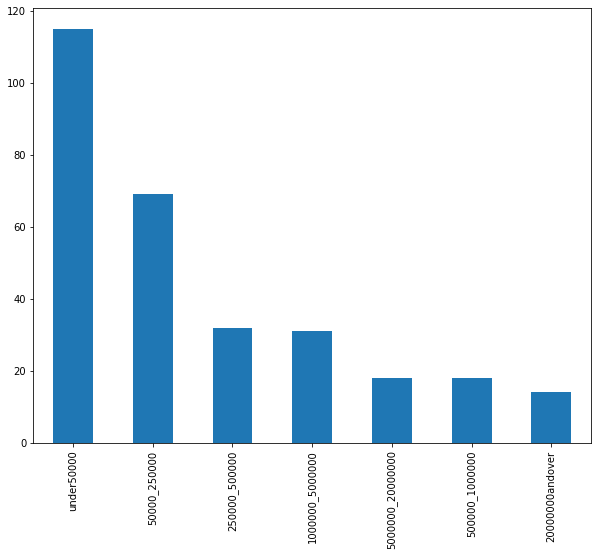

In [ ]:
print(cut_laceration["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cut_laceration["project_cost"].value_counts().plot(kind='bar')

under50000          117
50000_250000         62
250000_500000        25
1000000_5000000      24
500000_1000000       24
20000000andover      12
5000000_20000000      8
Name: project_cost, dtype: int64


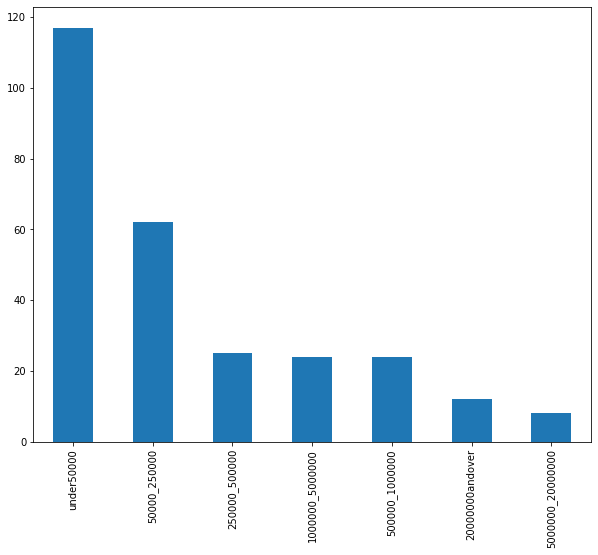

In [ ]:
print(electric_shock["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
electric_shock["project_cost"].value_counts().plot(kind='bar')

under50000          57
50000_250000        34
1000000_5000000     20
250000_500000       19
500000_1000000      18
5000000_20000000    10
20000000andover      6
Name: project_cost, dtype: int64


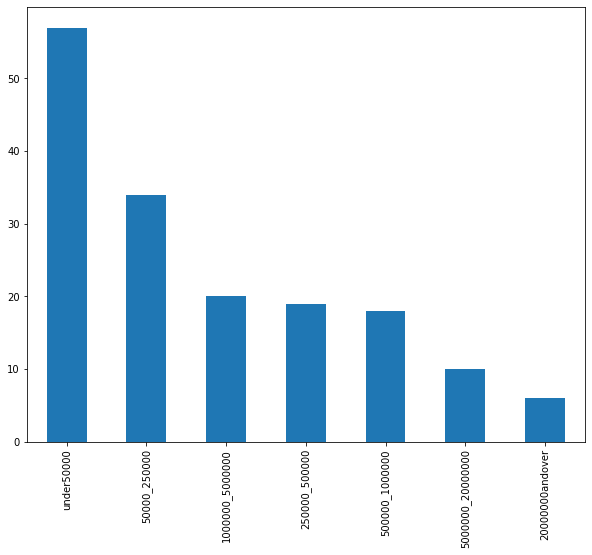

In [ ]:
print(asphyxia["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
asphyxia["project_cost"].value_counts().plot(kind='bar')

under50000          66
50000_250000        17
500000_1000000      15
1000000_5000000     13
250000_500000       11
20000000andover      9
5000000_20000000     5
Name: project_cost, dtype: int64


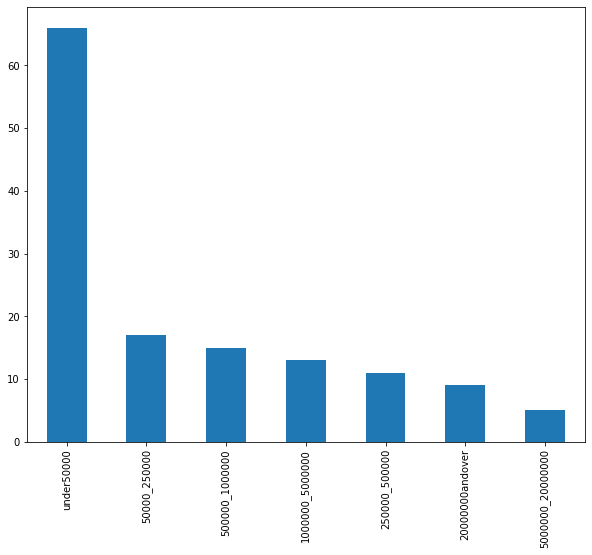

In [ ]:
print(burn_scald_heat["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_scald_heat["project_cost"].value_counts().plot(kind='bar')

under50000          36
50000_250000        23
1000000_5000000     20
5000000_20000000    10
250000_500000        9
500000_1000000       8
20000000andover      4
Name: project_cost, dtype: int64


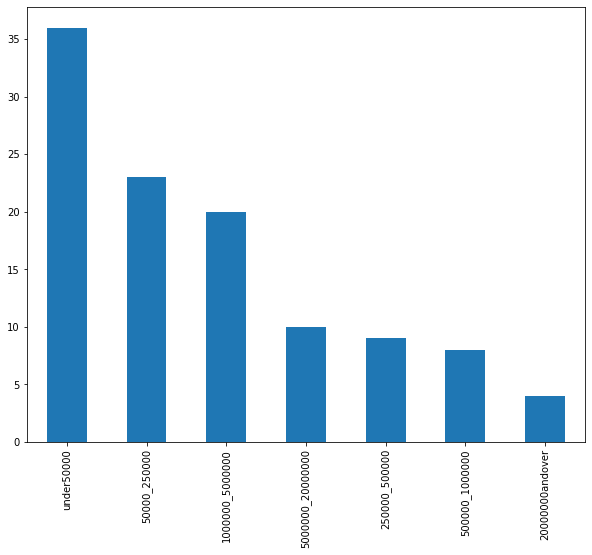

In [ ]:
print(puncture["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
puncture["project_cost"].value_counts().plot(kind='bar')

under50000          19
1000000_5000000      9
500000_1000000       7
50000_250000         6
5000000_20000000     6
20000000andover      5
250000_500000        5
Name: project_cost, dtype: int64


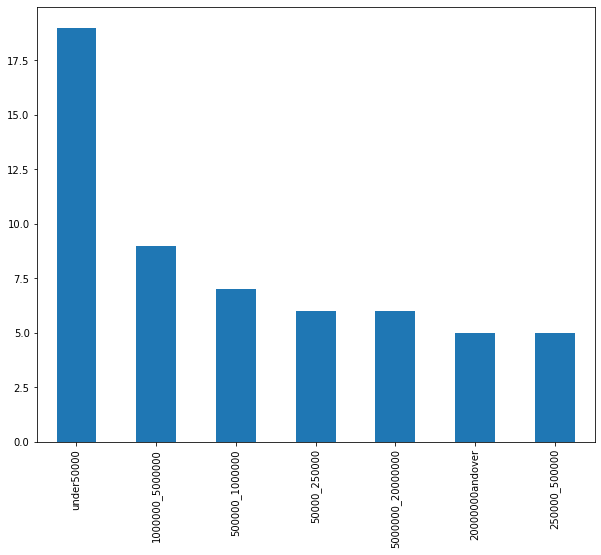

In [ ]:
print(heat_exhaustion["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
heat_exhaustion["project_cost"].value_counts().plot(kind='bar')

under50000          12
20000000andover      8
50000_250000         8
5000000_20000000     7
1000000_5000000      5
500000_1000000       3
250000_500000        3
Name: project_cost, dtype: int64


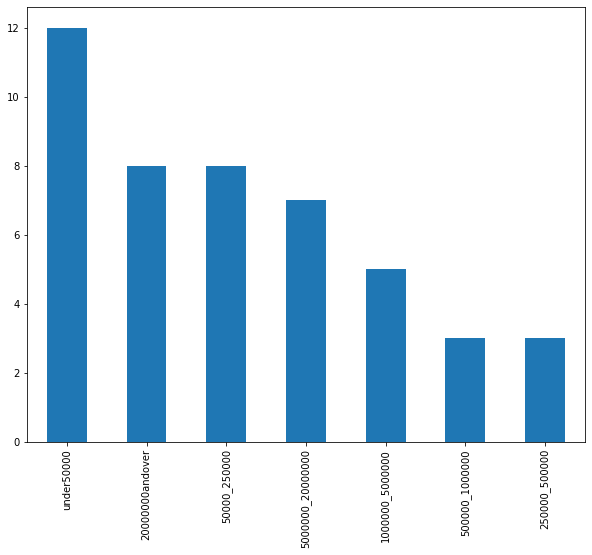

In [ ]:
print(strain_sprain["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
strain_sprain["project_cost"].value_counts().plot(kind='bar')

under50000          11
500000_1000000      10
50000_250000         7
250000_500000        6
20000000andover      2
1000000_5000000      2
5000000_20000000     1
Name: project_cost, dtype: int64


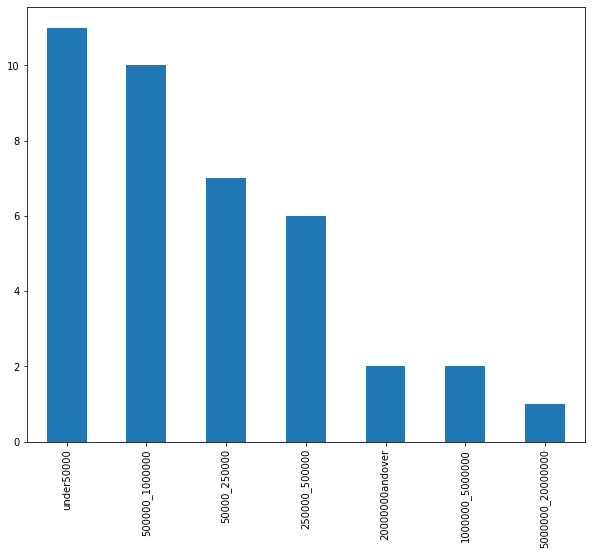

In [ ]:
print(dislocation["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
dislocation["project_cost"].value_counts().plot(kind='bar')

under50000          9
50000_250000        3
1000000_5000000     2
20000000andover     2
5000000_20000000    1
500000_1000000      1
Name: project_cost, dtype: int64


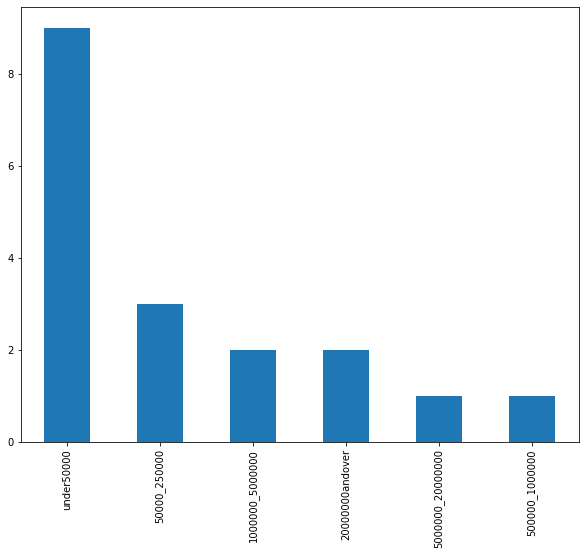

In [ ]:
print(burn_chemical["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_chemical["project_cost"].value_counts().plot(kind='bar')

under50000         4
1000000_5000000    2
500000_1000000     2
250000_500000      1
Name: project_cost, dtype: int64


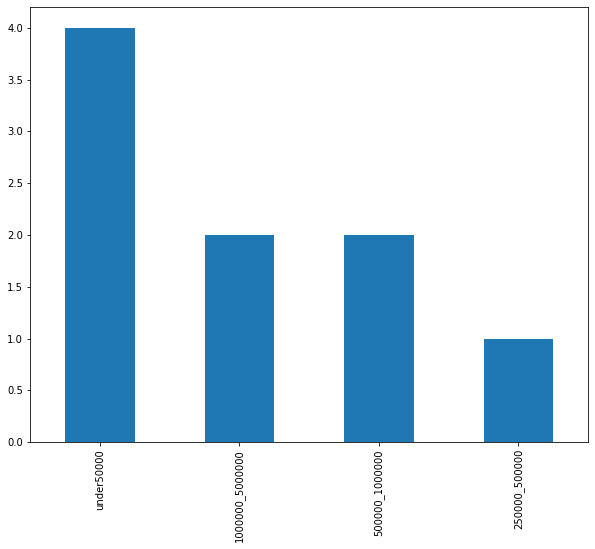

In [ ]:
print(foreign_body_ineye["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
foreign_body_ineye["project_cost"].value_counts().plot(kind='bar')

under50000         4
1000000_5000000    3
50000_250000       1
Name: project_cost, dtype: int64


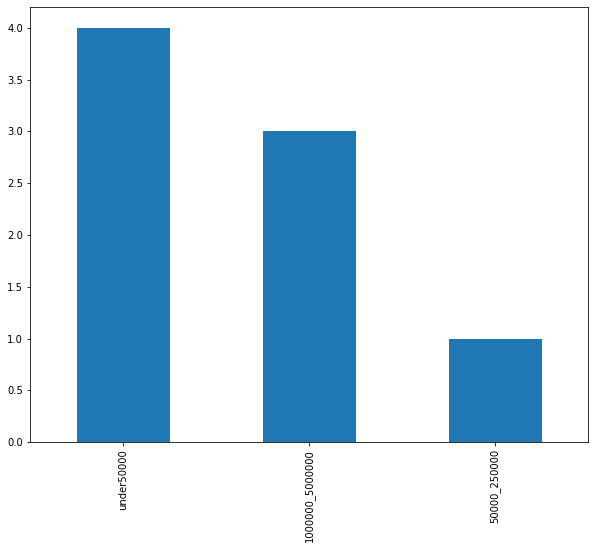

In [ ]:
print(poisoning_systemic ["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
poisoning_systemic ["project_cost"].value_counts().plot(kind='bar')

500000_1000000      3
50000_250000        2
5000000_20000000    1
under50000          1
Name: project_cost, dtype: int64


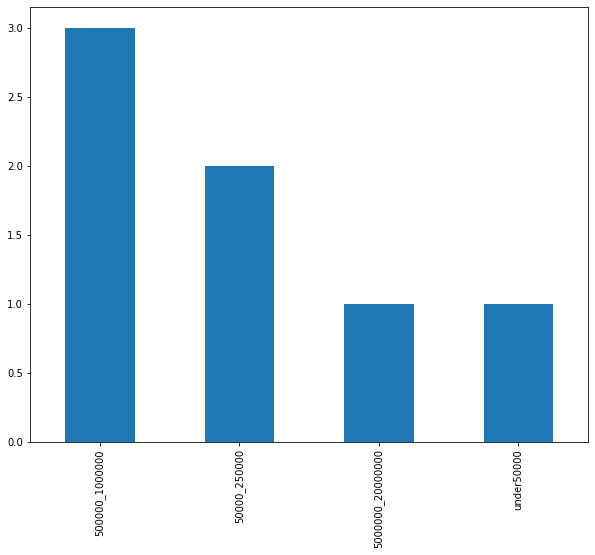

In [ ]:
print(freezing_frost_bite["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
freezing_frost_bite["project_cost"].value_counts().plot(kind='bar')

under50000        1
500000_1000000    1
50000_250000      1
Name: project_cost, dtype: int64


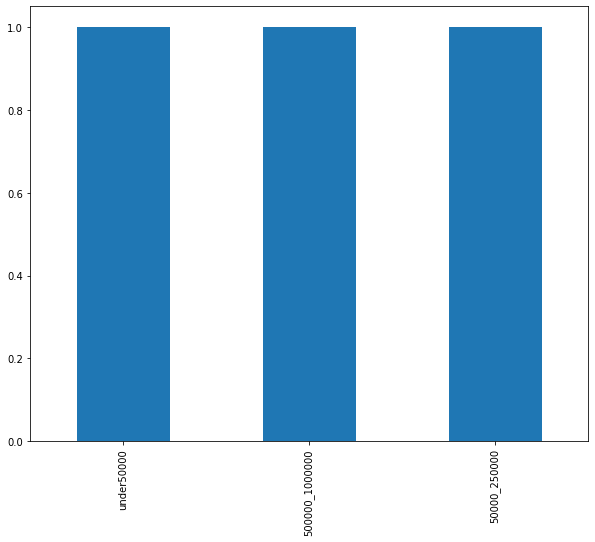

In [ ]:
print(hernia["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hernia["project_cost"].value_counts().plot(kind='bar')

5000000_20000000    1
50000_250000        1
Name: project_cost, dtype: int64


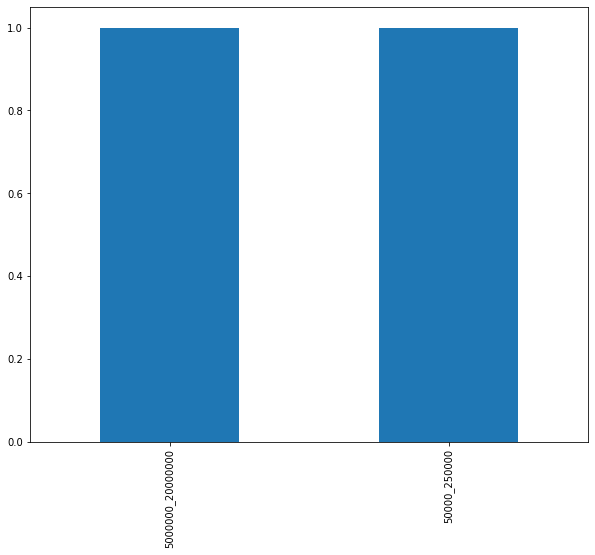

In [ ]:
print(cancer["project_cost"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cancer["project_cost"].value_counts().plot(kind='bar')

##Conclusion
* We can see that there is really a shortage of adequate safety measures in price less than 50000 may be it is the high price ofsafety equipments and low priced skilled labour

##Distribution of stories in each injury type

1.76545      567
2.00000      541
1.00000      535
3.00000      162
4.00000       55
5.00000       31
6.00000       23
10.00000      10
7.00000        9
8.00000        7
9.00000        5
12.00000       4
13.00000       3
20.00000       3
15.00000       2
30.00000       2
22.00000       2
19.00000       2
25.00000       2
18.00000       2
17.00000       2
21.00000       1
46.00000       1
24.00000       1
31.00000       1
100.00000      1
26.00000       1
48.00000       1
220.00000      1
40.00000       1
16.00000       1
45.00000       1
47.00000       1
38.00000       1
51.00000       1
Name: stories, dtype: int64


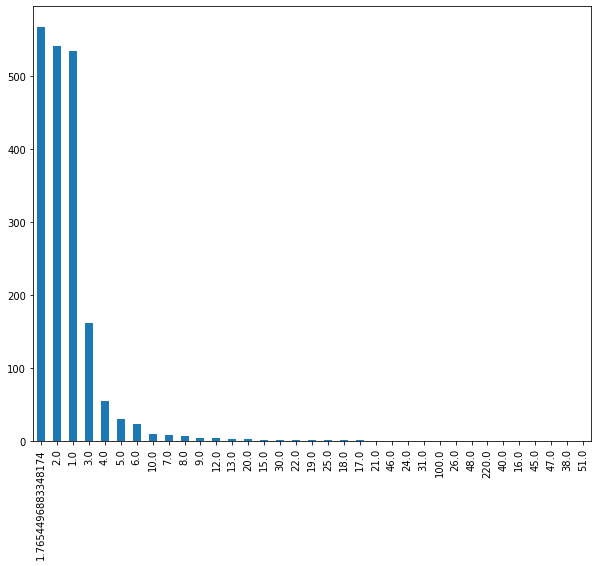

In [ ]:
print(fracture["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
fracture["stories"].value_counts().plot(kind='bar')

1.76545      673
1.00000      301
2.00000      226
3.00000       67
4.00000       22
5.00000       11
6.00000       10
7.00000        8
10.00000       4
8.00000        4
20.00000       3
14.00000       3
12.00000       3
22.00000       2
30.00000       2
32.00000       1
121.00000      1
13.00000       1
28.00000       1
61.00000       1
51.00000       1
17.00000       1
150.00000      1
100.00000      1
31.00000       1
9.00000        1
15.00000       1
40.00000       1
55.00000       1
Name: stories, dtype: int64


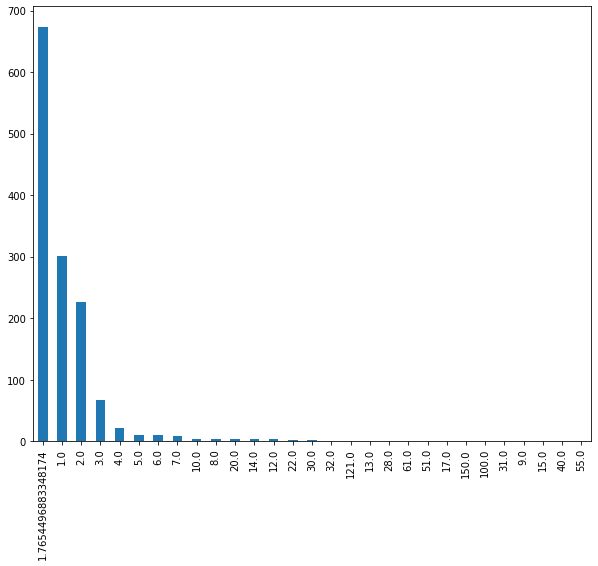

In [ ]:
print(other["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
other["stories"].value_counts().plot(kind='bar')

1.0    1
2.0    1
Name: stories, dtype: int64


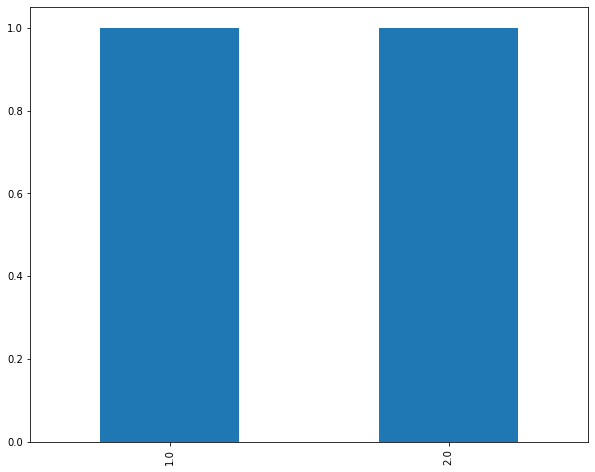

In [ ]:
print(cancer["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cancer["stories"].value_counts().plot(kind='bar')

1.76545     117
1.00000     110
2.00000     100
3.00000      16
4.00000       9
6.00000       7
5.00000       5
7.00000       2
25.00000      2
10.00000      2
20.00000      1
18.00000      1
13.00000      1
12.00000      1
46.00000      1
8.00000       1
11.00000      1
30.00000      1
44.00000      1
26.00000      1
Name: stories, dtype: int64


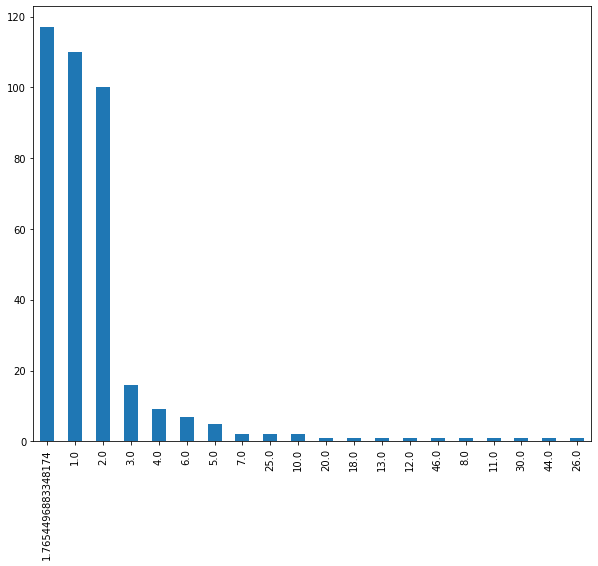

In [ ]:
print(concussion["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
concussion["stories"].value_counts().plot(kind='bar')

1.76545     155
1.00000     111
2.00000      78
3.00000      17
4.00000      11
5.00000       3
8.00000       3
15.00000      3
7.00000       1
14.00000      1
38.00000      1
10.00000      1
11.00000      1
60.00000      1
25.00000      1
Name: stories, dtype: int64


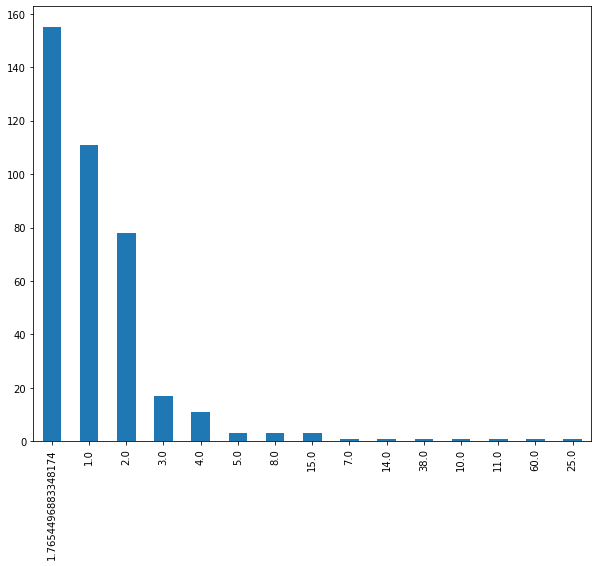

In [ ]:
print(amputation["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
amputation["stories"].value_counts().plot(kind='bar')

1.76545     156
1.00000      70
2.00000      62
3.00000      27
5.00000       7
4.00000       4
6.00000       4
8.00000       3
7.00000       2
13.00000      2
9.00000       2
26.00000      1
10.00000      1
33.00000      1
Name: stories, dtype: int64


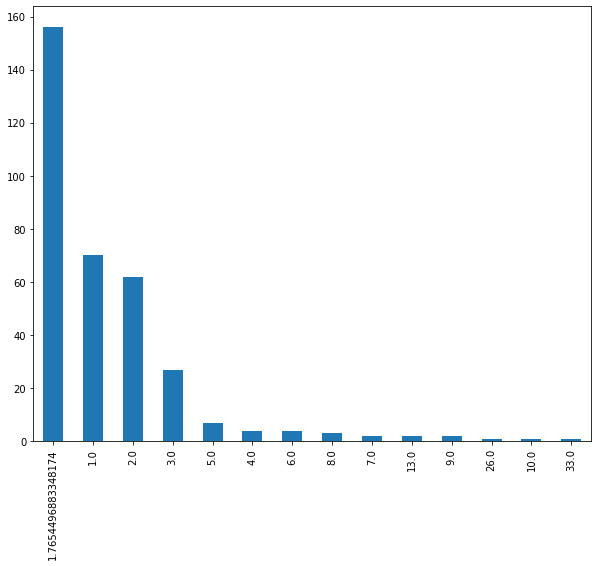

In [ ]:
print(bruise_contus_abras["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
bruise_contus_abras["stories"].value_counts().plot(kind='bar')

1.00000     104
1.76545      80
2.00000      72
3.00000      20
4.00000       9
6.00000       4
24.00000      2
5.00000       2
20.00000      1
7.00000       1
14.00000      1
8.00000       1
Name: stories, dtype: int64


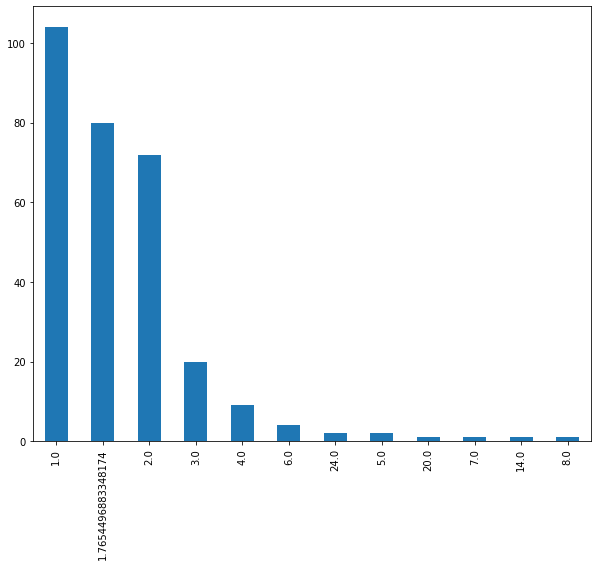

In [ ]:
print(cut_laceration["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cut_laceration["stories"].value_counts().plot(kind='bar')

1.76545     129
1.00000      73
2.00000      45
3.00000      13
4.00000       4
5.00000       2
6.00000       2
7.00000       1
20.00000      1
10.00000      1
8.00000       1
Name: stories, dtype: int64


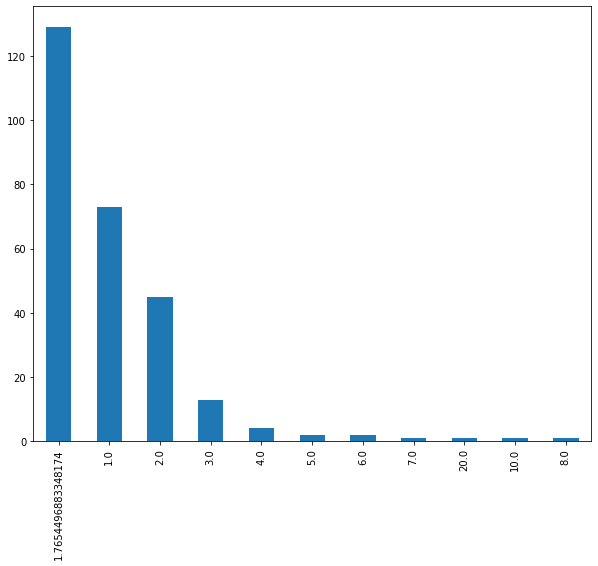

In [ ]:
print(electric_shock["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
electric_shock["stories"].value_counts().plot(kind='bar')

1.76545     106
1.00000      27
2.00000      20
3.00000       7
5.00000       1
14.00000      1
10.00000      1
8.00000       1
Name: stories, dtype: int64


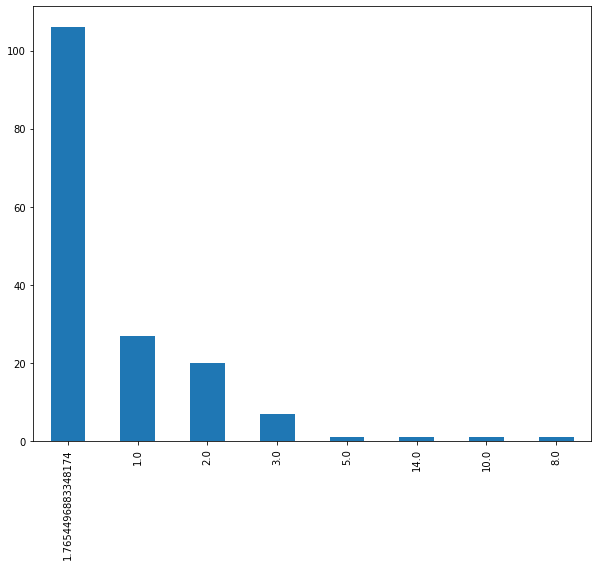

In [ ]:
print(asphyxia["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
asphyxia["stories"].value_counts().plot(kind='bar')

1.76545      67
1.00000      34
2.00000      18
3.00000       7
5.00000       2
6.00000       2
4.00000       2
11.00000      1
20.00000      1
14.00000      1
222.00000     1
Name: stories, dtype: int64


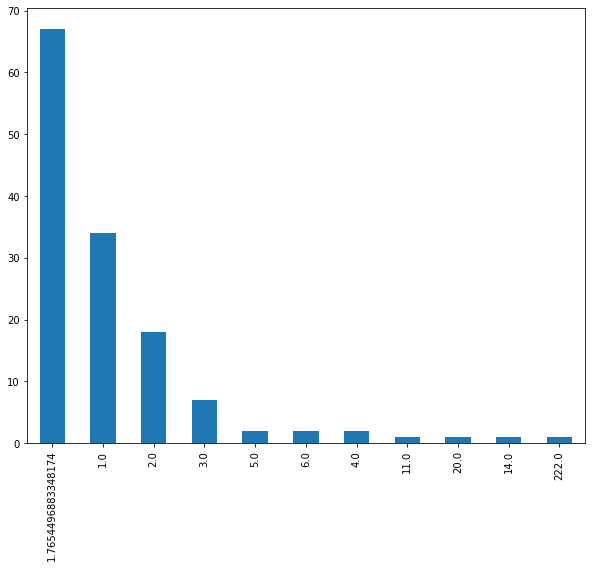

In [ ]:
print(burn_scald_heat["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_scald_heat["stories"].value_counts().plot(kind='bar')

2.00000     40
1.00000     33
1.76545     20
3.00000      9
4.00000      5
6.00000      1
24.00000     1
5.00000      1
Name: stories, dtype: int64


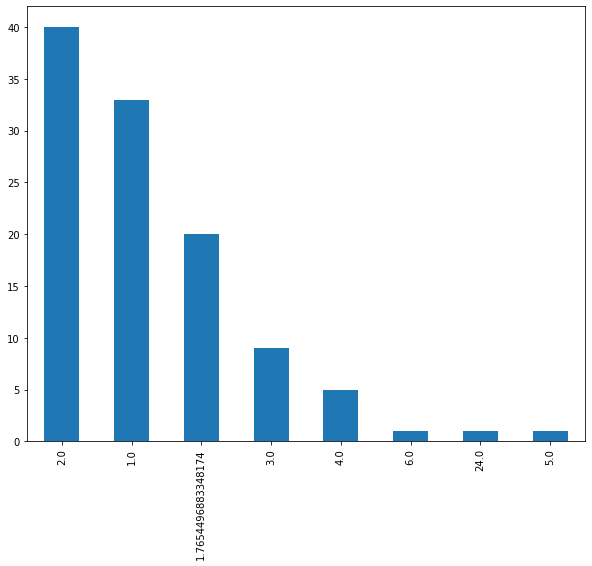

In [ ]:
print(puncture["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
puncture["stories"].value_counts().plot(kind='bar')

1.76545    26
1.00000    18
2.00000    10
4.00000     1
5.00000     1
3.00000     1
Name: stories, dtype: int64


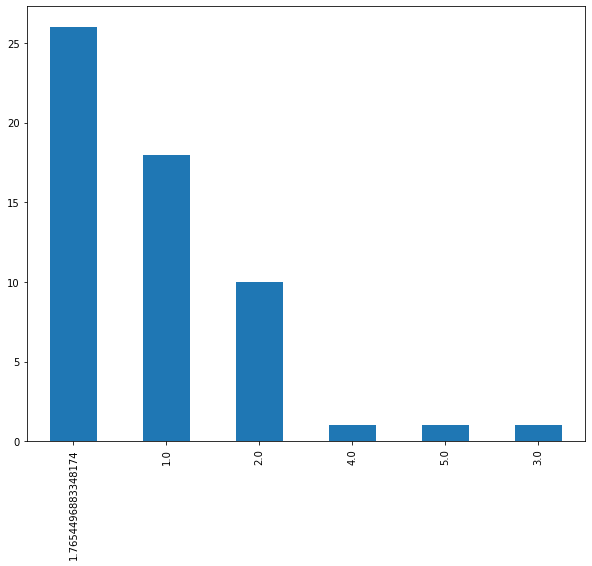

In [ ]:
print(heat_exhaustion["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
heat_exhaustion["stories"].value_counts().plot(kind='bar')

1.76545    17
2.00000    12
1.00000    10
3.00000     3
5.00000     2
8.00000     1
4.00000     1
Name: stories, dtype: int64


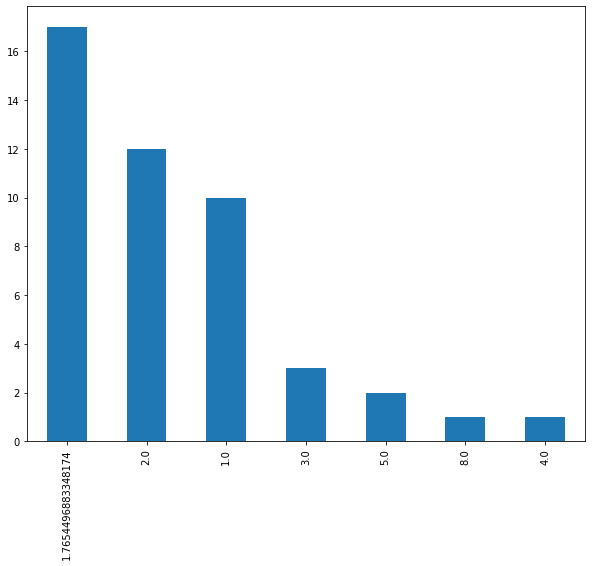

In [ ]:
print(strain_sprain["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
strain_sprain["stories"].value_counts().plot(kind='bar')

1.00000     13
2.00000     12
1.76545      9
3.00000      2
8.00000      1
4.00000      1
11.00000     1
Name: stories, dtype: int64


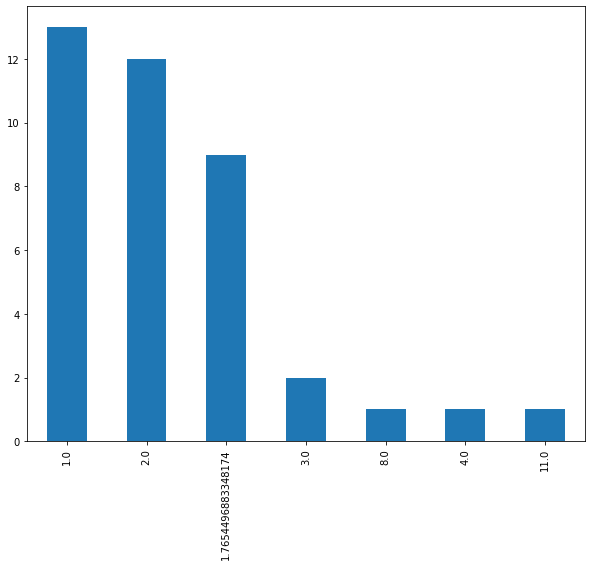

In [ ]:
print(dislocation["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
dislocation["stories"].value_counts().plot(kind='bar')

1.76545    10
1.00000     6
2.00000     1
5.00000     1
Name: stories, dtype: int64


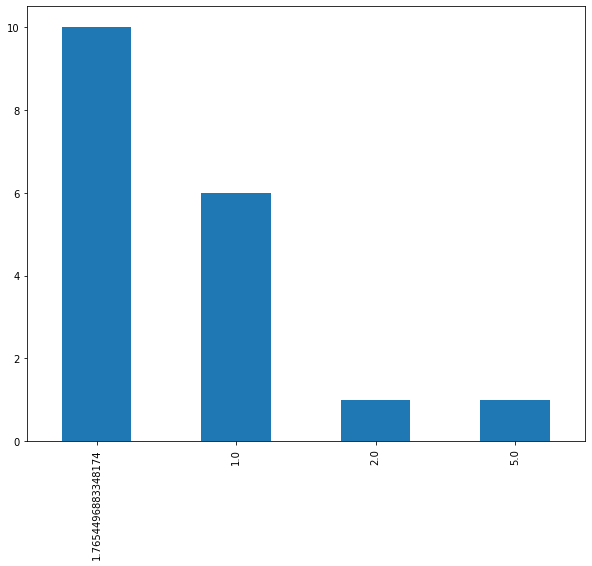

In [ ]:
print(burn_chemical["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_chemical["stories"].value_counts().plot(kind='bar')

1.00000    4
1.76545    2
2.00000    2
3.00000    1
Name: stories, dtype: int64


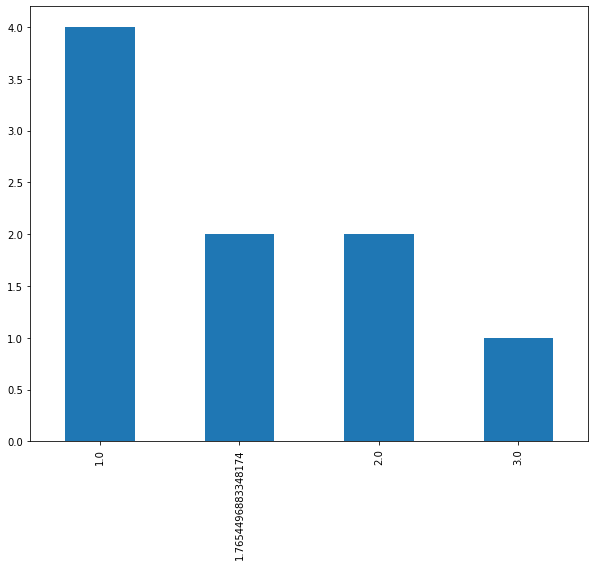

In [ ]:
print(foreign_body_ineye["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
foreign_body_ineye["stories"].value_counts().plot(kind='bar')

1.00000     3
2.00000     2
1.76545     1
10.00000    1
6.00000     1
Name: stories, dtype: int64


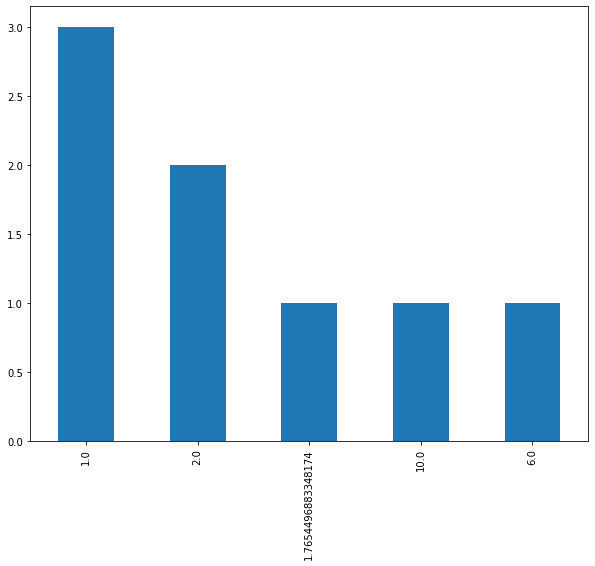

In [ ]:
print(poisoning_systemic["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
poisoning_systemic["stories"].value_counts().plot(kind='bar')

1.76545    4
1.00000    2
4.00000    1
Name: stories, dtype: int64


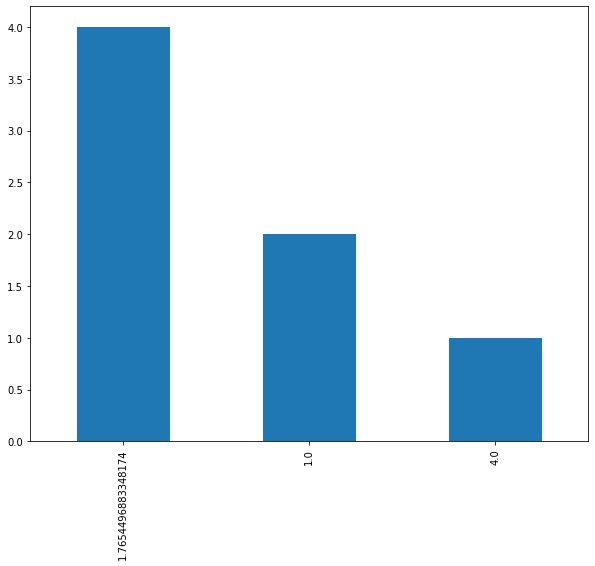

In [ ]:
print(freezing_frost_bite["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
freezing_frost_bite["stories"].value_counts().plot(kind='bar')

1.76545    2
1.00000    1
Name: stories, dtype: int64


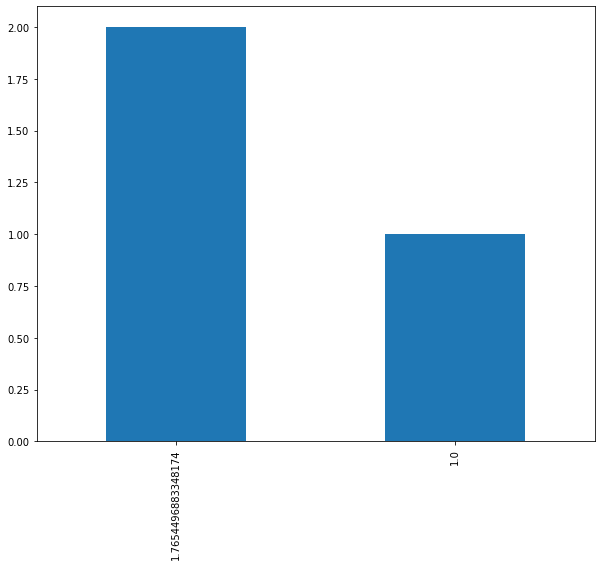

In [ ]:
print(hernia ["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hernia["stories"].value_counts().plot(kind='bar')

1.76545    1
Name: stories, dtype: int64


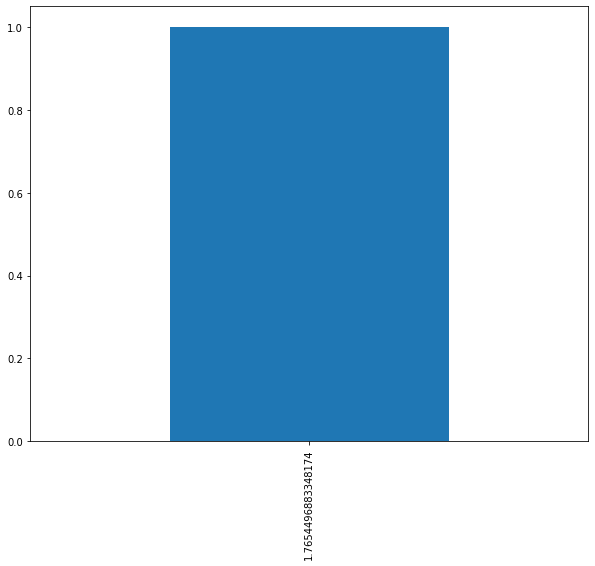

In [ ]:
print(hearing_loss["stories"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hearing_loss["stories"].value_counts().plot(kind='bar')

## Conclusion
* Most kind of accidents occurs in the 1st storie  1.76 is the impoted value of missing values

##Distribution of building_height in each injury type

0.0      970
20.0      96
10.0      60
30.0      57
12.0      52
        ... 
78.0       1
110.0      1
280.0      1
220.0      1
400.0      1
Name: building_height, Length: 89, dtype: int64


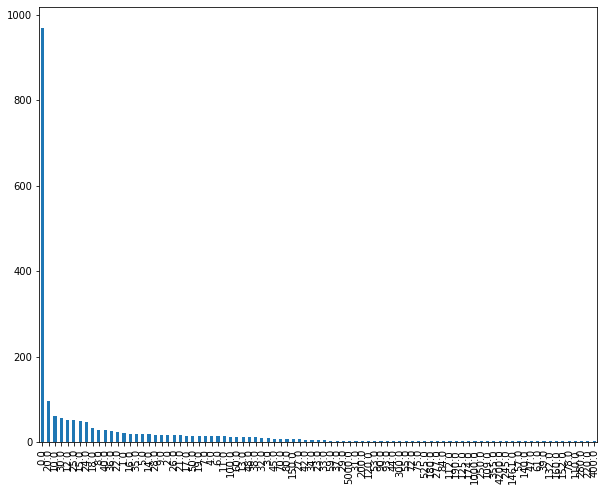

In [ ]:
print(fracture["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
fracture["building_height"].value_counts().plot(kind='bar')

0.0      824
30.0      54
20.0      51
25.0      27
40.0      27
        ... 
320.0      1
576.0      1
620.0      1
386.0      1
350.0      1
Name: building_height, Length: 87, dtype: int64


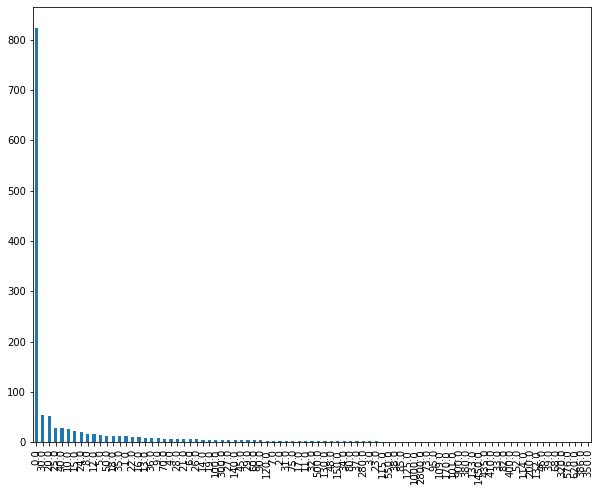

In [ ]:
print(other["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
other["building_height"].value_counts().plot(kind='bar')

0.0      246
20.0      14
12.0      13
15.0       9
24.0       8
10.0       8
36.0       8
25.0       8
1.0        6
30.0       6
40.0       6
2.0        5
18.0       4
3.0        4
60.0       4
8.0        4
48.0       3
4.0        3
50.0       3
22.0       2
35.0       2
28.0       2
5.0        2
100.0      2
150.0      1
37.0       1
200.0      1
45.0       1
90.0       1
29.0       1
11.0       1
70.0       1
32.0       1
26.0       1
140.0      1
9.0        1
46.0       1
7.0        1
47.0       1
80.0       1
Name: building_height, dtype: int64


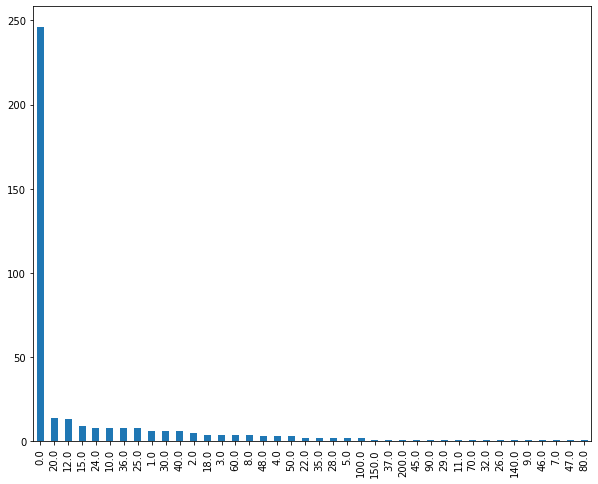

In [ ]:
print(amputation["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
amputation["building_height"].value_counts().plot(kind='bar')

0.0      246
20.0      14
12.0      13
15.0       9
24.0       8
10.0       8
36.0       8
25.0       8
1.0        6
30.0       6
40.0       6
2.0        5
18.0       4
3.0        4
60.0       4
8.0        4
48.0       3
4.0        3
50.0       3
22.0       2
35.0       2
28.0       2
5.0        2
100.0      2
150.0      1
37.0       1
200.0      1
45.0       1
90.0       1
29.0       1
11.0       1
70.0       1
32.0       1
26.0       1
140.0      1
9.0        1
46.0       1
7.0        1
47.0       1
80.0       1
Name: building_height, dtype: int64


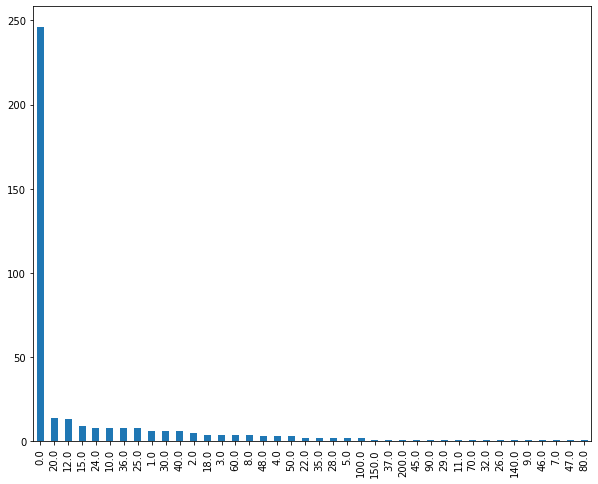

In [ ]:
print(amputation["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
amputation["building_height"].value_counts().plot(kind='bar')

0.0       168
10.0       22
20.0       18
30.0       17
15.0       12
25.0       12
12.0       12
40.0        7
50.0        7
11.0        7
35.0        7
8.0         6
24.0        6
21.0        5
14.0        5
13.0        5
16.0        5
18.0        5
36.0        4
26.0        4
80.0        3
200.0       3
9.0         3
60.0        3
22.0        3
32.0        2
27.0        2
120.0       2
23.0        2
70.0        2
19.0        2
17.0        2
28.0        2
1.0         2
4500.0      1
29.0        1
33.0        1
2.0         1
5.0         1
217.0       1
4.0         1
65.0        1
180.0       1
100.0       1
48.0        1
87.0        1
45.0        1
Name: building_height, dtype: int64


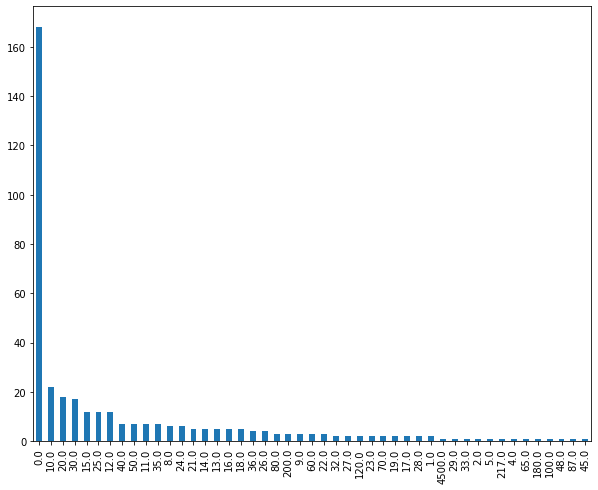

In [ ]:
print(concussion["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
concussion["building_height"].value_counts().plot(kind='bar')

0.0       185
20.0       22
30.0       15
12.0       10
15.0        9
10.0        7
25.0        6
18.0        6
16.0        6
1.0         5
6.0         5
40.0        4
35.0        4
7.0         3
8.0         3
24.0        3
2.0         3
17.0        3
60.0        3
14.0        2
34.0        2
44.0        2
5.0         2
9999.0      2
13.0        2
27.0        2
28.0        2
11.0        2
50.0        2
4224.0      1
85.0        1
9.0         1
33.0        1
22.0        1
36.0        1
4.0         1
65.0        1
37.0        1
5000.0      1
130.0       1
88.0        1
140.0       1
31.0        1
300.0       1
80.0        1
90.0        1
70.0        1
160.0       1
19.0        1
Name: building_height, dtype: int64


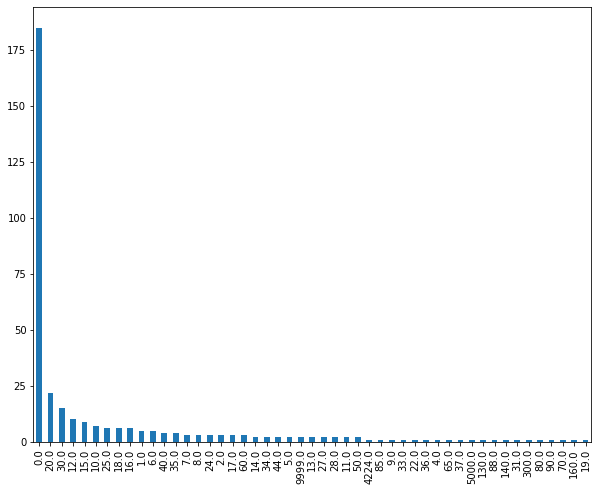

In [ ]:
print(bruise_contus_abras["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
bruise_contus_abras["building_height"].value_counts().plot(kind='bar')

0.0      159
20.0      19
10.0      10
15.0       9
30.0       9
12.0       9
24.0       8
8.0        7
18.0       5
5.0        5
25.0       4
1.0        4
7.0        4
50.0       3
36.0       3
9.0        3
80.0       2
17.0       2
2.0        2
45.0       2
26.0       2
60.0       2
35.0       2
4.0        2
48.0       2
75.0       2
28.0       2
100.0      2
13.0       1
157.0      1
14.0       1
65.0       1
40.0       1
150.0      1
31.0       1
220.0      1
200.0      1
22.0       1
6.0        1
3.0        1
Name: building_height, dtype: int64


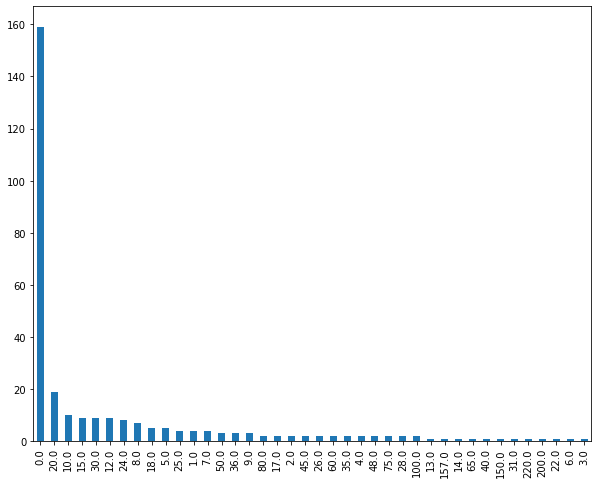

In [ ]:
print(cut_laceration["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cut_laceration["building_height"].value_counts().plot(kind='bar')

0.0       140
20.0       17
30.0       11
25.0        9
40.0        9
18.0        8
1.0         7
10.0        6
50.0        5
12.0        4
35.0        4
15.0        3
60.0        3
16.0        3
24.0        3
23.0        2
26.0        2
3.0         2
8.0         2
27.0        2
39.0        2
75.0        2
2.0         2
70.0        2
28.0        2
1584.0      1
42.0        1
29.0        1
32.0        1
120.0       1
14.0        1
22.0        1
45.0        1
48.0        1
150.0       1
96.0        1
300.0       1
100.0       1
36.0        1
5.0         1
102.0       1
80.0        1
210.0       1
31.0        1
6.0         1
Name: building_height, dtype: int64


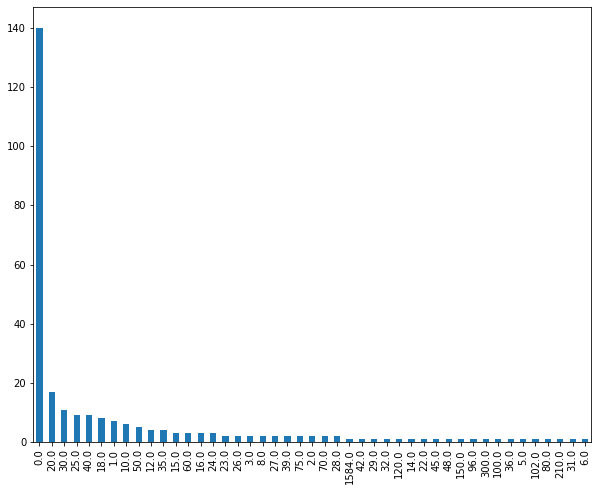

In [ ]:
print(electric_shock["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
electric_shock["building_height"].value_counts().plot(kind='bar')

0.0      120
30.0       5
20.0       4
18.0       3
8.0        3
12.0       3
25.0       3
100.0      2
10.0       2
6.0        2
37.0       1
40.0       1
22.0       1
50.0       1
16.0       1
45.0       1
3.0        1
15.0       1
31.0       1
2.0        1
7.0        1
35.0       1
1.0        1
5.0        1
14.0       1
13.0       1
36.0       1
Name: building_height, dtype: int64


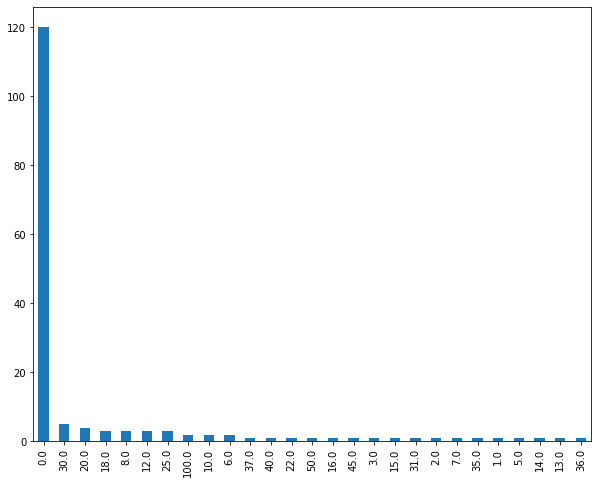

In [ ]:
print(asphyxia ["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
asphyxia ["building_height"].value_counts().plot(kind='bar')

0.0       89
20.0      11
10.0       3
60.0       3
30.0       3
6.0        2
36.0       2
5.0        2
50.0       2
24.0       2
15.0       2
48.0       1
974.0      1
26.0       1
70.0       1
45.0       1
2222.0     1
1.0        1
90.0       1
3.0        1
200.0      1
65.0       1
4.0        1
230.0      1
42.0       1
8.0        1
Name: building_height, dtype: int64


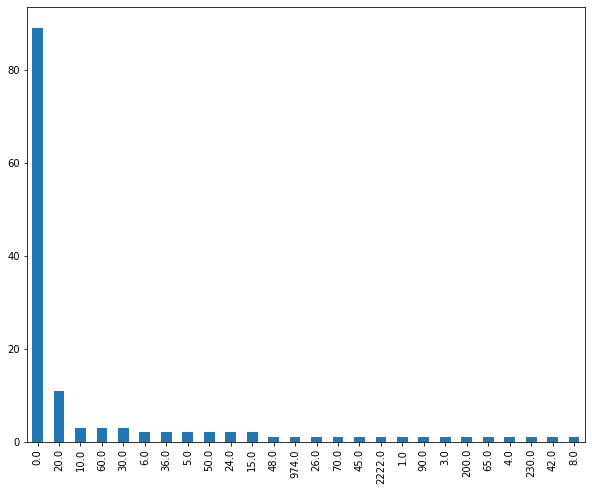

In [ ]:
print(burn_scald_heat["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_scald_heat["building_height"].value_counts().plot(kind='bar')

0.0       89
20.0      11
10.0       3
60.0       3
30.0       3
6.0        2
36.0       2
5.0        2
50.0       2
24.0       2
15.0       2
48.0       1
974.0      1
26.0       1
70.0       1
45.0       1
2222.0     1
1.0        1
90.0       1
3.0        1
200.0      1
65.0       1
4.0        1
230.0      1
42.0       1
8.0        1
Name: building_height, dtype: int64


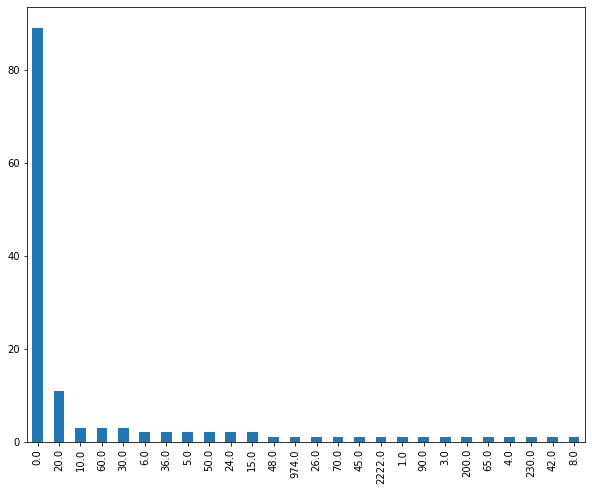

In [ ]:
print(burn_scald_heat["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_scald_heat["building_height"].value_counts().plot(kind='bar')

0.0       54
20.0       6
15.0       4
12.0       4
25.0       3
14.0       3
30.0       3
6.0        3
50.0       3
35.0       2
60.0       2
10.0       2
24.0       2
4.0        2
26.0       1
45.0       1
34.0       1
5.0        1
1.0        1
18.0       1
27.0       1
29.0       1
21.0       1
13.0       1
8.0        1
19.0       1
36.0       1
70.0       1
17.0       1
28.0       1
4000.0     1
Name: building_height, dtype: int64


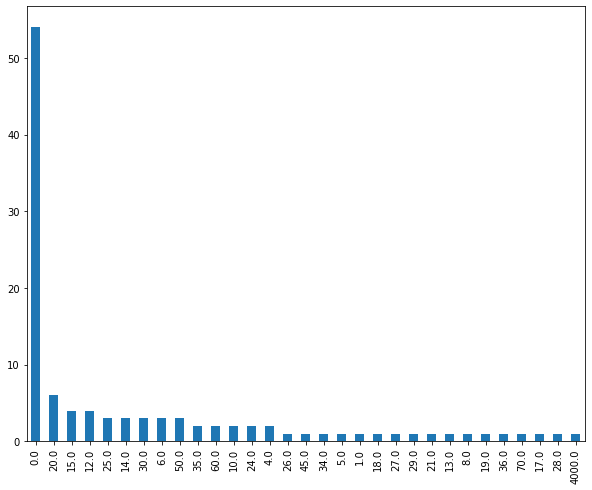

In [ ]:
print(puncture["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
puncture["building_height"].value_counts().plot(kind='bar')

0.0      15
20.0      4
40.0      3
30.0      3
8.0       2
32.0      2
25.0      2
10.0      2
70.0      1
80.0      1
48.0      1
15.0      1
27.0      1
33.0      1
2.0       1
16.0      1
34.0      1
24.0      1
300.0     1
4.0       1
14.0      1
Name: building_height, dtype: int64


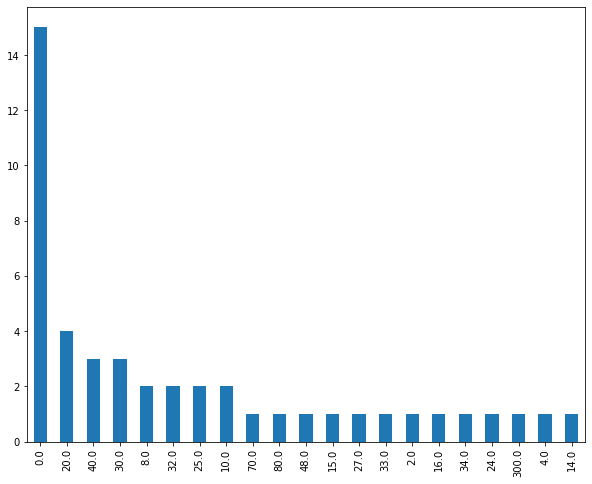

In [ ]:
print(strain_sprain["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
strain_sprain["building_height"].value_counts().plot(kind='bar')

0.0      13
20.0      3
1.0       2
40.0      2
18.0      2
21.0      1
3.0       1
26.0      1
10.0      1
24.0      1
30.0      1
6.0       1
15.0      1
45.0      1
11.0      1
41.0      1
22.0      1
5.0       1
50.0      1
8.0       1
100.0     1
37.0      1
Name: building_height, dtype: int64


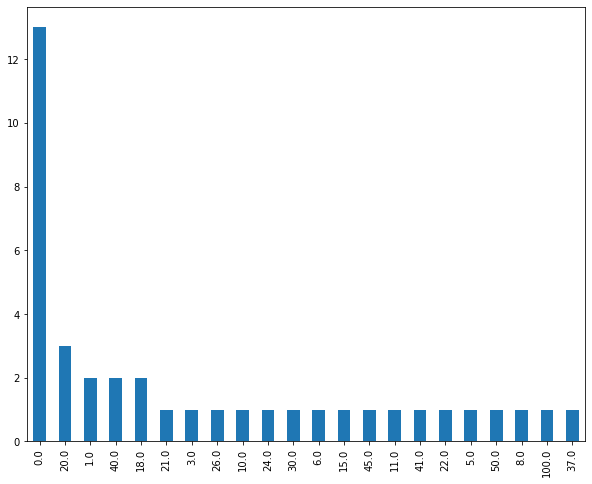

In [ ]:
print(dislocation ["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
dislocation ["building_height"].value_counts().plot(kind='bar')

0.0      12
1.0       2
60.0      1
100.0     1
15.0      1
20.0      1
Name: building_height, dtype: int64


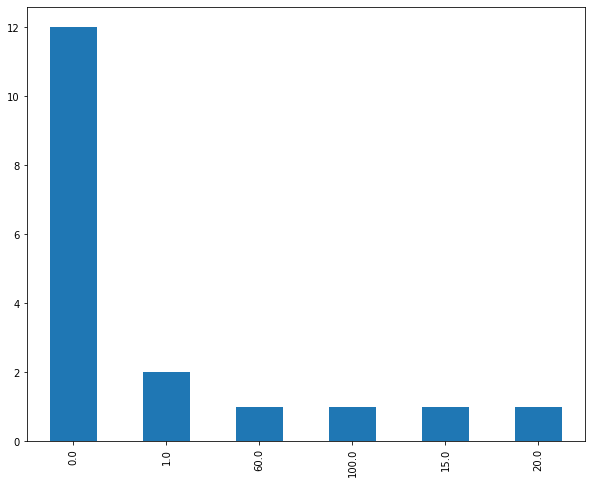

In [ ]:
print(burn_chemical["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_chemical["building_height"].value_counts().plot(kind='bar')

0.0     5
20.0    1
24.0    1
15.0    1
10.0    1
Name: building_height, dtype: int64


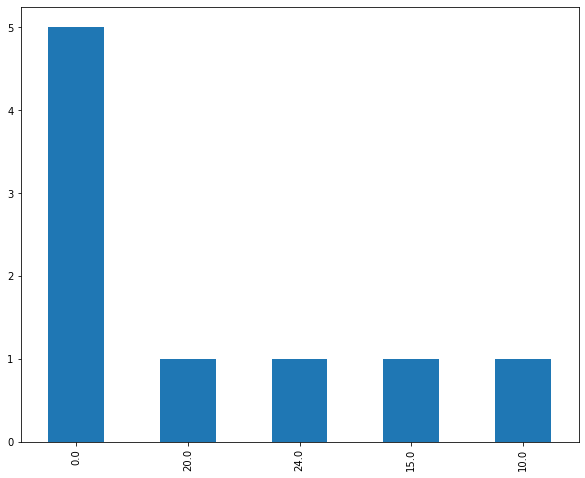

In [ ]:
print(foreign_body_ineye["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
foreign_body_ineye["building_height"].value_counts().plot(kind='bar')

0.0      3
180.0    1
12.0     1
15.0     1
20.0     1
40.0     1
Name: building_height, dtype: int64


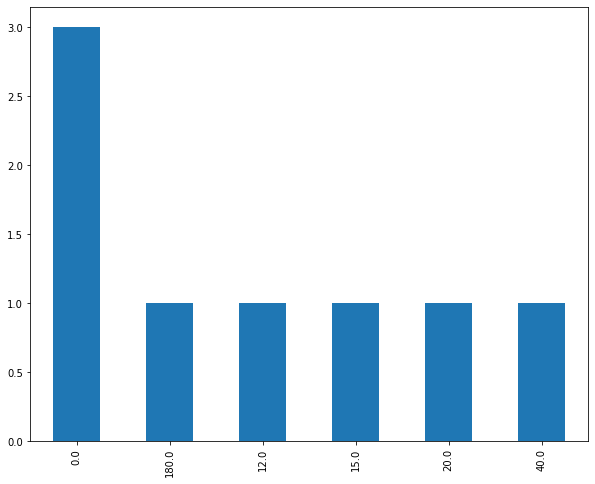

In [ ]:
print(poisoning_systemic["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
poisoning_systemic["building_height"].value_counts().plot(kind='bar')

0.0     4
17.0    1
9.0     1
12.0    1
Name: building_height, dtype: int64


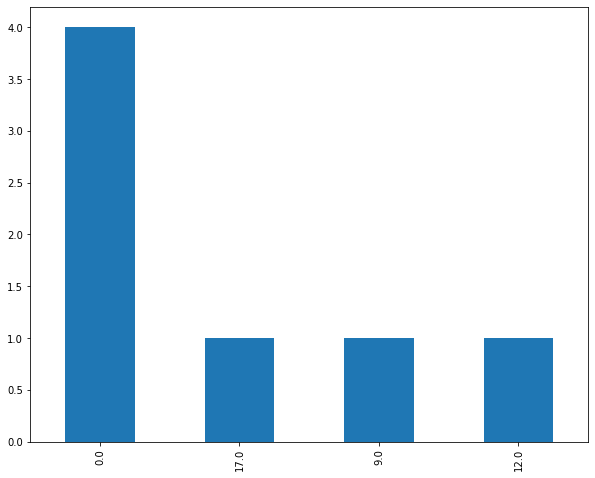

In [ ]:
print(freezing_frost_bite ["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
freezing_frost_bite ["building_height"].value_counts().plot(kind='bar')

30.0    1
20.0    1
Name: building_height, dtype: int64


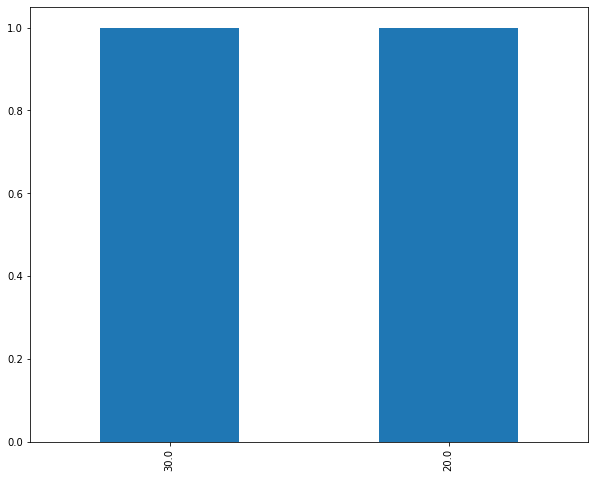

In [ ]:
print(cancer["building_height"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cancer["building_height"].value_counts().plot(kind='bar')

# Conclusion

* There are many missing points in building_heights since '0' is an imputed value
* Many kinds of the accidents are concentrated on few building_heights

##Distribution of severity in each injury type

hospitalized_injury        1555
fatality                    369
non_hospitalized_injury      59
Name: severity, dtype: int64


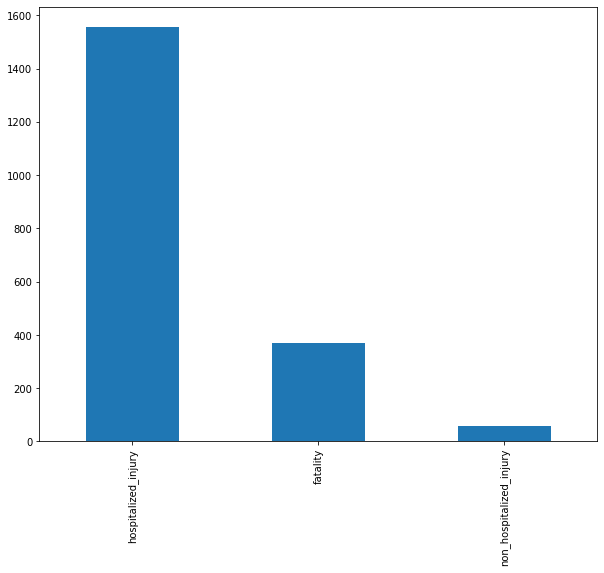

In [ ]:
print(fracture["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
fracture["severity"].value_counts().plot(kind='bar')

* Fracture is mainly a hospitalized injury

fatality                   1124
hospitalized_injury         201
non_hospitalized_injury      28
Name: severity, dtype: int64


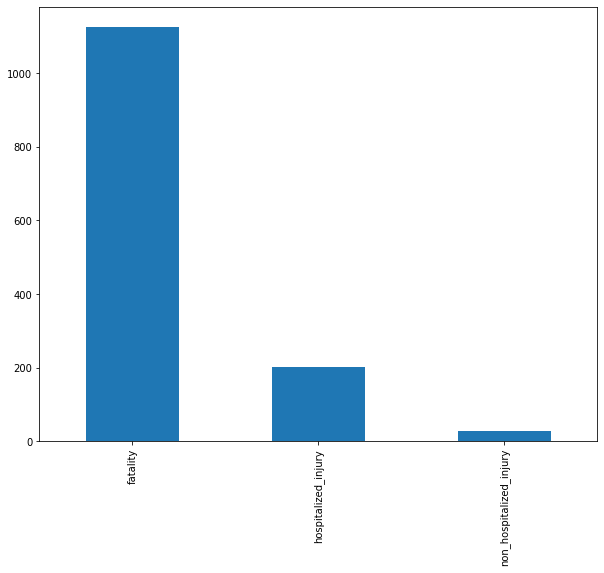

In [ ]:
print(other["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
other["severity"].value_counts().plot(kind='bar')

hospitalized_injury        259
non_hospitalized_injury    104
fatality                    25
Name: severity, dtype: int64


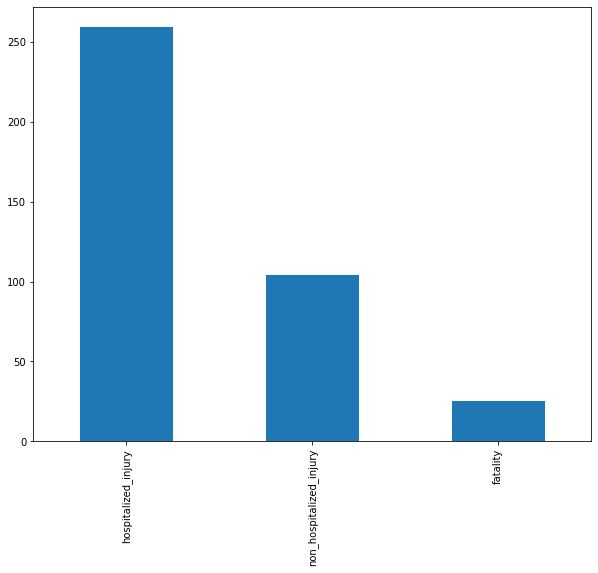

In [ ]:
print(amputation["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
amputation["severity"].value_counts().plot(kind='bar')

* amputation is mostly a hospitilized injury

fatality                   255
hospitalized_injury        118
non_hospitalized_injury      7
Name: severity, dtype: int64


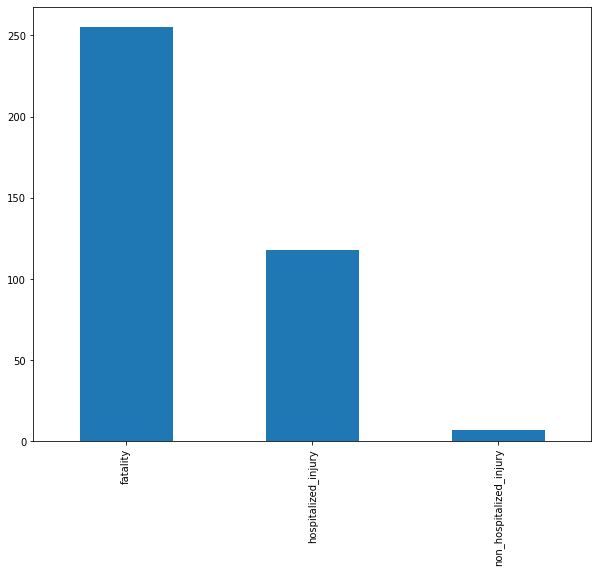

In [ ]:
print(concussion["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
concussion["severity"].value_counts().plot(kind='bar')

* Concussion is highly fatal

fatality                   146
hospitalized_injury        113
non_hospitalized_injury     83
Name: severity, dtype: int64


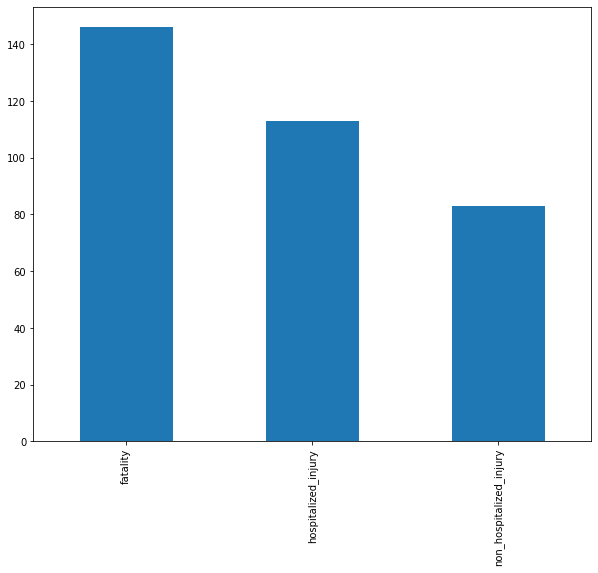

In [ ]:
print(bruise_contus_abras["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
bruise_contus_abras["severity"].value_counts().plot(kind='bar')

* Bruises and Abrases are highly fatal (happens in highway construction)

hospitalized_injury        202
non_hospitalized_injury     56
fatality                    39
Name: severity, dtype: int64


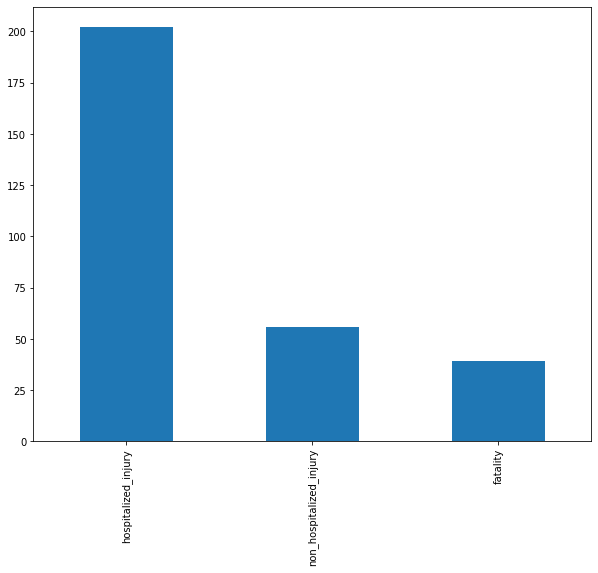

In [ ]:
print(cut_laceration["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cut_laceration["severity"].value_counts().plot(kind='bar')

* Cuts are mostly hospitalized

fatality                   214
hospitalized_injury         52
non_hospitalized_injury      6
Name: severity, dtype: int64


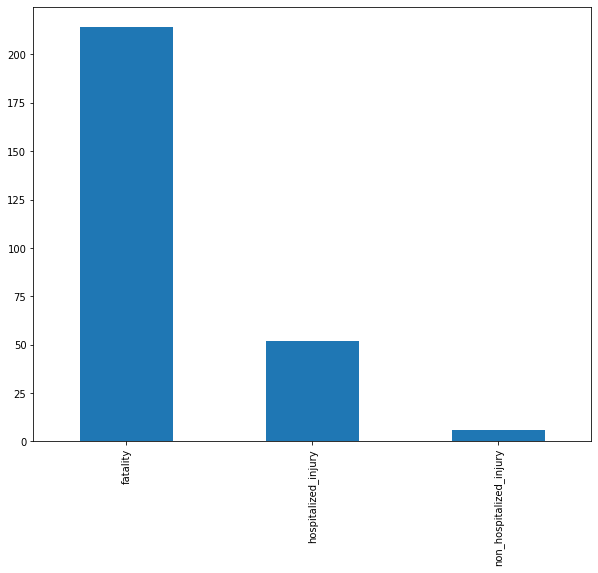

In [ ]:
print(electric_shock["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
electric_shock["severity"].value_counts().plot(kind='bar')

* Electric shock is highly fatal

fatality               161
hospitalized_injury      3
Name: severity, dtype: int64


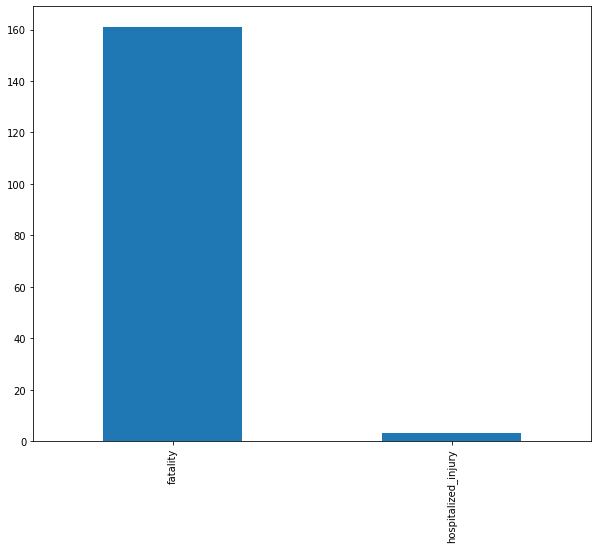

In [ ]:
print(asphyxia["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
asphyxia["severity"].value_counts().plot(kind='bar')

* Asphyxia is highly fatal

hospitalized_injury        99
fatality                   24
non_hospitalized_injury    13
Name: severity, dtype: int64


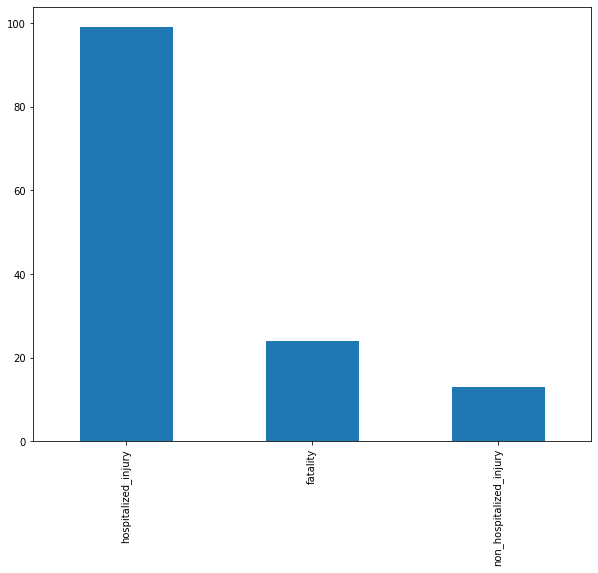

In [ ]:
print(burn_scald_heat["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_scald_heat["severity"].value_counts().plot(kind='bar')

* Burn is hospitalised

hospitalized_injury        78
fatality                   21
non_hospitalized_injury    11
Name: severity, dtype: int64


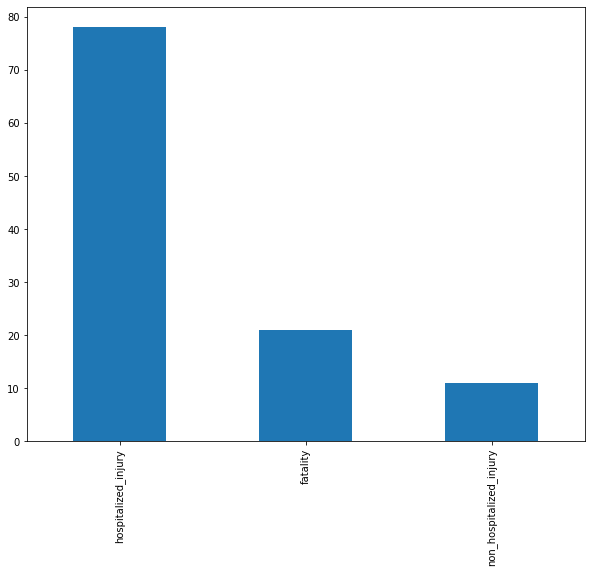

In [ ]:
print(puncture["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
puncture["severity"].value_counts().plot(kind='bar')

* hospitalised

fatality                   26
hospitalized_injury        24
non_hospitalized_injury     7
Name: severity, dtype: int64


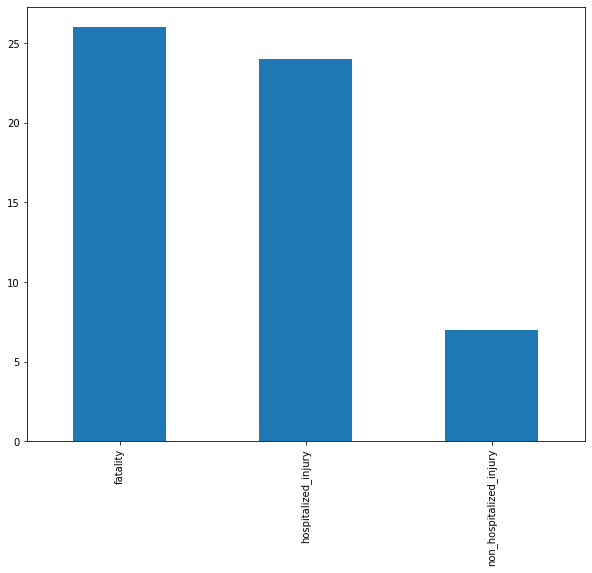

In [ ]:
print(heat_exhaustion["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
heat_exhaustion["severity"].value_counts().plot(kind='bar')

* both hospitalised and fatal

hospitalized_injury        31
non_hospitalized_injury    13
fatality                    2
Name: severity, dtype: int64


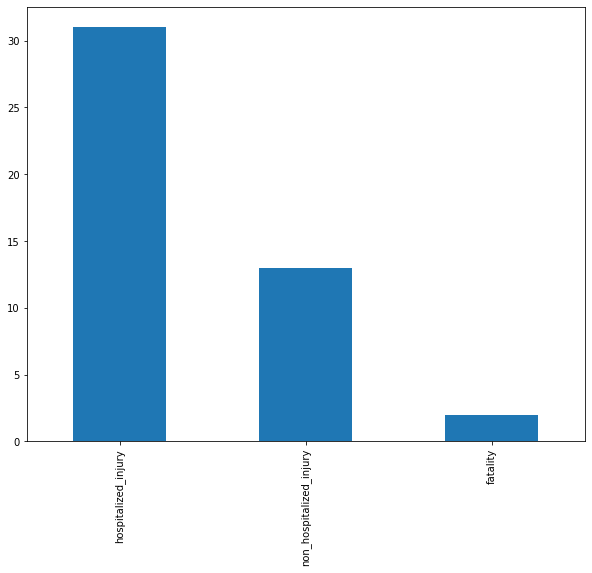

In [ ]:
print(strain_sprain["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
strain_sprain["severity"].value_counts().plot(kind='bar')

* strain and sprain are hospitilisable

hospitalized_injury        30
fatality                    5
non_hospitalized_injury     4
Name: severity, dtype: int64


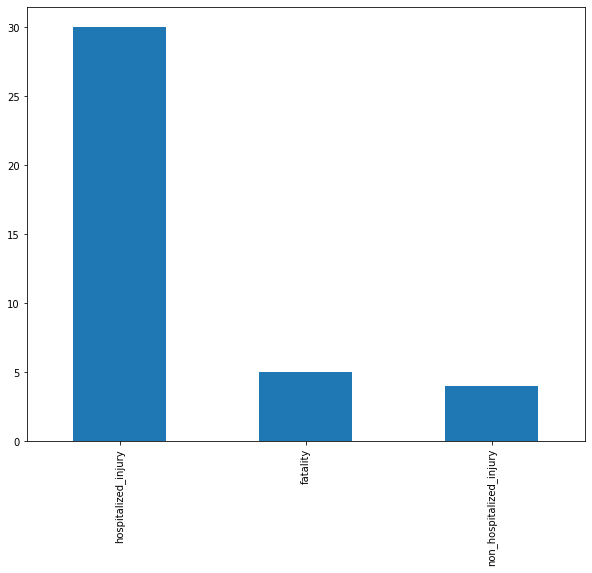

In [ ]:
print(dislocation["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
dislocation["severity"].value_counts().plot(kind='bar')

hospitalized_injury        12
fatality                    4
non_hospitalized_injury     2
Name: severity, dtype: int64


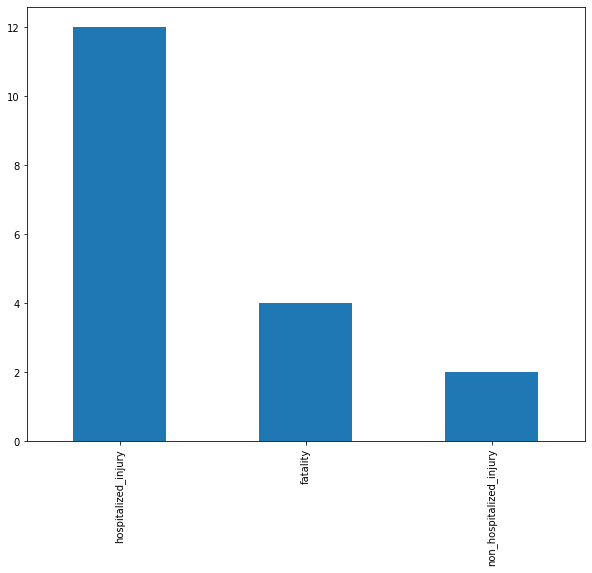

In [ ]:
print(burn_chemical["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
burn_chemical["severity"].value_counts().plot(kind='bar')

hospitalized_injury        6
fatality                   2
non_hospitalized_injury    1
Name: severity, dtype: int64


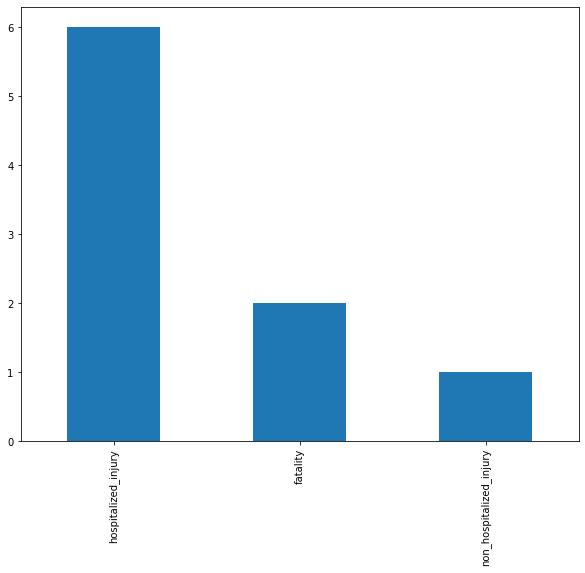

In [ ]:
print(foreign_body_ineye["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
foreign_body_ineye["severity"].value_counts().plot(kind='bar')

hospitalized_injury        5
fatality                   2
non_hospitalized_injury    1
Name: severity, dtype: int64


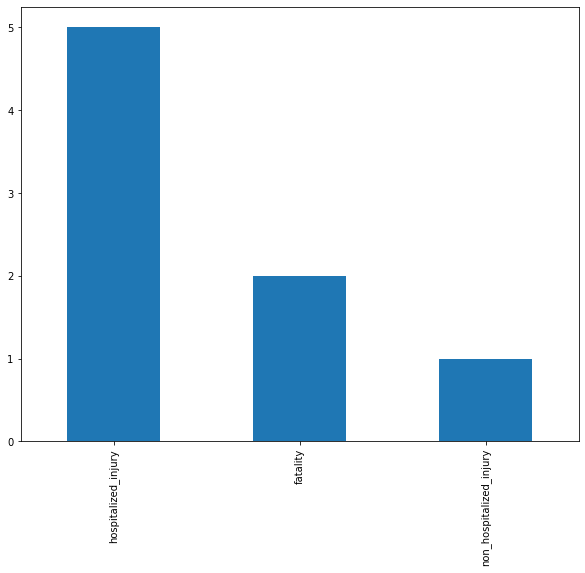

In [ ]:
print(poisoning_systemic["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
poisoning_systemic["severity"].value_counts().plot(kind='bar')

hospitalized_injury    4
fatality               3
Name: severity, dtype: int64


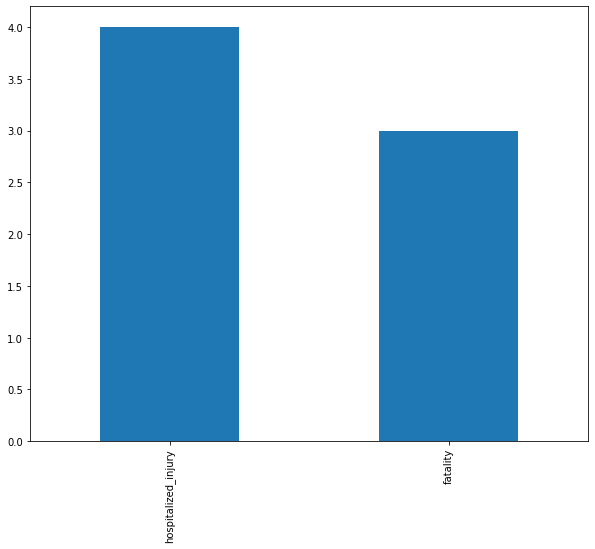

In [ ]:
print(freezing_frost_bite["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
freezing_frost_bite["severity"].value_counts().plot(kind='bar')

hospitalized_injury    3
Name: severity, dtype: int64


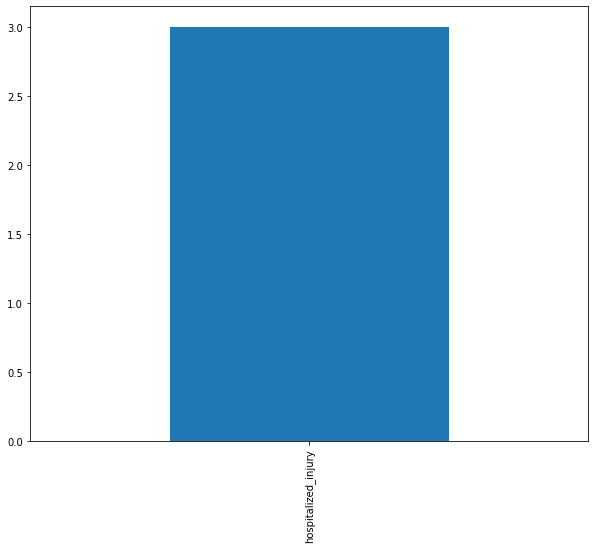

In [ ]:
print(hernia["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hernia["severity"].value_counts().plot(kind='bar')

fatality               1
hospitalized_injury    1
Name: severity, dtype: int64


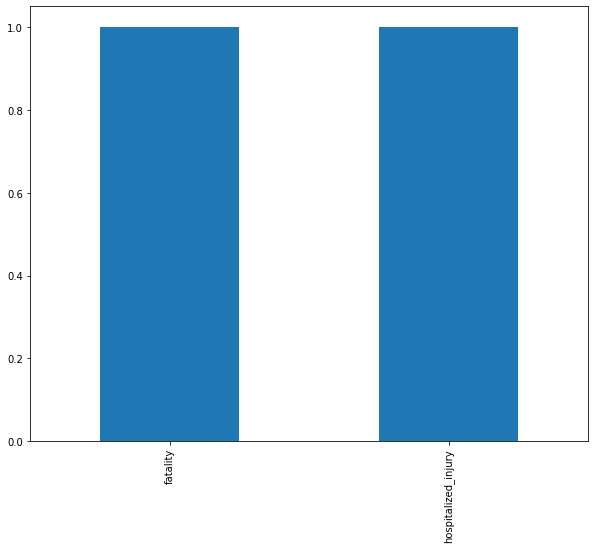

In [ ]:
print(cancer["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cancer["severity"].value_counts().plot(kind='bar')

fatality    1
Name: severity, dtype: int64


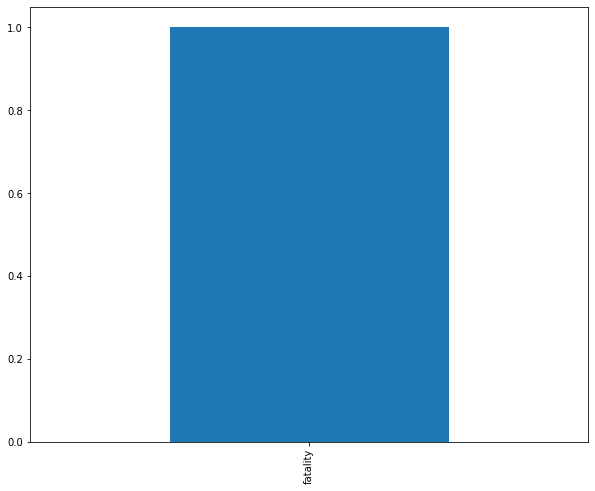

In [ ]:
print(hearing_loss["severity"].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hearing_loss["severity"].value_counts().plot(kind='bar')

# Conclusion
* Most kind of cases are mainly hospitilized & fatal and there a small amount non hospitalised caese in every situation excluding few cases like cancer,hernia etc...